In [1]:
import pandas as pd
import numpy  as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("datasets/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Описание датасета
| Название колонки       | Описание                                                                 | Тип данных   |
|---------------------------|-------------------------------------------------------------------------|--------------|
| **Car_ID**                | Уникальный идентификатор наблюдения                                     | Integer      |
| **Symboling**             | Рейтинг страхового риска (-3 безопасный, +3 рискованный)                | Categorical  |
| **CarName**               | Название машины                                                         | Categorical  |
| **fueltype**              | Тип топлива (газ/дизель)                                                | Categorical  |
| **aspiration**            | Тип впуска (турбо/стандартный)                                          | Categorical  |
| **doornumber**            | Количество дверей                                                       | Categorical  |
| **carbody**               | Тип кузова                                                              | Categorical  |
| **drivewheel**            | Тип привода (передний/задний/полный)                                    | Categorical  |
| **enginelocation**        | Расположение двигателя (переднее/заднее)                                | Categorical  |
| **wheelbase**             | Колесная база (длина между центрами колес)                              | Numeric      |
| **carlength**             | Длина автомобиля                                                        | Numeric      |
| **carwidth**              | Ширина автомобиля                                                       | Numeric      |
| **carheight**             | Высота автомобиля                                                       | Numeric      |
| **curbweight**            | Вес автомобиля без пассажиров и груза                                   | Numeric      |
| **enginetype**            | Тип двигателя                                                           | Categorical  |
| **cylindernumber**        | Количество цилиндров                                                    | Categorical  |
| **enginesize**            | Объем двигателя                                                         | Numeric      |
| **fuelsystem**            | Система подачи топлива                                                  | Categorical  |
| **boreratio**             | Соотношение диаметра цилиндра к ходу поршня                             | Numeric      |
| **stroke**                | Ход поршня                                                              | Numeric      |
| **compressionratio**      | Степень сжатия                                                          | Numeric      |
| **horsepower**            | Мощность двигателя (л.с.)                                               | Numeric      |
| **peakrpm**               | Максимальное количество оборотов в минуту                               | Numeric      |
| **citympg**               | Расход топлива в городе (миль на галлон)                                | Numeric      |
| **highwaympg**            | Расход топлива на трассе (миль на галлон)                               | Numeric      |
| **price**                 | Цена автомобиля (целевая переменная)                                    | Numeric      |

# Предобработка

In [3]:
df.duplicated().sum()

0

In [4]:
target = df.price
df.drop(['car_ID', 'CarName', 'price'], axis=1, inplace=True)

In [5]:
df.isna().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
dtype: int64

In [6]:
df.nunique()

symboling             6
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
dtype: int64

In [7]:
categ = [
    'symboling',
    'fueltype',
    'aspiration',
    'doornumber',
    'carbody',
    'drivewheel',
    'enginelocation',
    'enginetype',
    'cylindernumber',
    'fuelsystem'
]

In [8]:
cont = [col for col in df.columns if col not in categ]

In [9]:
cont

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [10]:
categ_dummies = [
    'fueltype',
    'aspiration',
    'doornumber',
    'enginelocation',
    'carbody',
    'drivewheel',
    'enginetype',
    'fuelsystem'
]

In [11]:
df.symboling.unique() # no need in lable encoder

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [12]:
df.cylindernumber.unique() 

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [13]:
df = pd.get_dummies(df, columns=categ_dummies, drop_first=True)

In [14]:
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,3,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,1,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,...,False,True,False,False,False,False,False,True,False,False
3,2,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,2,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.cylindernumber = le.fit_transform(df.cylindernumber)

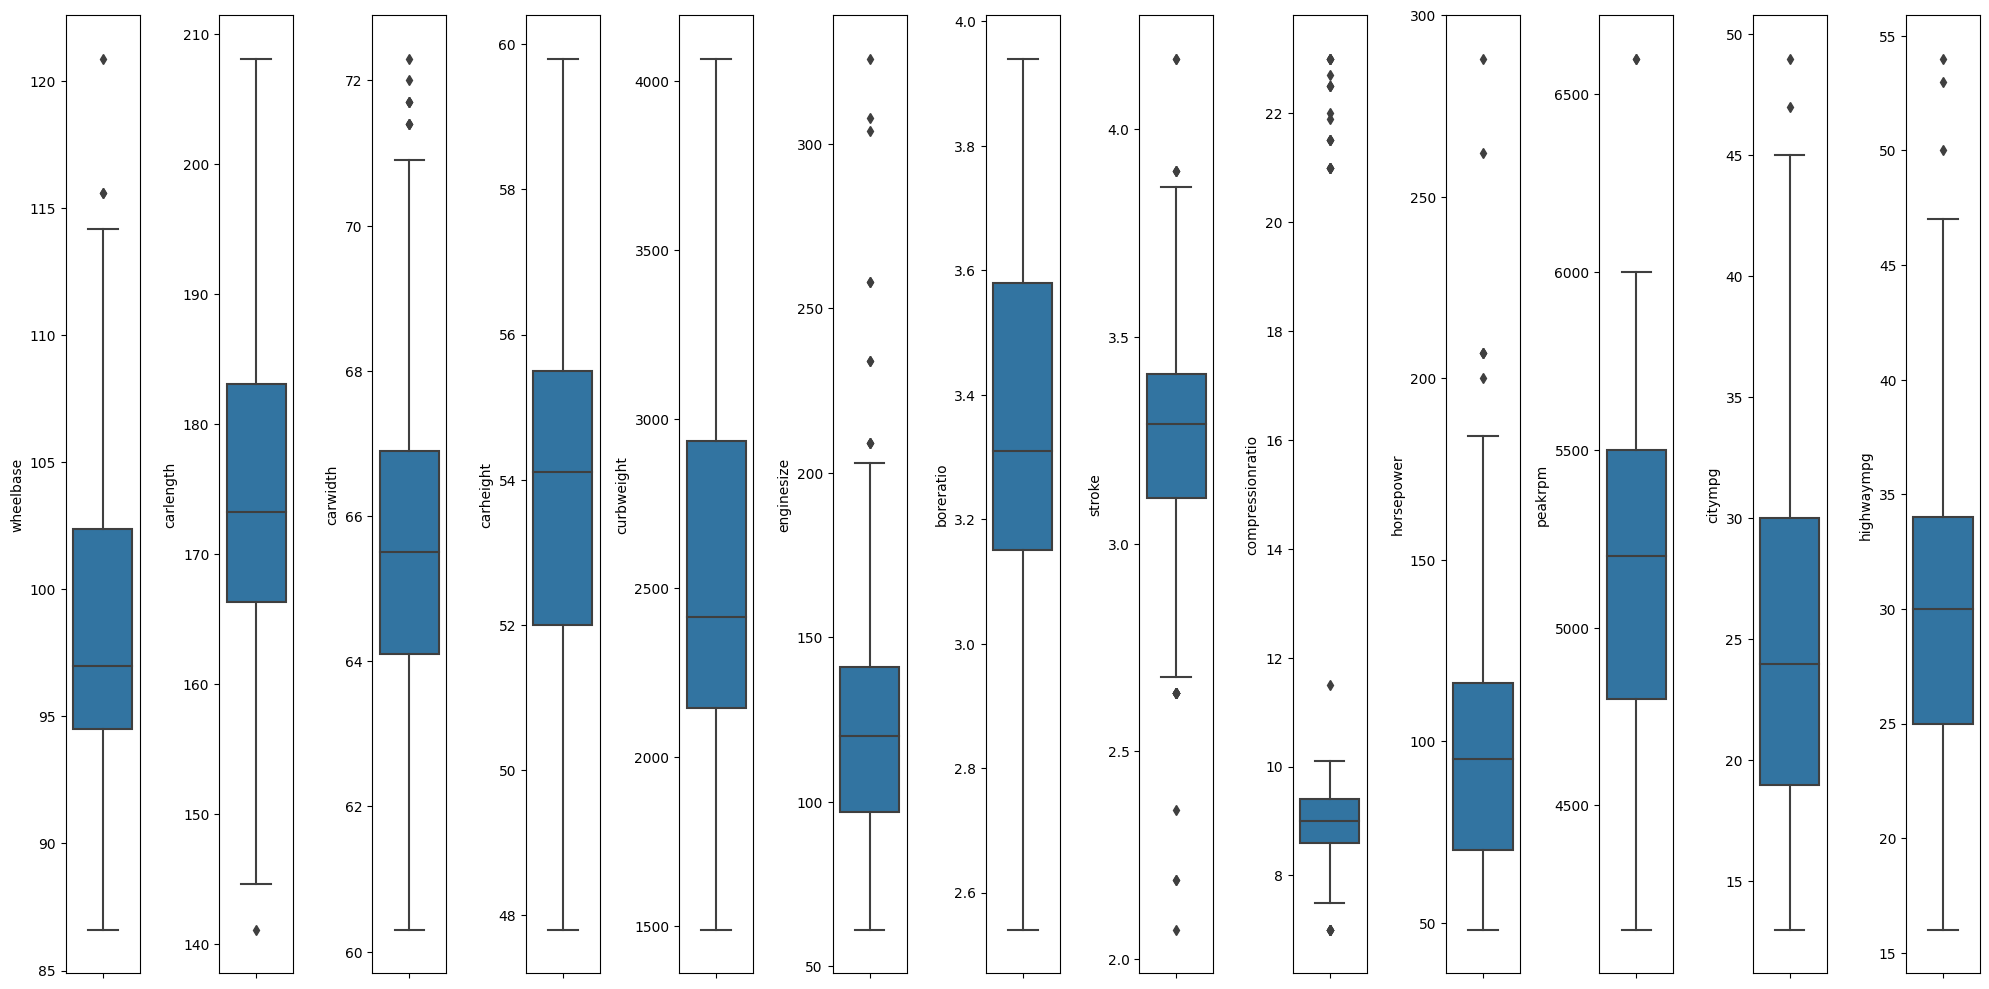

In [16]:
fig = plt.figure(figsize=(20,10))

for i, name in enumerate(cont):
    ax = fig.add_subplot(1,len(cont), i+1)
    sns.boxplot(y=df[name], ax=ax)

fig.tight_layout()

In [17]:
from sklearn.preprocessing import QuantileTransformer

In [18]:
qt = QuantileTransformer(n_quantiles=10, random_state=0) 
df[cont] = qt.fit_transform(df[cont])

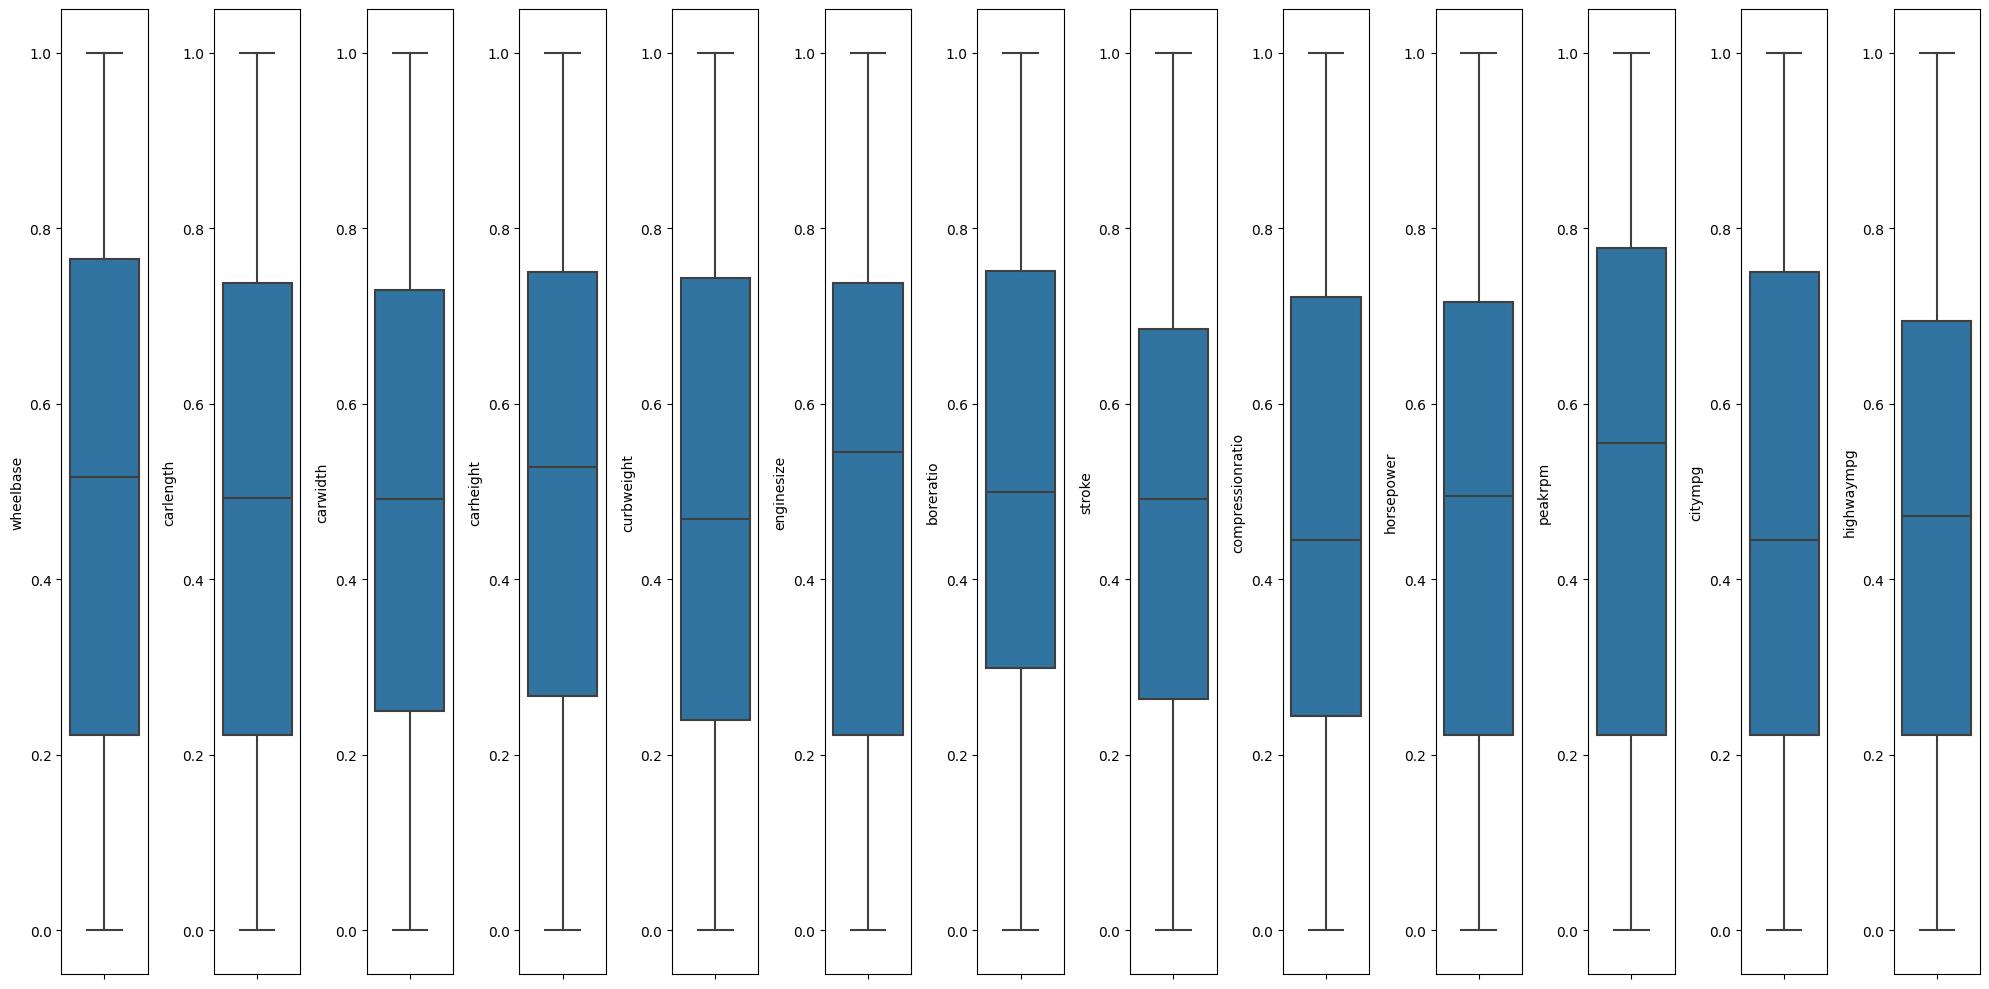

In [19]:
fig = plt.figure(figsize=(20,10))

for i, name in enumerate(cont):
    ax = fig.add_subplot(1,len(cont), i+1)
    sns.boxplot(y=df[name], ax=ax)

fig.tight_layout()

<Axes: >

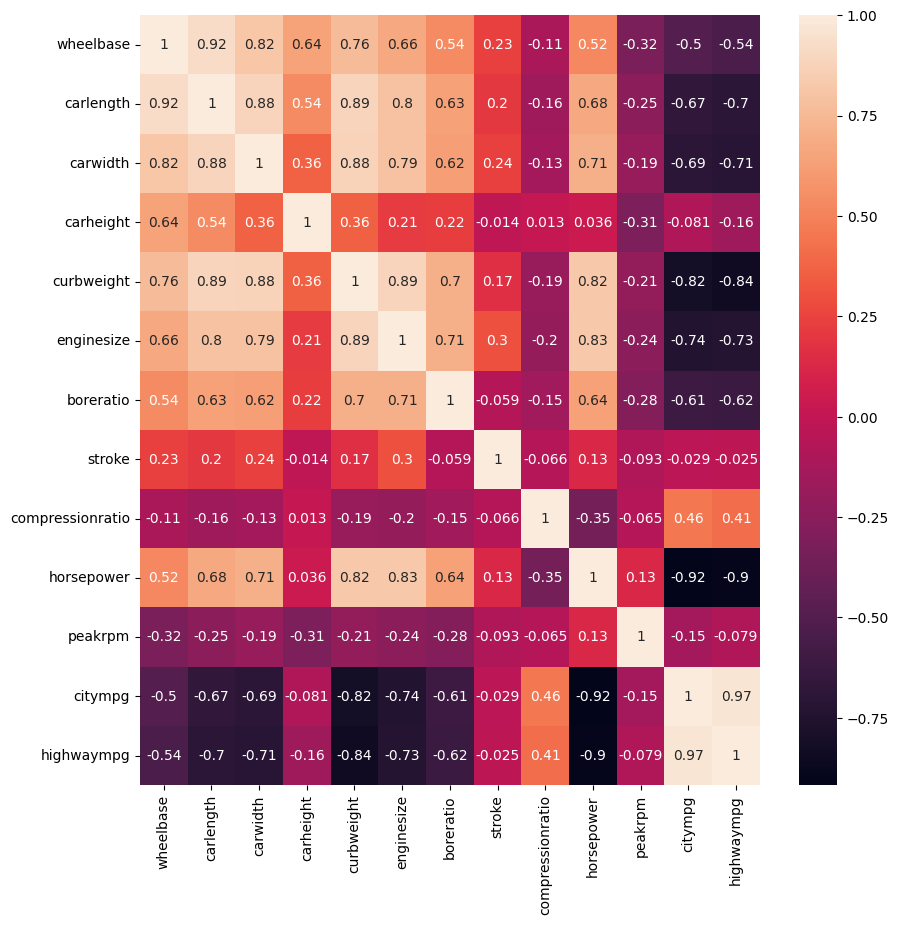

In [20]:
corr = df[cont].corr()
fig, ax = plt.subplots(figsize=(10,10))     
sns.heatmap(corr,  annot=True, ax=ax)

In [21]:
df.drop(['carlength', 'wheelbase', 'carwidth', 'citympg', 'compressionratio'], axis=1, inplace=True)

In [22]:
new_cont = [col for col in cont if col not in ['carlength', 'wheelbase', 'carwidth', 'citympg', 'compressionratio']]

<Axes: >

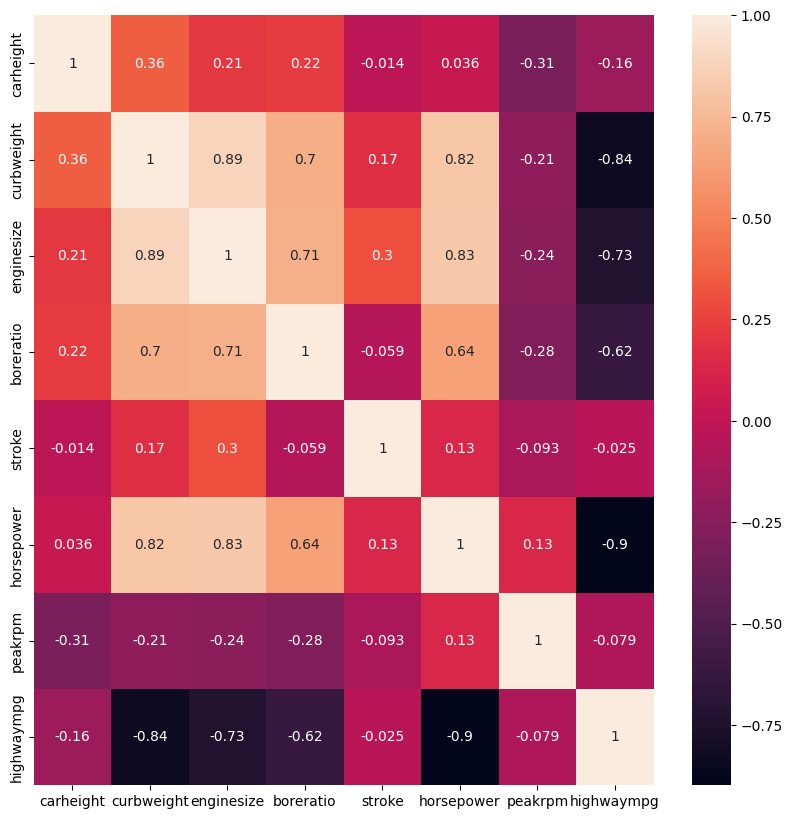

In [23]:
corr = df[new_cont].corr()
fig, ax = plt.subplots(figsize=(10,10))     
sns.heatmap(corr,  annot=True, ax=ax)

Все еще осталась достаточно высокая корреляция с расходом на трассе highwaympg 

C:\Users\papul.DESKTOP-U29R0P8.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Распределение цены')

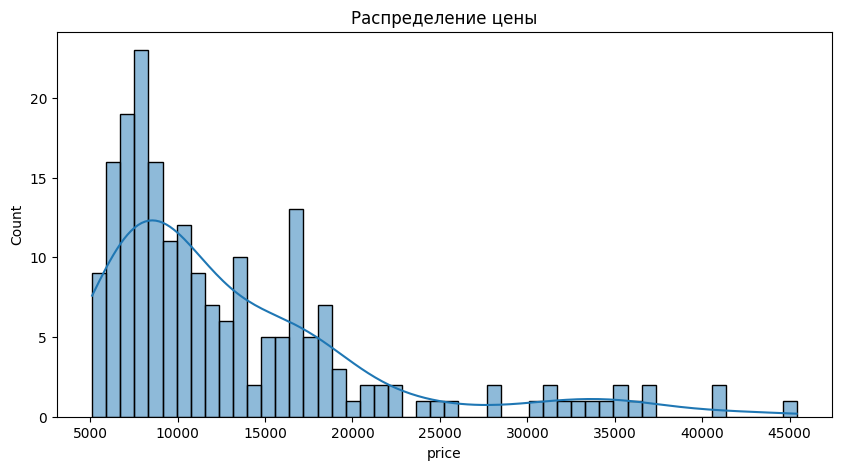

In [24]:
plt.figure(figsize=(10, 5))
sns.histplot(target, bins=50, kde=True)
plt.title('Распределение цены')

In [25]:
bool_columns = df.select_dtypes(include=[bool]).columns
df[bool_columns] = df[bool_columns].astype(int)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

# Линейная регрессия с регуляризацией L2

In [28]:
from sklearn import linear_model

In [29]:
alphas = np.logspace(0, 2, 50)  # 50 значений в логарифмической шкале от1 до 100
reg_ridge = linear_model.RidgeCV(alphas=alphas, cv=10)

In [30]:
reg_ridge = linear_model.RidgeCV()

In [31]:
reg_ridge.fit(X_train, y_train);

In [32]:
reg_ridge.score(X_test, y_test)

0.6814000723786834

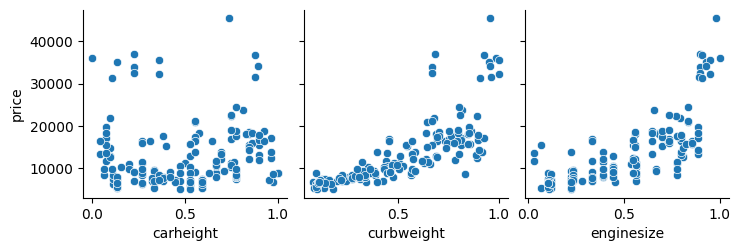

In [34]:
# выбираем фичи с наибольшией корреляцией с таргетом, чтобы отобразить на графике
top_features = corr.index[:3]
sns.pairplot(data=pd.concat([X_train[top_features], y_train], axis=1), 
             y_vars=['price'], 
             x_vars=top_features)

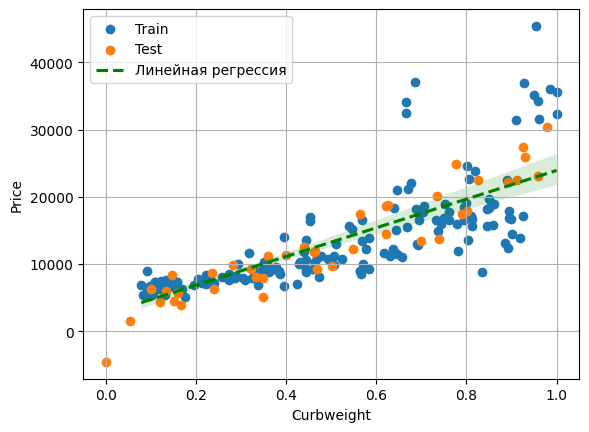

In [35]:
plt.scatter(X_train.curbweight, y_train, label='Train')
plt.scatter(X_test.curbweight, reg_ridge.predict(X_test), label='Test')
sns.regplot(x=X_train['curbweight'], 
            y=y_train, 
            scatter=False, 
            color='green', 
            line_kws={'linestyle': '--'},
            label='Линейная регрессия')
plt.xlabel('Curbweight')
plt.ylabel('Price')
plt.grid()
plt.legend()

In [36]:
reg_ridge.alpha_

1.0

In [37]:
reg_ridge.coef_

array([ -145.5924717 ,   465.1440047 ,  9884.81520545, -1341.15969674,
        2970.26562636, -1151.90790563, -1856.04309009,  4004.80508002,
        1168.63980638, -5335.42779404, -1372.63280503,  -688.21977642,
         207.62278568,  9691.75985463,  1220.89789193, -1798.33827092,
        -285.23167658, -3385.89133276,  1541.06115429,  3752.82889983,
        3375.79422824, -4153.67817475,  -130.1074792 ,   274.65980763,
        2923.44753627,  2631.54898456,   284.21001904,   440.32237752,
        1372.63280503, -1340.99149472,  -750.21322463, -2369.3737259 ,
       -2411.33975519])

In [38]:
np.mean(target)

13276.710570731706

In [39]:
reg_ridge.intercept_

11370.676253674848

Вывод: Некоторые признаки могут быть избыточными или нерелевантными, но модель пытается их использовать, что приводит к большим коэффициентам. 

# Линейная регрессия с регуляризацией L1

In [40]:
reg_lasso = linear_model.LassoCV(alphas=alphas, cv=10)

In [41]:
reg_lasso.fit(X_train,y_train);
reg_lasso.score(X_test,y_test)

0.6847671727852566

In [42]:
reg_lasso.coef_

array([   -0.        ,     0.        , 14318.04383673, -1002.06094637,
           0.        ,    -0.        ,    -0.        ,   848.51020274,
         211.224917  , -3142.63624953,    -0.        ,    -0.        ,
           0.        , 12736.94821793,     0.        , -1311.03477421,
           0.        , -3220.84433712,     0.        ,  2704.21464266,
           0.        , -4226.43896721,  -195.82372287,    -0.        ,
        3015.98533585,     0.        ,    -0.        ,     0.        ,
           0.        ,    -0.        ,     0.        ,  -971.79390483,
          -0.        ])

In [44]:
sum(reg_lasso.coef_ != 0)

13

In [45]:
ind = np.array(range(33))
nnzero = ind[np.abs(reg_lasso.coef_) != 0]

In [46]:
df.columns[nnzero]

Index(['curbweight', 'cylindernumber', 'horsepower', 'peakrpm', 'highwaympg',
       'enginelocation_rear', 'carbody_hatchback', 'carbody_wagon',
       'drivewheel_rwd', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcv',
       'fuelsystem_spdi'],
      dtype='object')

In [47]:
reg_ridge.intercept_

11370.676253674848

Вывод: Кол-во ненулевых коэффициентов ниже кол-ва всех коэффицентов, действительно, много нерелевантных столбцов

# Линейная регрессия ElasticNet

In [48]:
l1_ratio = np.linspace(1e-2, 1, 20)

In [49]:
reg_elasticnet = linear_model.ElasticNetCV(cv=10,
                                           alphas=alphas,
                                           l1_ratio=l1_ratio,
                                           max_iter=10000,
                                           random_state=42)

In [50]:
reg_elasticnet.fit(X_train,y_train);

In [51]:
reg_elasticnet.score(X_test,y_test)

0.6847671727852566

In [52]:
reg_elasticnet.alpha_

56.89866029018296

In [53]:
reg_elasticnet.l1_ratio_

1.0

Вывод: Так ка l1_ratio=1.0, то эластикнет перешел в лассо регресию. То есть м
Модель автоматическ (обнуляет коэффициенты неважных переменнх Подтверждается, чтотно, присутствуют избыточные или слабовлияющие признаки, котодолжны быть исключеныю Большое значение альфа говорит о том, что есть очень большой штраф за сложность модели. Это может привести к недообучению и к о
Обнулению коэффициентов даже для некоторых важных признаков.чил.

# Ядерная регрессия

In [54]:
from sklearn import kernel_ridge

In [55]:
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    model = kernel_ridge.KernelRidge(kernel=kernel, alpha=alphas)
    model.fit(X_train, y_train)
    print(f"{kernel}: {model.score(X_test, y_test):.3f}")

linear: 0.680
poly: 0.720
rbf: 0.628


In [56]:
for degree in range(2, 15):
    model = kernel_ridge.KernelRidge(kernel='poly', degree=degree, alpha=0.1)
    model.fit(X_train, y_train)
    print(f"poly (degree={degree}): {model.score(X_test, y_test):.3f}")

poly (degree=2): 0.788
poly (degree=3): 0.836
poly (degree=4): 0.850
poly (degree=5): 0.853
poly (degree=6): 0.852
poly (degree=7): 0.853
poly (degree=8): 0.855
poly (degree=9): 0.858
poly (degree=10): 0.858
poly (degree=11): 0.855
poly (degree=12): 0.852
poly (degree=13): 0.854
poly (degree=14): 0.857


Вывод: Возможно, данные имеют нелинейную зависимость, которую полиномиальное преобразование успешно улавливает.

# Нейронная сеть (MLP)

In [57]:
from sklearn import neural_network
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [58]:
reg_mlp = neural_network.MLPRegressor(random_state=42,
                                      hidden_layer_sizes=(64,),
                                      alpha=0.001,
                                      max_iter=1000,
                                      batch_size=32,
                                      early_stopping=True
                                      )

In [59]:
reg_mlp.fit(X_train,y_train);
reg_mlp.score(X_test,y_test)

C:\Users\papul.DESKTOP-U29R0P8.000\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.1124947082097133

In [60]:
import warnings
param_grid = {
    'hidden_layer_sizes': [(64,), (128, 64), (128, 64, 32)],
    'alpha': np.logspace(-4, -1, 5),
    'learning_rate_init': np.linspace(0.001, 0.1, 5)
}

warnings.filterwarnings("ignore")
mlp = MLPRegressor(max_iter=1000, early_stopping=True)
grid = GridSearchCV(mlp, param_grid, cv=3, scoring='r2')
grid.fit(X_train, y_train)

print("Лучшие параметры:", grid.best_params_)
print("Лучший R²:", grid.best_score_)

Лучшие параметры: {'alpha': 0.01778279410038923, 'hidden_layer_sizes': (128, 64, 32), 'learning_rate_init': 0.025750000000000002}
Лучший R²: 0.6598888877976354


In [61]:
reg_mlp = neural_network.MLPRegressor(random_state=42,
                                      hidden_layer_sizes=(128, 64),
                                      alpha=0.003,
                                      max_iter=1000,
                                      batch_size=32,
                                      early_stopping=True,
                                      learning_rate_init=0.1
                                      )

In [62]:
reg_mlp.fit(X_train,y_train);
reg_mlp.score(X_test,y_test)

0.8399592284095796

In [63]:
reg_mlp.score(X_train,y_train)

0.9390313083200067

Вывод: Как можно заметить, наступило переобучение. Также из-за ограниченного кол-ва комбинаций гиперпарамтров модель могла не попасть в оптимальные значения

# KNN

In [64]:
from sklearn import neighbors

In [65]:
scores = []
n_max = 10
for i in range(1, n_max + 1):
  reg_knn = neighbors.KNeighborsRegressor(n_neighbors=i, weights='uniform', p=2)
  reg_knn.fit(X_train,y_train);
  scores.append(reg_knn.score(X_test,y_test))

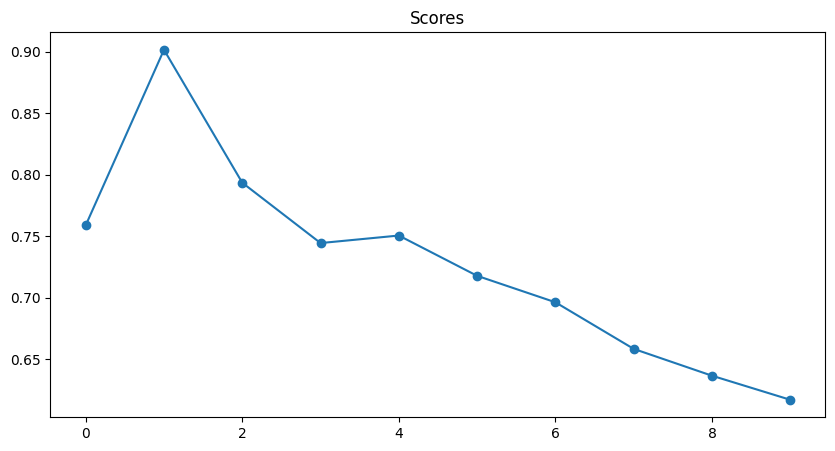

In [66]:
plt.figure(figsize=(10, 5))
plt.plot(scores,'-o')
plt.title('Scores')
plt.show()

In [67]:
reg_knn = neighbors.KNeighborsRegressor(n_neighbors=2, weights='uniform', p=2)

In [68]:
reg_knn.fit(X_train,y_train);
reg_knn.score(X_test,y_test)

0.901627427963608

In [69]:
reg_knn.score(X_train, y_train)

0.9085606493265808

Вывод: В данных могут существовать четкие локальные зависимости

# Pytorch

In [70]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset, TensorDataset, DataLoader
import torchvision.transforms as T

In [71]:
X_train, X_dum, y_train, y_dum = train_test_split(df.values, target.values, test_size=0.1, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_dum, y_dum, test_size=0.5, random_state=42)

In [72]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' # вычисления на графическом процессоре, если возможно
device

'cpu'

In [89]:
class MyDataset(Dataset):
    def __init__(self, data, targets):
        self.data = torch.FloatTensor(data)
        self.targets = torch.FloatTensor(targets)
    
    def __getitem__(self, index):
        return self.data[index], self.targets[index]
    
    def __len__(self):
        return len(self.data)

In [90]:
train_dataset = MyDataset(X_train, y_train)
val_dataset = MyDataset(X_val, y_val)
test_dataset = MyDataset(X_test, y_test)

In [91]:
print(f'''Длина тестовой выборки: {len(test_dataset)}
Длина валидационной выборки: {len(val_dataset)}
Длина тренировочной выборки: {len(train_dataset)}''')

Длина тестовой выборки: 10
Длина валидационной выборки: 11
Длина тренировочной выборки: 184


In [92]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True) 
val_loader = DataLoader(val_dataset, shuffle=True)
test_loader = DataLoader(test_dataset, shuffle=True)

In [107]:
class SimpleREG(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 128)  # Уменьшили размер слоя
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.1)
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        return self.fc3(x)

In [108]:
model = SimpleREG(X_train.shape[1])
model.to(device);

In [109]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1, weight_decay=0.003)

In [111]:
from tqdm import tqdm

In [113]:
train_losses=[]
def train(model,epoch):
  print('\nEpoch : %d'%epoch)
  model.train() # веса модели можно обновлять
  running_loss = 0
  for data in tqdm(train_loader):
      inputs, targets = data[0].to(device),data[1].to(device) # распаковываем пакеты
      optimizer.zero_grad() # обнуляем градиенты
      outputs = model(inputs) # считаем предсказания - прямой проход модели
      loss = criterion(outputs,targets) # ошибка пакета
      loss.backward() # обратное распространение ошибки
      optimizer.step() # итерация алгоритма оптимизации

      running_loss += loss.item()

      for name, param in model.named_parameters():
          if param.grad is not None:
              print(f"{name}: max_grad={param.grad.abs().max()}")

  train_loss = running_loss / len(train_loader)
  train_losses.append(train_loss)
  print('Ошибка обучения в эпохе: %.4f'%(train_loss))

In [114]:
val_losses=[]
def val(model,epoch):
    print('\nEpoch : %d'%epoch)
    model.eval() # веса модели заморожены
    running_loss = 0
    with torch.no_grad(): # запрещаем переисывать градиенты
        for data in tqdm(val_loader):
            inputs, targets = data[0].to(device),data[1].to(device)
            outputs = model(inputs)
            loss = criterion(outputs,targets)
            running_loss += loss.item()
        val_loss = running_loss / len(val_loader)
        val_losses.append(val_loss)
        print('Ошибка валидации в эпохе: %.4f:'%(val_loss))

In [115]:
max_epochs=200
for epoch in range(1,max_epochs+1):
    train(model,epoch)
    val(model,epoch)


Epoch : 1


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 283.43it/s]


fc1.weight: max_grad=65000.43359375
fc1.bias: max_grad=36797.7578125
fc2.weight: max_grad=17830.66015625
fc2.bias: max_grad=1454.6676025390625
fc3.weight: max_grad=775524.375
fc3.bias: max_grad=1454.447509765625
fc1.weight: max_grad=50544.64453125
fc1.bias: max_grad=19526.74609375
fc2.weight: max_grad=10449.1806640625
fc2.bias: max_grad=715.45556640625
fc3.weight: max_grad=501228.75
fc3.bias: max_grad=710.8175659179688
fc1.weight: max_grad=66841.8671875
fc1.bias: max_grad=38974.8671875
fc2.weight: max_grad=19247.515625
fc2.bias: max_grad=1606.954345703125
fc3.weight: max_grad=931254.0625
fc3.bias: max_grad=1724.359375
fc1.weight: max_grad=236665.65625
fc1.bias: max_grad=105865.09375
fc2.weight: max_grad=52140.5859375
fc2.bias: max_grad=4397.982421875
fc3.weight: max_grad=2618972.75
fc3.bias: max_grad=4696.59130859375
fc1.weight: max_grad=305119.15625
fc1.bias: max_grad=142264.46875
fc2.weight: max_grad=66602.5
fc2.bias: max_grad=5459.09375
fc3.weight: max_grad=3190144.25
fc3.bias: max_

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1222.63it/s]


Ошибка валидации в эпохе: 45077473.3551:

Epoch : 2


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 249.99it/s]


fc1.weight: max_grad=67304.5625
fc1.bias: max_grad=24753.85546875
fc2.weight: max_grad=14165.376953125
fc2.bias: max_grad=899.6719970703125
fc3.weight: max_grad=624010.5625
fc3.bias: max_grad=706.0153198242188
fc1.weight: max_grad=88244.9453125
fc1.bias: max_grad=45061.1171875
fc2.weight: max_grad=22266.865234375
fc2.bias: max_grad=1620.9111328125
fc3.weight: max_grad=1137494.375
fc3.bias: max_grad=1640.22216796875
fc1.weight: max_grad=286470.34375
fc1.bias: max_grad=134815.78125
fc2.weight: max_grad=63567.15625
fc2.bias: max_grad=4671.88232421875
fc3.weight: max_grad=3245751.5
fc3.bias: max_grad=4858.2109375
fc1.weight: max_grad=73234.15625
fc1.bias: max_grad=34244.5546875
fc2.weight: max_grad=17396.453125
fc2.bias: max_grad=1185.341064453125
fc3.weight: max_grad=842080.5
fc3.bias: max_grad=1075.8172607421875
fc1.weight: max_grad=137542.453125
fc1.bias: max_grad=64317.0625
fc2.weight: max_grad=30306.966796875
fc2.bias: max_grad=2417.304443359375
fc3.weight: max_grad=1486923.125
fc3.bi

100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 939.99it/s]


Ошибка валидации в эпохе: 46867713.8636:

Epoch : 3


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 204.52it/s]


fc1.weight: max_grad=103469.5234375
fc1.bias: max_grad=43611.875
fc2.weight: max_grad=23007.982421875
fc2.bias: max_grad=1627.10888671875
fc3.weight: max_grad=1170035.875
fc3.bias: max_grad=1571.074462890625
fc1.weight: max_grad=57042.0703125
fc1.bias: max_grad=32648.17578125
fc2.weight: max_grad=15580.2470703125
fc2.bias: max_grad=1234.723388671875
fc3.weight: max_grad=715752.5
fc3.bias: max_grad=1297.5908203125
fc1.weight: max_grad=160508.765625
fc1.bias: max_grad=69467.703125
fc2.weight: max_grad=33125.4453125
fc2.bias: max_grad=2385.8310546875
fc3.weight: max_grad=1650930.5
fc3.bias: max_grad=2408.07177734375
fc1.weight: max_grad=49696.625
fc1.bias: max_grad=17779.197265625
fc2.weight: max_grad=11860.7294921875
fc2.bias: max_grad=816.5776977539062
fc3.weight: max_grad=614120.25
fc3.bias: max_grad=348.7060546875
fc1.weight: max_grad=44807.40234375
fc1.bias: max_grad=18980.3828125
fc2.weight: max_grad=10303.55078125
fc2.bias: max_grad=722.2764892578125
fc3.weight: max_grad=505169.625

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1223.54it/s]


Ошибка валидации в эпохе: 45105812.2131:

Epoch : 4


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 272.69it/s]


fc1.weight: max_grad=168223.15625
fc1.bias: max_grad=91340.875
fc2.weight: max_grad=44114.359375
fc2.bias: max_grad=3895.214599609375
fc3.weight: max_grad=2338957.25
fc3.bias: max_grad=4039.832763671875
fc1.weight: max_grad=45276.48828125
fc1.bias: max_grad=22142.57421875
fc2.weight: max_grad=10928.79296875
fc2.bias: max_grad=900.3118896484375
fc3.weight: max_grad=522252.59375
fc3.bias: max_grad=1003.8585205078125
fc1.weight: max_grad=160907.28125
fc1.bias: max_grad=76159.390625
fc2.weight: max_grad=36955.87109375
fc2.bias: max_grad=2877.13671875
fc3.weight: max_grad=1910831.625
fc3.bias: max_grad=2936.368896484375
fc1.weight: max_grad=222521.1875
fc1.bias: max_grad=92306.2109375
fc2.weight: max_grad=43233.60546875
fc2.bias: max_grad=3275.14697265625
fc3.weight: max_grad=2156943.75
fc3.bias: max_grad=3426.189208984375
fc1.weight: max_grad=210089.65625
fc1.bias: max_grad=99021.4453125
fc2.weight: max_grad=44555.5703125
fc2.bias: max_grad=3768.825439453125
fc3.weight: max_grad=2376695.25

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 2197.12it/s]

Ошибка валидации в эпохе: 44138448.2598:

Epoch : 5



100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 272.74it/s]

fc1.weight: max_grad=123682.15625
fc1.bias: max_grad=67506.2109375
fc2.weight: max_grad=30647.919921875
fc2.bias: max_grad=2523.3603515625
fc3.weight: max_grad=1505691.625
fc3.bias: max_grad=2826.59228515625
fc1.weight: max_grad=118729.3515625
fc1.bias: max_grad=55912.078125
fc2.weight: max_grad=29413.857421875
fc2.bias: max_grad=2111.70751953125
fc3.weight: max_grad=1447062.125
fc3.bias: max_grad=1969.119384765625
fc1.weight: max_grad=204352.546875
fc1.bias: max_grad=85085.984375
fc2.weight: max_grad=41747.3203125
fc2.bias: max_grad=3073.4814453125
fc3.weight: max_grad=2174153.75
fc3.bias: max_grad=2956.123779296875
fc1.weight: max_grad=278673.5
fc1.bias: max_grad=127715.1171875
fc2.weight: max_grad=58523.36328125
fc2.bias: max_grad=4466.93310546875
fc3.weight: max_grad=2953450.5
fc3.bias: max_grad=4491.705078125
fc1.weight: max_grad=57074.6640625
fc1.bias: max_grad=23853.51953125
fc2.weight: max_grad=12030.1123046875
fc2.bias: max_grad=805.4454345703125
fc3.weight: max_grad=551329.25

Ошибка обучения в эпохе: 65471098.6667

Epoch : 5


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1571.11it/s]


Ошибка валидации в эпохе: 45261360.7273:

Epoch : 6


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 260.88it/s]

fc1.weight: max_grad=151956.296875
fc1.bias: max_grad=74098.421875
fc2.weight: max_grad=35150.42578125
fc2.bias: max_grad=2858.77685546875
fc3.weight: max_grad=1754226.5
fc3.bias: max_grad=3094.0673828125
fc1.weight: max_grad=155363.921875
fc1.bias: max_grad=85001.8359375
fc2.weight: max_grad=39384.34375
fc2.bias: max_grad=3379.3603515625
fc3.weight: max_grad=2063518.5
fc3.bias: max_grad=3526.132080078125
fc1.weight: max_grad=278693.90625
fc1.bias: max_grad=138595.640625
fc2.weight: max_grad=68498.0546875
fc2.bias: max_grad=5369.248046875
fc3.weight: max_grad=3558612.75
fc3.bias: max_grad=5158.05029296875
fc1.weight: max_grad=299662.34375
fc1.bias: max_grad=136525.03125
fc2.weight: max_grad=66826.3359375
fc2.bias: max_grad=5243.2490234375
fc3.weight: max_grad=3572168.25
fc3.bias: max_grad=5064.24560546875
fc1.weight: max_grad=248362.828125
fc1.bias: max_grad=99657.8984375
fc2.weight: max_grad=48050.5703125
fc2.bias: max_grad=3591.43798828125
fc3.weight: max_grad=2334760.5
fc3.bias: max


Epoch : 6


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1524.75it/s]


Ошибка валидации в эпохе: 43926511.2926:

Epoch : 7


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 272.67it/s]

fc1.weight: max_grad=20511.40625
fc1.bias: max_grad=9517.638671875
fc2.weight: max_grad=4921.712890625
fc2.bias: max_grad=331.0934143066406
fc3.weight: max_grad=166506.484375
fc3.bias: max_grad=337.81890869140625
fc1.weight: max_grad=89600.25
fc1.bias: max_grad=46179.69921875
fc2.weight: max_grad=21078.716796875
fc2.bias: max_grad=1803.01318359375
fc3.weight: max_grad=1036040.4375
fc3.bias: max_grad=2022.0150146484375
fc1.weight: max_grad=196176.859375
fc1.bias: max_grad=83308.609375
fc2.weight: max_grad=37647.95703125
fc2.bias: max_grad=3191.8525390625
fc3.weight: max_grad=1976550.75
fc3.bias: max_grad=3730.07666015625
fc1.weight: max_grad=575412.625
fc1.bias: max_grad=271366.5625
fc2.weight: max_grad=124286.171875
fc2.bias: max_grad=10045.8837890625
fc3.weight: max_grad=6130259.5
fc3.bias: max_grad=11657.158203125
fc1.weight: max_grad=48397.94921875
fc1.bias: max_grad=18048.28515625
fc2.weight: max_grad=10148.478515625
fc2.bias: max_grad=592.9658813476562
fc3.weight: max_grad=453866.


Epoch : 7


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1516.78it/s]


Ошибка валидации в эпохе: 50718973.5455:

Epoch : 8


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=322587.0
fc1.bias: max_grad=135587.5625


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 250.02it/s]

fc2.weight: max_grad=65501.4453125
fc2.bias: max_grad=4998.1806640625
fc3.weight: max_grad=3369504.75
fc3.bias: max_grad=5090.61572265625
fc1.weight: max_grad=44686.265625
fc1.bias: max_grad=19940.89453125
fc2.weight: max_grad=12928.8876953125
fc2.bias: max_grad=636.0459594726562
fc3.weight: max_grad=511103.40625
fc3.bias: max_grad=432.5304260253906
fc1.weight: max_grad=49897.55859375
fc1.bias: max_grad=16070.6611328125
fc2.weight: max_grad=10559.62109375
fc2.bias: max_grad=594.6911010742188
fc3.weight: max_grad=462970.65625
fc3.bias: max_grad=229.48001098632812
fc1.weight: max_grad=36354.9375
fc1.bias: max_grad=16481.125
fc2.weight: max_grad=8822.58984375
fc2.bias: max_grad=699.509033203125
fc3.weight: max_grad=343183.6875
fc3.bias: max_grad=535.719482421875
fc1.weight: max_grad=288370.0625
fc1.bias: max_grad=130096.625
fc2.weight: max_grad=64138.08203125
fc2.bias: max_grad=4634.13427734375
fc3.weight: max_grad=3021280.0
fc3.bias: max_grad=4528.2705078125
fc1.weight: max_grad=83664.08


Epoch : 8


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1571.81it/s]


Ошибка валидации в эпохе: 43752885.5923:

Epoch : 9


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 222.26it/s]


fc1.weight: max_grad=145458.359375
fc1.bias: max_grad=61030.1328125
fc2.weight: max_grad=27035.43359375
fc2.bias: max_grad=2103.59765625
fc3.weight: max_grad=1349246.875
fc3.bias: max_grad=2280.674072265625
fc1.weight: max_grad=198879.4375
fc1.bias: max_grad=94221.6015625
fc2.weight: max_grad=43765.96875
fc2.bias: max_grad=3670.09228515625
fc3.weight: max_grad=2117059.25
fc3.bias: max_grad=3912.106201171875
fc1.weight: max_grad=73312.78125
fc1.bias: max_grad=38774.578125
fc2.weight: max_grad=18781.32421875
fc2.bias: max_grad=1633.84619140625
fc3.weight: max_grad=946849.375
fc3.bias: max_grad=1823.4476318359375
fc1.weight: max_grad=358205.03125
fc1.bias: max_grad=166266.890625
fc2.weight: max_grad=77568.28125
fc2.bias: max_grad=6316.58349609375
fc3.weight: max_grad=3581580.5
fc3.bias: max_grad=7012.2353515625
fc1.weight: max_grad=311771.46875
fc1.bias: max_grad=154846.40625
fc2.weight: max_grad=71331.734375
fc2.bias: max_grad=6073.1435546875
fc3.weight: max_grad=3516262.25
fc3.bias: max

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1833.76it/s]


Ошибка валидации в эпохе: 47019706.2955:

Epoch : 10


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 247.68it/s]


fc1.weight: max_grad=50057.0703125
fc1.bias: max_grad=29800.60546875
fc2.weight: max_grad=15694.2568359375
fc2.bias: max_grad=900.6950073242188
fc3.weight: max_grad=633221.1875
fc3.bias: max_grad=675.142578125
fc1.weight: max_grad=564236.4375
fc1.bias: max_grad=238840.15625
fc2.weight: max_grad=109712.4296875
fc2.bias: max_grad=8128.205078125
fc3.weight: max_grad=5450990.5
fc3.bias: max_grad=8526.126953125
fc1.weight: max_grad=52615.5859375
fc1.bias: max_grad=18515.4765625
fc2.weight: max_grad=11362.9150390625
fc2.bias: max_grad=689.710693359375
fc3.weight: max_grad=515324.21875
fc3.bias: max_grad=353.4019775390625
fc1.weight: max_grad=430236.65625
fc1.bias: max_grad=192871.046875
fc2.weight: max_grad=93790.9453125
fc2.bias: max_grad=6773.17822265625
fc3.weight: max_grad=4625667.5
fc3.bias: max_grad=6691.27880859375
fc1.weight: max_grad=165782.921875
fc1.bias: max_grad=87804.1875
fc2.weight: max_grad=39243.859375
fc2.bias: max_grad=3172.40966796875
fc3.weight: max_grad=2000099.625
fc3.

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1374.61it/s]


Ошибка валидации в эпохе: 44719507.5014:

Epoch : 11


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 260.87it/s]

fc1.weight: max_grad=297483.6875
fc1.bias: max_grad=138579.8125
fc2.weight: max_grad=61636.8515625
fc2.bias: max_grad=4814.11865234375
fc3.weight: max_grad=2941974.25
fc3.bias: max_grad=5496.15234375
fc1.weight: max_grad=80216.25
fc1.bias: max_grad=37556.8046875
fc2.weight: max_grad=16126.28515625
fc2.bias: max_grad=1334.732177734375
fc3.weight: max_grad=729070.9375
fc3.bias: max_grad=1478.57373046875
fc1.weight: max_grad=111694.71875
fc1.bias: max_grad=43169.859375
fc2.weight: max_grad=20751.259765625
fc2.bias: max_grad=1399.704833984375
fc3.weight: max_grad=968634.6875
fc3.bias: max_grad=1473.99072265625
fc1.weight: max_grad=72714.03125
fc1.bias: max_grad=32417.6640625
fc2.weight: max_grad=15926.919921875
fc2.bias: max_grad=1138.555908203125
fc3.weight: max_grad=737806.4375
fc3.bias: max_grad=1119.5047607421875
fc1.weight: max_grad=26140.96484375
fc1.bias: max_grad=10928.1279296875
fc2.weight: max_grad=7594.33154296875
fc2.bias: max_grad=541.8341064453125
fc3.weight: max_grad=295195.

Ошибка обучения в эпохе: 62067389.0000

Epoch : 11


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1329.80it/s]


Ошибка валидации в эпохе: 44208857.2504:

Epoch : 12


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 250.02it/s]

fc1.weight: max_grad=50290.97265625
fc1.bias: max_grad=26420.658203125
fc2.weight: max_grad=13611.712890625
fc2.bias: max_grad=1035.927978515625
fc3.weight: max_grad=587809.875
fc3.bias: max_grad=1083.4580078125
fc1.weight: max_grad=195978.0625
fc1.bias: max_grad=102479.65625
fc2.weight: max_grad=46985.62109375
fc2.bias: max_grad=3812.10595703125
fc3.weight: max_grad=2323978.75
fc3.bias: max_grad=4204.23046875
fc1.weight: max_grad=104690.6796875
fc1.bias: max_grad=53622.328125
fc2.weight: max_grad=23825.734375
fc2.bias: max_grad=2015.067138671875
fc3.weight: max_grad=1182230.5
fc3.bias: max_grad=2332.245361328125
fc1.weight: max_grad=348176.9375
fc1.bias: max_grad=172192.53125
fc2.weight: max_grad=83935.5859375
fc2.bias: max_grad=6868.56640625
fc3.weight: max_grad=4118731.5
fc3.bias: max_grad=7280.794921875
fc1.weight: max_grad=277868.5
fc1.bias: max_grad=123493.8125
fc2.weight: max_grad=52299.84765625
fc2.bias: max_grad=4323.65478515625
fc3.weight: max_grad=2630057.75
fc3.bias: max_gr


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1571.54it/s]


Ошибка валидации в эпохе: 51975833.7273:

Epoch : 13


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=272735.75
fc1.bias: max_grad=119041.515625
fc2.weight: max_grad=56380.078125


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 230.78it/s]


fc2.bias: max_grad=4185.64599609375
fc3.weight: max_grad=2790615.25
fc3.bias: max_grad=4208.0556640625
fc1.weight: max_grad=344837.75
fc1.bias: max_grad=156049.0625
fc2.weight: max_grad=73559.25
fc2.bias: max_grad=5513.078125
fc3.weight: max_grad=3797992.25
fc3.bias: max_grad=5540.9306640625
fc1.weight: max_grad=44917.2890625
fc1.bias: max_grad=14395.599609375
fc2.weight: max_grad=7083.1279296875
fc2.bias: max_grad=413.23272705078125
fc3.weight: max_grad=185487.609375
fc3.bias: max_grad=336.39056396484375
fc1.weight: max_grad=233451.0625
fc1.bias: max_grad=101607.671875
fc2.weight: max_grad=49118.38671875
fc2.bias: max_grad=3388.03564453125
fc3.weight: max_grad=2436514.25
fc3.bias: max_grad=3488.857421875
fc1.weight: max_grad=26777.765625
fc1.bias: max_grad=12107.037109375
fc2.weight: max_grad=7622.10009765625
fc2.bias: max_grad=335.6278076171875
fc3.weight: max_grad=268936.125
fc3.bias: max_grad=69.43359375
fc1.weight: max_grad=59344.2734375
fc1.bias: max_grad=24851.4140625
fc2.weight

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.51it/s]


Ошибка валидации в эпохе: 44421437.1065:

Epoch : 14


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=63470.71484375
fc1.bias: max_grad=33251.39453125
fc2.weight: max_grad=15641.1396484375
fc2.bias: max_grad=1297.15673828125


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 260.90it/s]


fc3.weight: max_grad=720538.6875
fc3.bias: max_grad=1320.130126953125
fc1.weight: max_grad=181683.3125
fc1.bias: max_grad=91712.625
fc2.weight: max_grad=40158.3671875
fc2.bias: max_grad=3359.845947265625
fc3.weight: max_grad=1925640.375
fc3.bias: max_grad=3908.0673828125
fc1.weight: max_grad=291882.21875
fc1.bias: max_grad=121661.921875
fc2.weight: max_grad=54917.859375
fc2.bias: max_grad=4005.0703125
fc3.weight: max_grad=2445855.0
fc3.bias: max_grad=4509.21533203125
fc1.weight: max_grad=38593.0859375
fc1.bias: max_grad=14323.8544921875
fc2.weight: max_grad=9556.0966796875
fc2.bias: max_grad=598.577392578125
fc3.weight: max_grad=404733.1875
fc3.bias: max_grad=353.22991943359375
fc1.weight: max_grad=64430.05859375
fc1.bias: max_grad=28387.265625
fc2.weight: max_grad=16290.7919921875
fc2.bias: max_grad=1131.5792236328125
fc3.weight: max_grad=765918.875
fc3.bias: max_grad=884.5216674804688
fc1.weight: max_grad=129586.421875
fc1.bias: max_grad=74310.515625
fc2.weight: max_grad=34219.089843

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 2202.36it/s]


Ошибка валидации в эпохе: 48658795.0455:

Epoch : 15


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 315.86it/s]


fc1.weight: max_grad=263040.65625
fc1.bias: max_grad=132518.6875
fc2.weight: max_grad=65411.6640625
fc2.bias: max_grad=4752.384765625
fc3.weight: max_grad=3146770.75
fc3.bias: max_grad=4608.703125
fc1.weight: max_grad=96374.578125
fc1.bias: max_grad=44868.046875
fc2.weight: max_grad=19768.373046875
fc2.bias: max_grad=1449.362548828125
fc3.weight: max_grad=922518.9375
fc3.bias: max_grad=1610.81494140625
fc1.weight: max_grad=29827.7265625
fc1.bias: max_grad=11067.234375
fc2.weight: max_grad=6549.57763671875
fc2.bias: max_grad=397.67840576171875
fc3.weight: max_grad=279345.0625
fc3.bias: max_grad=114.66899871826172
fc1.weight: max_grad=236021.890625
fc1.bias: max_grad=106661.609375
fc2.weight: max_grad=50114.828125
fc2.bias: max_grad=3715.427734375
fc3.weight: max_grad=2480949.0
fc3.bias: max_grad=3752.917236328125
fc1.weight: max_grad=184921.546875
fc1.bias: max_grad=92615.1640625
fc2.weight: max_grad=41439.83203125
fc2.bias: max_grad=3318.403076171875
fc3.weight: max_grad=1971430.75
fc3

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1571.38it/s]


Ошибка валидации в эпохе: 45682388.5398:

Epoch : 16


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=156221.640625
fc1.bias: max_grad=65777.6640625


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 300.06it/s]

fc2.weight: max_grad=30904.189453125
fc2.bias: max_grad=2493.67919921875
fc3.weight: max_grad=1479219.0
fc3.bias: max_grad=2581.794921875
fc1.weight: max_grad=219268.0
fc1.bias: max_grad=110357.6484375
fc2.weight: max_grad=50689.703125
fc2.bias: max_grad=3813.2919921875
fc3.weight: max_grad=2316359.75
fc3.bias: max_grad=3944.71923828125
fc1.weight: max_grad=203784.703125
fc1.bias: max_grad=98471.9296875
fc2.weight: max_grad=44942.265625
fc2.bias: max_grad=3113.74072265625
fc3.weight: max_grad=2058666.875
fc3.bias: max_grad=3240.5927734375
fc1.weight: max_grad=71342.0
fc1.bias: max_grad=32621.025390625
fc2.weight: max_grad=16250.884765625
fc2.bias: max_grad=953.9222412109375
fc3.weight: max_grad=695353.25
fc3.bias: max_grad=651.6091918945312
fc1.weight: max_grad=350295.46875
fc1.bias: max_grad=153457.40625
fc2.weight: max_grad=67648.25
fc2.bias: max_grad=5181.29541015625
fc3.weight: max_grad=3331678.75
fc3.bias: max_grad=5641.58251953125
fc1.weight: max_grad=118769.9609375
fc1.bias: max


Epoch : 16


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 2201.31it/s]


Ошибка валидации в эпохе: 43585368.3991:

Epoch : 17


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 315.94it/s]

fc1.weight: max_grad=34868.62109375
fc1.bias: max_grad=16632.8984375
fc2.weight: max_grad=8781.111328125
fc2.bias: max_grad=480.2135009765625
fc3.weight: max_grad=342480.15625
fc3.bias: max_grad=360.2277526855469
fc1.weight: max_grad=189046.40625
fc1.bias: max_grad=91655.515625
fc2.weight: max_grad=41219.828125
fc2.bias: max_grad=3205.7041015625
fc3.weight: max_grad=1900533.75
fc3.bias: max_grad=3661.812744140625
fc1.weight: max_grad=238108.828125
fc1.bias: max_grad=112975.953125
fc2.weight: max_grad=51388.015625
fc2.bias: max_grad=4044.81591796875
fc3.weight: max_grad=2381121.25
fc3.bias: max_grad=4433.0185546875
fc1.weight: max_grad=100393.0234375
fc1.bias: max_grad=46817.1484375
fc2.weight: max_grad=20117.462890625
fc2.bias: max_grad=1654.573486328125
fc3.weight: max_grad=981273.375
fc3.bias: max_grad=1925.7724609375
fc1.weight: max_grad=273601.40625
fc1.bias: max_grad=143671.0
fc2.weight: max_grad=70665.4765625
fc2.bias: max_grad=5434.240234375
fc3.weight: max_grad=3254894.25
fc3.b


Epoch : 17


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1571.60it/s]

Ошибка валидации в эпохе: 46568298.7159:

Epoch : 18



100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 238.11it/s]


fc1.weight: max_grad=75257.734375
fc1.bias: max_grad=33787.15625
fc2.weight: max_grad=18011.732421875
fc2.bias: max_grad=1439.97998046875
fc3.weight: max_grad=825287.1875
fc3.bias: max_grad=1388.752685546875
fc1.weight: max_grad=259466.96875
fc1.bias: max_grad=119072.75
fc2.weight: max_grad=53192.05859375
fc2.bias: max_grad=3719.935791015625
fc3.weight: max_grad=2500286.0
fc3.bias: max_grad=3899.636962890625
fc1.weight: max_grad=167416.78125
fc1.bias: max_grad=78036.5
fc2.weight: max_grad=37322.15234375
fc2.bias: max_grad=2643.53955078125
fc3.weight: max_grad=1794166.5
fc3.bias: max_grad=2559.618896484375
fc1.weight: max_grad=47554.4453125
fc1.bias: max_grad=16083.099609375
fc2.weight: max_grad=9640.7705078125
fc2.bias: max_grad=704.521728515625
fc3.weight: max_grad=407408.28125
fc3.bias: max_grad=617.06640625
fc1.weight: max_grad=181110.25
fc1.bias: max_grad=95907.515625
fc2.weight: max_grad=45688.3515625
fc2.bias: max_grad=3660.275634765625
fc3.weight: max_grad=2213850.5
fc3.bias: ma

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1572.08it/s]

Ошибка валидации в эпохе: 42944998.6080:

Epoch : 19



100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 250.03it/s]


fc1.weight: max_grad=137262.078125
fc1.bias: max_grad=68409.6484375
fc2.weight: max_grad=31220.568359375
fc2.bias: max_grad=2301.723388671875
fc3.weight: max_grad=1462071.0
fc3.bias: max_grad=2447.202392578125
fc1.weight: max_grad=314488.75
fc1.bias: max_grad=157970.21875
fc2.weight: max_grad=73632.34375
fc2.bias: max_grad=6008.85498046875
fc3.weight: max_grad=3560023.0
fc3.bias: max_grad=6396.84033203125
fc1.weight: max_grad=192448.828125
fc1.bias: max_grad=88275.0859375
fc2.weight: max_grad=38797.71875
fc2.bias: max_grad=3204.058837890625
fc3.weight: max_grad=1927945.25
fc3.bias: max_grad=3673.4326171875
fc1.weight: max_grad=22935.21484375
fc1.bias: max_grad=7242.06103515625
fc2.weight: max_grad=4419.185546875
fc2.bias: max_grad=332.385498046875
fc3.weight: max_grad=181367.046875
fc3.bias: max_grad=205.852783203125
fc1.weight: max_grad=47583.8046875
fc1.bias: max_grad=25673.515625
fc2.weight: max_grad=12639.1748046875
fc2.bias: max_grad=971.429931640625
fc3.weight: max_grad=554472.5


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1553.34it/s]


Ошибка валидации в эпохе: 47016316.1250:

Epoch : 20


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 272.71it/s]

fc1.weight: max_grad=252950.765625
fc1.bias: max_grad=110284.90625
fc2.weight: max_grad=56819.42578125
fc2.bias: max_grad=3962.28857421875
fc3.weight: max_grad=2649614.5
fc3.bias: max_grad=3819.96630859375
fc1.weight: max_grad=182347.59375
fc1.bias: max_grad=84302.40625
fc2.weight: max_grad=45009.89453125
fc2.bias: max_grad=3204.1025390625
fc3.weight: max_grad=2165854.5
fc3.bias: max_grad=2847.01806640625
fc1.weight: max_grad=52793.69921875
fc1.bias: max_grad=27042.91796875
fc2.weight: max_grad=13924.9345703125
fc2.bias: max_grad=799.5159912109375
fc3.weight: max_grad=587176.125
fc3.bias: max_grad=594.962646484375
fc1.weight: max_grad=199295.890625
fc1.bias: max_grad=112231.71875
fc2.weight: max_grad=51716.5859375
fc2.bias: max_grad=4471.603515625
fc3.weight: max_grad=2685947.0
fc3.bias: max_grad=4439.98583984375
fc1.weight: max_grad=80124.953125
fc1.bias: max_grad=38012.65234375
fc2.weight: max_grad=18583.64453125
fc2.bias: max_grad=1260.1015625
fc3.weight: max_grad=835731.3125
fc3.bi


Epoch : 20


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1373.79it/s]


Ошибка валидации в эпохе: 46033889.7358:

Epoch : 21


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=103985.71875
fc1.bias: max_grad=58275.2421875
fc2.weight: max_grad=27568.326171875
fc2.bias: max_grad=2104.3427734375


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 230.75it/s]


fc3.weight: max_grad=1278435.125
fc3.bias: max_grad=2222.72412109375
fc1.weight: max_grad=190951.9375
fc1.bias: max_grad=87006.7578125
fc2.weight: max_grad=42359.60546875
fc2.bias: max_grad=3125.445556640625
fc3.weight: max_grad=2016223.125
fc3.bias: max_grad=3050.65576171875
fc1.weight: max_grad=32394.923828125
fc1.bias: max_grad=12171.779296875
fc2.weight: max_grad=8141.82861328125
fc2.bias: max_grad=476.6431579589844
fc3.weight: max_grad=332910.78125
fc3.bias: max_grad=240.06207275390625
fc1.weight: max_grad=33265.21484375
fc1.bias: max_grad=16113.6767578125
fc2.weight: max_grad=7910.63916015625
fc2.bias: max_grad=614.2222900390625
fc3.weight: max_grad=317776.59375
fc3.bias: max_grad=603.6869506835938
fc1.weight: max_grad=182208.90625
fc1.bias: max_grad=79716.3359375
fc2.weight: max_grad=34887.4609375
fc2.bias: max_grad=2987.5693359375
fc3.weight: max_grad=1680715.75
fc3.bias: max_grad=3324.8193359375
fc1.weight: max_grad=306817.90625
fc1.bias: max_grad=149440.90625
fc2.weight: max_

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1572.02it/s]


Ошибка валидации в эпохе: 45795236.7244:

Epoch : 22


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=180891.640625
fc1.bias: max_grad=89059.171875
fc2.weight: max_grad=42520.98828125


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 250.00it/s]


fc2.bias: max_grad=3332.257568359375
fc3.weight: max_grad=2052216.125
fc3.bias: max_grad=3585.826171875
fc1.weight: max_grad=312544.25
fc1.bias: max_grad=143009.9375
fc2.weight: max_grad=69328.59375
fc2.bias: max_grad=5097.2763671875
fc3.weight: max_grad=3408948.0
fc3.bias: max_grad=4878.86279296875
fc1.weight: max_grad=273252.15625
fc1.bias: max_grad=140880.9375
fc2.weight: max_grad=67620.3828125
fc2.bias: max_grad=5128.9169921875
fc3.weight: max_grad=3358570.0
fc3.bias: max_grad=4925.1181640625
fc1.weight: max_grad=224772.28125
fc1.bias: max_grad=89217.921875
fc2.weight: max_grad=44836.375
fc2.bias: max_grad=3270.730712890625
fc3.weight: max_grad=2196643.5
fc3.bias: max_grad=3107.1240234375
fc1.weight: max_grad=38398.21875
fc1.bias: max_grad=15390.619140625
fc2.weight: max_grad=8703.513671875
fc2.bias: max_grad=634.8045654296875
fc3.weight: max_grad=352402.5625
fc3.bias: max_grad=546.4503784179688
fc1.weight: max_grad=260460.671875
fc1.bias: max_grad=114456.859375
fc2.weight: max_gra

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1571.81it/s]


Ошибка валидации в эпохе: 44263952.5502:

Epoch : 23


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 272.79it/s]

fc1.weight: max_grad=111408.953125
fc1.bias: max_grad=43367.60546875
fc2.weight: max_grad=20994.765625
fc2.bias: max_grad=1546.152099609375
fc3.weight: max_grad=1006935.3125
fc3.bias: max_grad=1514.9583740234375
fc1.weight: max_grad=50675.35546875
fc1.bias: max_grad=25431.91015625
fc2.weight: max_grad=12030.2734375
fc2.bias: max_grad=939.5771484375
fc3.weight: max_grad=517297.875
fc3.bias: max_grad=998.1451416015625
fc1.weight: max_grad=94056.0859375
fc1.bias: max_grad=44717.875
fc2.weight: max_grad=22104.046875
fc2.bias: max_grad=1819.68798828125
fc3.weight: max_grad=1054562.625
fc3.bias: max_grad=1903.753173828125
fc1.weight: max_grad=44100.28515625
fc1.bias: max_grad=20128.88671875
fc2.weight: max_grad=10833.0595703125
fc2.bias: max_grad=615.0823974609375
fc3.weight: max_grad=446191.90625
fc3.bias: max_grad=580.3682250976562
fc1.weight: max_grad=298144.5
fc1.bias: max_grad=149005.03125
fc2.weight: max_grad=67740.2734375
fc2.bias: max_grad=5534.7705078125
fc3.weight: max_grad=3280394


Epoch : 23


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1571.76it/s]


Ошибка валидации в эпохе: 48203910.8409:

Epoch : 24


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 300.04it/s]


fc1.weight: max_grad=256975.84375
fc1.bias: max_grad=113752.53125
fc2.weight: max_grad=55438.046875
fc2.bias: max_grad=3861.41650390625
fc3.weight: max_grad=2573543.75
fc3.bias: max_grad=3618.52001953125
fc1.weight: max_grad=241939.203125
fc1.bias: max_grad=129580.6640625
fc2.weight: max_grad=59610.46484375
fc2.bias: max_grad=4519.1796875
fc3.weight: max_grad=2928739.0
fc3.bias: max_grad=4542.8681640625
fc1.weight: max_grad=132890.125
fc1.bias: max_grad=53156.28125
fc2.weight: max_grad=25960.98828125
fc2.bias: max_grad=2029.90380859375
fc3.weight: max_grad=1228415.25
fc3.bias: max_grad=1954.516357421875
fc1.weight: max_grad=197840.84375
fc1.bias: max_grad=78010.21875
fc2.weight: max_grad=36600.6328125
fc2.bias: max_grad=2514.108642578125
fc3.weight: max_grad=1698275.5
fc3.bias: max_grad=2529.78125
fc1.weight: max_grad=255408.53125
fc1.bias: max_grad=104998.328125
fc2.weight: max_grad=48470.56640625
fc2.bias: max_grad=3505.10400390625
fc3.weight: max_grad=2375914.25
fc3.bias: max_grad=3

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1834.27it/s]


Ошибка валидации в эпохе: 45400038.9545:

Epoch : 25


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 300.04it/s]


fc1.weight: max_grad=113535.015625
fc1.bias: max_grad=57371.6484375
fc2.weight: max_grad=27485.462890625
fc2.bias: max_grad=1945.73828125
fc3.weight: max_grad=1293055.25
fc3.bias: max_grad=1977.56884765625
fc1.weight: max_grad=247541.8125
fc1.bias: max_grad=114908.03125
fc2.weight: max_grad=53384.5546875
fc2.bias: max_grad=4714.95654296875
fc3.weight: max_grad=2769251.75
fc3.bias: max_grad=4936.57763671875
fc1.weight: max_grad=22891.634765625
fc1.bias: max_grad=8591.107421875
fc2.weight: max_grad=4571.912109375
fc2.bias: max_grad=319.1119384765625
fc3.weight: max_grad=154076.546875
fc3.bias: max_grad=287.31390380859375
fc1.weight: max_grad=101401.515625
fc1.bias: max_grad=54608.0234375
fc2.weight: max_grad=24186.806640625
fc2.bias: max_grad=1895.861083984375
fc3.weight: max_grad=1151935.5
fc3.bias: max_grad=2132.3212890625
fc1.weight: max_grad=142393.984375
fc1.bias: max_grad=70022.65625
fc2.weight: max_grad=31361.107421875
fc2.bias: max_grad=2613.602294921875
fc3.weight: max_grad=1487

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1573.36it/s]


Ошибка валидации в эпохе: 47643994.5455:

Epoch : 26


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=183621.0
fc1.bias: max_grad=90531.828125


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 260.87it/s]


fc2.weight: max_grad=42525.296875
fc2.bias: max_grad=3357.1357421875
fc3.weight: max_grad=2150096.0
fc3.bias: max_grad=3383.1279296875
fc1.weight: max_grad=179877.78125
fc1.bias: max_grad=90816.015625
fc2.weight: max_grad=41063.390625
fc2.bias: max_grad=3262.26220703125
fc3.weight: max_grad=1940856.375
fc3.bias: max_grad=3561.83544921875
fc1.weight: max_grad=243654.6875
fc1.bias: max_grad=105690.421875
fc2.weight: max_grad=50099.921875
fc2.bias: max_grad=3776.22314453125
fc3.weight: max_grad=2343278.5
fc3.bias: max_grad=3928.138671875
fc1.weight: max_grad=267048.59375
fc1.bias: max_grad=135033.40625
fc2.weight: max_grad=63455.34765625
fc2.bias: max_grad=4544.4384765625
fc3.weight: max_grad=3021817.0
fc3.bias: max_grad=4320.1025390625
fc1.weight: max_grad=403601.25
fc1.bias: max_grad=184593.40625
fc2.weight: max_grad=88138.203125
fc2.bias: max_grad=6198.1240234375
fc3.weight: max_grad=4140169.0
fc3.bias: max_grad=5900.345703125
fc1.weight: max_grad=515803.21875
fc1.bias: max_grad=248755

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1573.47it/s]

Ошибка валидации в эпохе: 44718086.4770:



Epoch : 27


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 285.71it/s]


fc1.weight: max_grad=129421.3984375
fc1.bias: max_grad=61305.31640625
fc2.weight: max_grad=30243.59375
fc2.bias: max_grad=2342.80029296875
fc3.weight: max_grad=1416358.75
fc3.bias: max_grad=2392.76220703125
fc1.weight: max_grad=31019.330078125
fc1.bias: max_grad=15835.9130859375
fc2.weight: max_grad=7429.70654296875
fc2.bias: max_grad=590.5137939453125
fc3.weight: max_grad=319566.5625
fc3.bias: max_grad=661.6702270507812
fc1.weight: max_grad=176514.671875
fc1.bias: max_grad=86251.28125
fc2.weight: max_grad=42248.69921875
fc2.bias: max_grad=3613.68115234375
fc3.weight: max_grad=2014309.25
fc3.bias: max_grad=3916.06884765625
fc1.weight: max_grad=212713.453125
fc1.bias: max_grad=99284.3125
fc2.weight: max_grad=48182.6875
fc2.bias: max_grad=4341.3798828125
fc3.weight: max_grad=2372181.5
fc3.bias: max_grad=4843.94189453125
fc1.weight: max_grad=548289.625
fc1.bias: max_grad=262889.8125
fc2.weight: max_grad=122449.875
fc2.bias: max_grad=10534.6162109375
fc3.weight: max_grad=5974096.0
fc3.bias

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1496.31it/s]


Ошибка валидации в эпохе: 43139187.0302:

Epoch : 28


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 272.77it/s]

fc1.weight: max_grad=20918.583984375
fc1.bias: max_grad=12030.552734375
fc2.weight: max_grad=6113.1650390625
fc2.bias: max_grad=475.468505859375
fc3.weight: max_grad=251838.59375
fc3.bias: max_grad=448.91961669921875
fc1.weight: max_grad=408254.6875
fc1.bias: max_grad=179279.40625
fc2.weight: max_grad=88539.0859375
fc2.bias: max_grad=6598.97265625
fc3.weight: max_grad=4238110.0
fc3.bias: max_grad=6231.14404296875
fc1.weight: max_grad=62648.640625
fc1.bias: max_grad=23999.0625
fc2.weight: max_grad=13067.732421875
fc2.bias: max_grad=803.3992919921875
fc3.weight: max_grad=620484.5625
fc3.bias: max_grad=662.5900268554688
fc1.weight: max_grad=143747.125
fc1.bias: max_grad=81890.5078125
fc2.weight: max_grad=37922.578125
fc2.bias: max_grad=2982.588623046875
fc3.weight: max_grad=1865968.875
fc3.bias: max_grad=3021.853759765625
fc1.weight: max_grad=348580.78125
fc1.bias: max_grad=143251.5
fc2.weight: max_grad=66893.953125
fc2.bias: max_grad=4750.9443359375
fc3.weight: max_grad=3268688.5
fc3.bia


Epoch : 28


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1571.49it/s]

Ошибка валидации в эпохе: 47128887.6364:

Epoch : 29



100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 333.44it/s]


fc1.weight: max_grad=58092.109375
fc1.bias: max_grad=25786.146484375
fc2.weight: max_grad=13578.349609375
fc2.bias: max_grad=909.878173828125
fc3.weight: max_grad=625017.875
fc3.bias: max_grad=770.5419311523438
fc1.weight: max_grad=92186.3046875
fc1.bias: max_grad=45607.73046875
fc2.weight: max_grad=21519.798828125
fc2.bias: max_grad=1745.5665283203125
fc3.weight: max_grad=1041245.3125
fc3.bias: max_grad=1892.0623779296875
fc1.weight: max_grad=69664.984375
fc1.bias: max_grad=32870.89453125
fc2.weight: max_grad=15965.017578125
fc2.bias: max_grad=1182.866943359375
fc3.weight: max_grad=778665.75
fc3.bias: max_grad=1117.05078125
fc1.weight: max_grad=127105.8359375
fc1.bias: max_grad=61188.53515625
fc2.weight: max_grad=27091.115234375
fc2.bias: max_grad=2419.47705078125
fc3.weight: max_grad=1395707.375
fc3.bias: max_grad=2758.996337890625
fc1.weight: max_grad=218708.265625
fc1.bias: max_grad=101971.703125
fc2.weight: max_grad=50637.171875
fc2.bias: max_grad=4344.81884765625
fc3.weight: max_

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1570.15it/s]


Ошибка валидации в эпохе: 42800804.7308:

Epoch : 30


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 315.81it/s]


fc1.weight: max_grad=13934.873046875
fc1.bias: max_grad=9608.8671875
fc2.weight: max_grad=5934.7255859375
fc2.bias: max_grad=435.3487854003906
fc3.weight: max_grad=203371.109375
fc3.bias: max_grad=413.26385498046875
fc1.weight: max_grad=54247.55078125
fc1.bias: max_grad=20448.63671875
fc2.weight: max_grad=10373.9443359375
fc2.bias: max_grad=825.5907592773438
fc3.weight: max_grad=476713.53125
fc3.bias: max_grad=903.8545532226562
fc1.weight: max_grad=122597.7109375
fc1.bias: max_grad=53420.6875
fc2.weight: max_grad=25743.630859375
fc2.bias: max_grad=1853.0528564453125
fc3.weight: max_grad=1250733.75
fc3.bias: max_grad=1949.52880859375
fc1.weight: max_grad=135280.234375
fc1.bias: max_grad=72105.4921875
fc2.weight: max_grad=33774.0859375
fc2.bias: max_grad=2727.4072265625
fc3.weight: max_grad=1662140.25
fc3.bias: max_grad=2732.212890625
fc1.weight: max_grad=23461.177734375
fc1.bias: max_grad=10924.740234375
fc2.weight: max_grad=7880.0615234375
fc2.bias: max_grad=459.1929931640625
fc3.weigh

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1834.41it/s]


Ошибка валидации в эпохе: 55764676.2727:

Epoch : 31


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=325213.28125
fc1.bias: max_grad=126889.234375
fc2.weight: max_grad=60114.68359375
fc2.bias: max_grad=4460.51953125
fc3.weight: max_grad=3008870.0
fc3.bias: max_grad=4324.5478515625
fc1.weight: max_grad=106773.1796875
fc1.bias: max_grad=51731.1875
fc2.weight: max_grad=27010.935546875
fc2.bias: max_grad=1956.202392578125
fc3.weight: max_grad=1339255.125
fc3.bias: max_grad=1615.87451171875
fc1.weight: max_grad=292803.125
fc1.bias: max_grad=136668.140625
fc2.weight: max_grad=65634.265625
fc2.bias: max_grad=4704.19921875
fc3.weight: max_grad=3172299.75
fc3.bias: max_grad=4697.56640625
fc1.weight: max_grad=139204.546875
fc1.bias: max_grad=71075.34375
fc2.weight: max_grad=34528.8515625
fc2.bias: max_grad=2559.19384765625
fc3.weight: max_grad=1660852.0
fc3.bias: max_grad=2573.944091796875
fc1.weight: max_grad=270464.96875
fc1.bias: max_grad=134087.6875
fc2.weight: max_grad=64547.23046875
fc2.bias: max_grad=5240.72314453125
fc3.weight: max_grad=3088315.75
fc3.bias: max_grad

100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 244.76it/s]


fc1.weight: max_grad=451965.625
fc1.bias: max_grad=184581.0
fc2.weight: max_grad=89322.1015625
fc2.bias: max_grad=7185.68505859375
fc3.weight: max_grad=4241709.0
fc3.bias: max_grad=8056.30029296875
Ошибка обучения в эпохе: 68513646.6667

Epoch : 31


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1834.20it/s]


Ошибка валидации в эпохе: 45366883.0680:

Epoch : 32


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 333.38it/s]


fc1.weight: max_grad=265774.625
fc1.bias: max_grad=126890.125
fc2.weight: max_grad=63063.99609375
fc2.bias: max_grad=5363.11474609375
fc3.weight: max_grad=3131868.5
fc3.bias: max_grad=5633.875
fc1.weight: max_grad=76959.109375
fc1.bias: max_grad=36549.14453125
fc2.weight: max_grad=16735.41015625
fc2.bias: max_grad=1429.625732421875
fc3.weight: max_grad=833942.375
fc3.bias: max_grad=1587.029296875
fc1.weight: max_grad=132941.828125
fc1.bias: max_grad=56415.296875
fc2.weight: max_grad=27628.140625
fc2.bias: max_grad=2112.705810546875
fc3.weight: max_grad=1360108.25
fc3.bias: max_grad=2117.68115234375
fc1.weight: max_grad=380089.28125
fc1.bias: max_grad=168996.53125
fc2.weight: max_grad=76348.7578125
fc2.bias: max_grad=6030.2255859375
fc3.weight: max_grad=3826943.5
fc3.bias: max_grad=6531.74462890625
fc1.weight: max_grad=262270.96875
fc1.bias: max_grad=118288.0
fc2.weight: max_grad=53859.078125
fc2.bias: max_grad=4147.08154296875
fc3.weight: max_grad=2716076.75
fc3.bias: max_grad=4106.257

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1575.24it/s]

Ошибка валидации в эпохе: 52599148.6818:

Epoch : 33



100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 285.83it/s]

fc1.weight: max_grad=208777.75
fc1.bias: max_grad=97709.09375
fc2.weight: max_grad=48664.0078125
fc2.bias: max_grad=3567.49365234375
fc3.weight: max_grad=2424020.25
fc3.bias: max_grad=3288.60498046875
fc1.weight: max_grad=57296.81640625
fc1.bias: max_grad=29838.05078125
fc2.weight: max_grad=15229.5068359375
fc2.bias: max_grad=1159.7164306640625
fc3.weight: max_grad=678709.125
fc3.bias: max_grad=1145.9957275390625
fc1.weight: max_grad=43298.3515625
fc1.bias: max_grad=20622.14453125
fc2.weight: max_grad=11456.4619140625
fc2.bias: max_grad=798.0685424804688
fc3.weight: max_grad=532778.5625
fc3.bias: max_grad=674.309326171875
fc1.weight: max_grad=143506.75
fc1.bias: max_grad=75522.2109375
fc2.weight: max_grad=35826.05859375
fc2.bias: max_grad=2984.107421875
fc3.weight: max_grad=1757156.5
fc3.bias: max_grad=3285.52197265625
fc1.weight: max_grad=190784.703125
fc1.bias: max_grad=96754.59375
fc2.weight: max_grad=45419.015625
fc2.bias: max_grad=3881.919921875
fc3.weight: max_grad=2237638.0
fc3.


Epoch : 33


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1223.32it/s]


Ошибка валидации в эпохе: 44597544.6222:

Epoch : 34


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 285.67it/s]


fc1.weight: max_grad=193180.859375
fc1.bias: max_grad=91815.0625
fc2.weight: max_grad=44129.5078125
fc2.bias: max_grad=3900.58447265625
fc3.weight: max_grad=2315811.25
fc3.bias: max_grad=4061.94189453125
fc1.weight: max_grad=56908.953125
fc1.bias: max_grad=32709.935546875
fc2.weight: max_grad=15505.15625
fc2.bias: max_grad=1294.82421875
fc3.weight: max_grad=737897.375
fc3.bias: max_grad=1333.56787109375
fc1.weight: max_grad=376436.5625
fc1.bias: max_grad=191101.65625
fc2.weight: max_grad=94594.171875
fc2.bias: max_grad=7037.35302734375
fc3.weight: max_grad=4564035.5
fc3.bias: max_grad=6829.22119140625
fc1.weight: max_grad=169096.921875
fc1.bias: max_grad=74886.0546875
fc2.weight: max_grad=32450.91796875
fc2.bias: max_grad=2550.29248046875
fc3.weight: max_grad=1650390.375
fc3.bias: max_grad=2879.380615234375
fc1.weight: max_grad=178444.5625
fc1.bias: max_grad=100138.609375
fc2.weight: max_grad=46091.5859375
fc2.bias: max_grad=3309.36181640625
fc3.weight: max_grad=2226034.0
fc3.bias: max

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.10it/s]

Ошибка валидации в эпохе: 48475062.6818:



Epoch : 35


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=142506.671875
fc1.bias: max_grad=66636.390625
fc2.weight: max_grad=32962.25


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 260.89it/s]


fc2.bias: max_grad=2423.4462890625
fc3.weight: max_grad=1602237.125
fc3.bias: max_grad=2271.792724609375
fc1.weight: max_grad=59324.984375
fc1.bias: max_grad=15783.228515625
fc2.weight: max_grad=9680.03125
fc2.bias: max_grad=532.135986328125
fc3.weight: max_grad=391989.03125
fc3.bias: max_grad=166.95843505859375
fc1.weight: max_grad=314367.90625
fc1.bias: max_grad=141711.375
fc2.weight: max_grad=66256.7734375
fc2.bias: max_grad=5001.447265625
fc3.weight: max_grad=3047620.75
fc3.bias: max_grad=5515.4375
fc1.weight: max_grad=284076.0625
fc1.bias: max_grad=154378.8125
fc2.weight: max_grad=71721.3515625
fc2.bias: max_grad=5617.1318359375
fc3.weight: max_grad=3419653.75
fc3.bias: max_grad=6247.08349609375
fc1.weight: max_grad=231598.84375
fc1.bias: max_grad=94150.15625
fc2.weight: max_grad=44355.5078125
fc2.bias: max_grad=3072.219970703125
fc3.weight: max_grad=2042669.125
fc3.bias: max_grad=3089.92578125
fc1.weight: max_grad=413645.46875
fc1.bias: max_grad=190650.171875
fc2.weight: max_grad

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.30it/s]


Ошибка валидации в эпохе: 44956243.5185:

Epoch : 36


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 285.80it/s]


fc1.weight: max_grad=219858.3125
fc1.bias: max_grad=97234.640625
fc2.weight: max_grad=46222.40625
fc2.bias: max_grad=3200.701904296875
fc3.weight: max_grad=2110765.5
fc3.bias: max_grad=3369.224365234375
fc1.weight: max_grad=30890.109375
fc1.bias: max_grad=20107.060546875
fc2.weight: max_grad=9771.8076171875
fc2.bias: max_grad=681.0806274414062
fc3.weight: max_grad=455281.59375
fc3.bias: max_grad=617.2100219726562
fc1.weight: max_grad=366285.0
fc1.bias: max_grad=187737.71875
fc2.weight: max_grad=85655.2421875
fc2.bias: max_grad=6814.828125
fc3.weight: max_grad=3979404.5
fc3.bias: max_grad=7893.759765625
fc1.weight: max_grad=183079.21875
fc1.bias: max_grad=83787.1484375
fc2.weight: max_grad=38535.7578125
fc2.bias: max_grad=2991.163818359375
fc3.weight: max_grad=1744223.875
fc3.bias: max_grad=3355.85595703125
fc1.weight: max_grad=175219.734375
fc1.bias: max_grad=89715.5078125
fc2.weight: max_grad=39649.21484375
fc2.bias: max_grad=3269.377197265625
fc3.weight: max_grad=1912380.75
fc3.bias:

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.35it/s]


Ошибка валидации в эпохе: 44903991.4801:

Epoch : 37


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 298.89it/s]

fc1.weight: max_grad=33874.35546875
fc1.bias: max_grad=16979.12109375
fc2.weight: max_grad=8005.52099609375
fc2.bias: max_grad=608.0877685546875
fc3.weight: max_grad=340183.46875
fc3.bias: max_grad=626.2496948242188
fc1.weight: max_grad=413914.5625
fc1.bias: max_grad=205570.84375
fc2.weight: max_grad=98705.1796875
fc2.bias: max_grad=6844.623046875
fc3.weight: max_grad=4449087.0
fc3.bias: max_grad=6638.49609375
fc1.weight: max_grad=281954.46875
fc1.bias: max_grad=125084.9375
fc2.weight: max_grad=61485.234375
fc2.bias: max_grad=3983.2490234375
fc3.weight: max_grad=2716517.5
fc3.bias: max_grad=3922.3330078125
fc1.weight: max_grad=109492.984375
fc1.bias: max_grad=55892.1796875
fc2.weight: max_grad=26473.744140625
fc2.bias: max_grad=1846.449951171875
fc3.weight: max_grad=1321907.875
fc3.bias: max_grad=1736.4058837890625
fc1.weight: max_grad=366525.15625
fc1.bias: max_grad=168382.46875
fc2.weight: max_grad=78607.8828125
fc2.bias: max_grad=5853.2958984375
fc3.weight: max_grad=3955149.25
fc3.b


Epoch : 37


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.14it/s]


Ошибка валидации в эпохе: 41799716.7301:

Epoch : 38


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 326.85it/s]


fc1.weight: max_grad=58328.10546875
fc1.bias: max_grad=19618.44921875
fc2.weight: max_grad=11035.6162109375
fc2.bias: max_grad=578.4678955078125
fc3.weight: max_grad=424779.4375
fc3.bias: max_grad=434.855712890625
fc1.weight: max_grad=156414.53125
fc1.bias: max_grad=83202.3125
fc2.weight: max_grad=35876.375
fc2.bias: max_grad=2928.0498046875
fc3.weight: max_grad=1674490.75
fc3.bias: max_grad=3307.36279296875
fc1.weight: max_grad=94710.71875
fc1.bias: max_grad=48268.08984375
fc2.weight: max_grad=23893.44140625
fc2.bias: max_grad=1815.5166015625
fc3.weight: max_grad=1065941.75
fc3.bias: max_grad=1895.478515625
fc1.weight: max_grad=85045.0625
fc1.bias: max_grad=23096.400390625
fc2.weight: max_grad=14390.5361328125
fc2.bias: max_grad=865.0435791015625
fc3.weight: max_grad=623367.25
fc3.bias: max_grad=644.1215209960938
fc1.weight: max_grad=160345.75
fc1.bias: max_grad=82365.15625
fc2.weight: max_grad=36913.48828125
fc2.bias: max_grad=2997.306640625
fc3.weight: max_grad=1753579.0
fc3.bias: m

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1572.19it/s]


Ошибка валидации в эпохе: 43108220.2977:

Epoch : 39


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 375.11it/s]


fc1.weight: max_grad=89973.6875
fc1.bias: max_grad=49046.8359375
fc2.weight: max_grad=22935.388671875
fc2.bias: max_grad=1723.441162109375
fc3.weight: max_grad=1028346.875
fc3.bias: max_grad=1802.3377685546875
fc1.weight: max_grad=72388.75
fc1.bias: max_grad=25668.9140625
fc2.weight: max_grad=14354.6533203125
fc2.bias: max_grad=947.4854736328125
fc3.weight: max_grad=679693.5625
fc3.bias: max_grad=766.510986328125
fc1.weight: max_grad=432502.75
fc1.bias: max_grad=197815.4375
fc2.weight: max_grad=91238.7890625
fc2.bias: max_grad=6333.0478515625
fc3.weight: max_grad=4392974.0
fc3.bias: max_grad=6431.31103515625
fc1.weight: max_grad=224056.71875
fc1.bias: max_grad=94415.234375
fc2.weight: max_grad=43562.765625
fc2.bias: max_grad=3051.5078125
fc3.weight: max_grad=2092839.125
fc3.bias: max_grad=3106.1953125
fc1.weight: max_grad=96964.640625
fc1.bias: max_grad=44250.08203125
fc2.weight: max_grad=20982.08984375
fc2.bias: max_grad=1435.74951171875
fc3.weight: max_grad=976444.125
fc3.bias: max_g

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1572.02it/s]


Ошибка валидации в эпохе: 43918604.5135:

Epoch : 40


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 333.31it/s]


fc1.weight: max_grad=160175.546875
fc1.bias: max_grad=73384.671875
fc2.weight: max_grad=35127.90234375
fc2.bias: max_grad=2409.216796875
fc3.weight: max_grad=1369597.0
fc3.bias: max_grad=2633.751220703125
fc1.weight: max_grad=69075.8828125
fc1.bias: max_grad=37938.92578125
fc2.weight: max_grad=18529.123046875
fc2.bias: max_grad=1534.343994140625
fc3.weight: max_grad=860183.875
fc3.bias: max_grad=1704.8961181640625
fc1.weight: max_grad=88304.640625
fc1.bias: max_grad=41017.1796875
fc2.weight: max_grad=18512.0703125
fc2.bias: max_grad=1524.4228515625
fc3.weight: max_grad=859268.8125
fc3.bias: max_grad=1750.08740234375
fc1.weight: max_grad=95276.34375
fc1.bias: max_grad=43855.328125
fc2.weight: max_grad=20232.203125
fc2.bias: max_grad=1556.669921875
fc3.weight: max_grad=892629.3125
fc3.bias: max_grad=1783.7933349609375
fc1.weight: max_grad=405603.0
fc1.bias: max_grad=189862.8125
fc2.weight: max_grad=89878.1171875
fc2.bias: max_grad=7370.666015625
fc3.weight: max_grad=4304360.5
fc3.bias: m

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1572.13it/s]


Ошибка валидации в эпохе: 46309727.2812:

Epoch : 41


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 353.05it/s]


fc1.weight: max_grad=34560.2734375
fc1.bias: max_grad=13699.4189453125
fc2.weight: max_grad=8518.7138671875
fc2.bias: max_grad=505.3397521972656
fc3.weight: max_grad=371517.625
fc3.bias: max_grad=222.3516845703125
fc1.weight: max_grad=226722.53125
fc1.bias: max_grad=104788.8515625
fc2.weight: max_grad=45712.953125
fc2.bias: max_grad=3540.82470703125
fc3.weight: max_grad=2190816.5
fc3.bias: max_grad=3806.816162109375
fc1.weight: max_grad=434874.5625
fc1.bias: max_grad=194447.25
fc2.weight: max_grad=87780.4140625
fc2.bias: max_grad=6332.1826171875
fc3.weight: max_grad=4272560.5
fc3.bias: max_grad=6488.294921875
fc1.weight: max_grad=336171.34375
fc1.bias: max_grad=160511.609375
fc2.weight: max_grad=76019.625
fc2.bias: max_grad=4863.6220703125
fc3.weight: max_grad=3308226.25
fc3.bias: max_grad=4701.4453125
fc1.weight: max_grad=255188.34375
fc1.bias: max_grad=116572.703125
fc2.weight: max_grad=57074.16015625
fc2.bias: max_grad=3596.830078125
fc3.weight: max_grad=2394495.5
fc3.bias: max_grad

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1832.96it/s]

Ошибка валидации в эпохе: 45587757.6437:



Epoch : 42


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 300.00it/s]

fc1.weight: max_grad=52211.07421875
fc1.bias: max_grad=23319.4140625
fc2.weight: max_grad=11919.078125
fc2.bias: max_grad=785.8904418945312
fc3.weight: max_grad=524860.5
fc3.bias: max_grad=682.5586547851562
fc1.weight: max_grad=236306.125
fc1.bias: max_grad=108347.828125
fc2.weight: max_grad=50394.953125
fc2.bias: max_grad=3747.35400390625
fc3.weight: max_grad=2192688.75
fc3.bias: max_grad=4085.89111328125
fc1.weight: max_grad=89023.75
fc1.bias: max_grad=44504.71875
fc2.weight: max_grad=20604.080078125
fc2.bias: max_grad=1712.7623291015625
fc3.weight: max_grad=921288.125
fc3.bias: max_grad=1838.73681640625
fc1.weight: max_grad=395198.15625
fc1.bias: max_grad=187359.75
fc2.weight: max_grad=88577.0234375
fc2.bias: max_grad=6528.7529296875
fc3.weight: max_grad=3757571.0
fc3.bias: max_grad=7243.67724609375
fc1.weight: max_grad=364040.28125
fc1.bias: max_grad=188376.78125
fc2.weight: max_grad=88299.703125
fc2.bias: max_grad=6509.94140625
fc3.weight: max_grad=3837466.5
fc3.bias: max_grad=758


Epoch : 42


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1833.76it/s]


Ошибка валидации в эпохе: 45863682.4240:

Epoch : 43


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=52635.39453125
fc1.bias: max_grad=25652.16015625
fc2.weight: max_grad=12824.6533203125


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 272.73it/s]


fc2.bias: max_grad=954.7808227539062
fc3.weight: max_grad=568901.625
fc3.bias: max_grad=989.6240234375
fc1.weight: max_grad=235621.734375
fc1.bias: max_grad=114394.265625
fc2.weight: max_grad=56481.53515625
fc2.bias: max_grad=3801.447509765625
fc3.weight: max_grad=2485077.0
fc3.bias: max_grad=3655.28857421875
fc1.weight: max_grad=73787.515625
fc1.bias: max_grad=23572.888671875
fc2.weight: max_grad=12634.896484375
fc2.bias: max_grad=689.0926513671875
fc3.weight: max_grad=515372.0
fc3.bias: max_grad=534.499755859375
fc1.weight: max_grad=38594.609375
fc1.bias: max_grad=24574.2734375
fc2.weight: max_grad=12094.2119140625
fc2.bias: max_grad=807.531005859375
fc3.weight: max_grad=451756.28125
fc3.bias: max_grad=715.7396240234375
fc1.weight: max_grad=739140.125
fc1.bias: max_grad=338267.8125
fc2.weight: max_grad=160164.859375
fc2.bias: max_grad=10511.0908203125
fc3.weight: max_grad=7086644.5
fc3.bias: max_grad=10200.90234375
fc1.weight: max_grad=373741.8125
fc1.bias: max_grad=165380.09375
fc2.

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1786.47it/s]


Ошибка валидации в эпохе: 46631202.6335:

Epoch : 44


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 256.40it/s]

fc1.weight: max_grad=89817.9765625
fc1.bias: max_grad=50178.1328125
fc2.weight: max_grad=23259.734375
fc2.bias: max_grad=1645.5478515625
fc3.weight: max_grad=1020362.875
fc3.bias: max_grad=1727.7833251953125
fc1.weight: max_grad=199208.625
fc1.bias: max_grad=93752.125
fc2.weight: max_grad=45235.1875
fc2.bias: max_grad=3230.6806640625
fc3.weight: max_grad=1935426.375
fc3.bias: max_grad=3448.982421875
fc1.weight: max_grad=177250.96875
fc1.bias: max_grad=85966.484375
fc2.weight: max_grad=41118.61328125
fc2.bias: max_grad=3132.3203125
fc3.weight: max_grad=1809214.5
fc3.bias: max_grad=3332.26611328125
fc1.weight: max_grad=234955.765625
fc1.bias: max_grad=112788.328125
fc2.weight: max_grad=51897.4453125
fc2.bias: max_grad=4175.4619140625
fc3.weight: max_grad=2370496.0
fc3.bias: max_grad=4596.2998046875
fc1.weight: max_grad=242131.15625
fc1.bias: max_grad=107131.828125
fc2.weight: max_grad=51351.84765625
fc2.bias: max_grad=3759.248046875
fc3.weight: max_grad=2222074.5
fc3.bias: max_grad=4170.


Epoch : 44


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1574.06it/s]


Ошибка валидации в эпохе: 44338866.5852:

Epoch : 45


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 290.46it/s]


fc1.weight: max_grad=97697.234375
fc1.bias: max_grad=39931.75
fc2.weight: max_grad=18903.849609375
fc2.bias: max_grad=1459.85888671875
fc3.weight: max_grad=837402.5625
fc3.bias: max_grad=1605.402587890625
fc1.weight: max_grad=159844.390625
fc1.bias: max_grad=75716.828125
fc2.weight: max_grad=35738.09375
fc2.bias: max_grad=2688.1728515625
fc3.weight: max_grad=1610152.625
fc3.bias: max_grad=2757.52294921875
fc1.weight: max_grad=26969.701171875
fc1.bias: max_grad=9482.62890625
fc2.weight: max_grad=6500.15478515625
fc2.bias: max_grad=250.2214813232422
fc3.weight: max_grad=205433.453125
fc3.bias: max_grad=82.48802185058594
fc1.weight: max_grad=125341.296875
fc1.bias: max_grad=60384.4296875
fc2.weight: max_grad=28940.83203125
fc2.bias: max_grad=2039.8232421875
fc3.weight: max_grad=1333400.25
fc3.bias: max_grad=1961.96533203125
fc1.weight: max_grad=156374.984375
fc1.bias: max_grad=71903.15625
fc2.weight: max_grad=34671.09375
fc2.bias: max_grad=2201.40380859375
fc3.weight: max_grad=1472332.0
f

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1325.56it/s]

Ошибка валидации в эпохе: 46220009.1307:



Epoch : 46


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 262.51it/s]

fc1.weight: max_grad=81597.7734375
fc1.bias: max_grad=37573.10546875
fc2.weight: max_grad=17815.06640625
fc2.bias: max_grad=1006.4223022460938
fc3.weight: max_grad=690196.4375
fc3.bias: max_grad=1000.5247802734375
fc1.weight: max_grad=18280.46875
fc1.bias: max_grad=8350.3193359375
fc2.weight: max_grad=5123.24658203125
fc2.bias: max_grad=336.98480224609375
fc3.weight: max_grad=186891.0625
fc3.bias: max_grad=280.0980224609375
fc1.weight: max_grad=159686.3125
fc1.bias: max_grad=85898.5078125
fc2.weight: max_grad=39143.2890625
fc2.bias: max_grad=2885.3154296875
fc3.weight: max_grad=1688393.25
fc3.bias: max_grad=3080.870849609375
fc1.weight: max_grad=86698.765625
fc1.bias: max_grad=38563.82421875
fc2.weight: max_grad=18849.08203125
fc2.bias: max_grad=1391.8634033203125
fc3.weight: max_grad=890682.75
fc3.bias: max_grad=1267.90380859375
fc1.weight: max_grad=348991.21875
fc1.bias: max_grad=150634.0625
fc2.weight: max_grad=70492.671875
fc2.bias: max_grad=5050.12353515625
fc3.weight: max_grad=30


Epoch : 46


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1531.12it/s]


Ошибка валидации в эпохе: 45293442.1179:

Epoch : 47


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 263.77it/s]


fc1.weight: max_grad=56776.265625
fc1.bias: max_grad=29028.953125
fc2.weight: max_grad=13666.9091796875
fc2.bias: max_grad=1056.047119140625
fc3.weight: max_grad=588500.25
fc3.bias: max_grad=1094.721923828125
fc1.weight: max_grad=34748.046875
fc1.bias: max_grad=15442.45703125
fc2.weight: max_grad=8976.5
fc2.bias: max_grad=448.102783203125
fc3.weight: max_grad=334997.96875
fc3.bias: max_grad=167.9892578125
fc1.weight: max_grad=127329.453125
fc1.bias: max_grad=59507.5078125
fc2.weight: max_grad=25839.775390625
fc2.bias: max_grad=1811.248291015625
fc3.weight: max_grad=1086096.0
fc3.bias: max_grad=2033.2154541015625
fc1.weight: max_grad=121363.7421875
fc1.bias: max_grad=46463.8515625
fc2.weight: max_grad=23529.271484375
fc2.bias: max_grad=1434.675537109375
fc3.weight: max_grad=977937.3125
fc3.bias: max_grad=1409.8858642578125
fc1.weight: max_grad=188844.25
fc1.bias: max_grad=71662.234375
fc2.weight: max_grad=38300.19921875
fc2.bias: max_grad=2363.12890625
fc3.weight: max_grad=1626378.25
fc

100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 969.54it/s]

Ошибка валидации в эпохе: 46677789.4205:

Epoch : 48



  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=31002.46484375
fc1.bias: max_grad=17318.841796875


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 210.92it/s]


fc2.weight: max_grad=10216.826171875
fc2.bias: max_grad=435.325439453125
fc3.weight: max_grad=333900.90625
fc3.bias: max_grad=295.3546142578125
fc1.weight: max_grad=51938.0703125
fc1.bias: max_grad=15895.0576171875
fc2.weight: max_grad=10220.3984375
fc2.bias: max_grad=610.9593505859375
fc3.weight: max_grad=336599.03125
fc3.bias: max_grad=610.111328125
fc1.weight: max_grad=61319.609375
fc1.bias: max_grad=31865.76953125
fc2.weight: max_grad=15676.693359375
fc2.bias: max_grad=1229.44287109375
fc3.weight: max_grad=717623.25
fc3.bias: max_grad=1197.91259765625
fc1.weight: max_grad=300014.65625
fc1.bias: max_grad=150436.65625
fc2.weight: max_grad=70709.1171875
fc2.bias: max_grad=5284.42041015625
fc3.weight: max_grad=3169757.0
fc3.bias: max_grad=5813.962890625
fc1.weight: max_grad=50965.8984375
fc1.bias: max_grad=31222.3671875
fc2.weight: max_grad=14009.9462890625
fc2.bias: max_grad=1139.585205078125
fc3.weight: max_grad=670182.6875
fc3.bias: max_grad=1283.163818359375
fc1.weight: max_grad=16

100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 981.62it/s]


Ошибка валидации в эпохе: 45533453.8920:

Epoch : 49


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 226.39it/s]


fc1.weight: max_grad=52919.40234375
fc1.bias: max_grad=21570.50390625
fc2.weight: max_grad=12091.8232421875
fc2.bias: max_grad=821.60791015625
fc3.weight: max_grad=487347.78125
fc3.bias: max_grad=824.3638305664062
fc1.weight: max_grad=122960.46875
fc1.bias: max_grad=63801.5625
fc2.weight: max_grad=30600.857421875
fc2.bias: max_grad=2129.843994140625
fc3.weight: max_grad=1359899.125
fc3.bias: max_grad=2048.60498046875
fc1.weight: max_grad=159770.0625
fc1.bias: max_grad=79509.7578125
fc2.weight: max_grad=36773.7578125
fc2.bias: max_grad=2530.03076171875
fc3.weight: max_grad=1625261.625
fc3.bias: max_grad=2570.749755859375
fc1.weight: max_grad=61043.15234375
fc1.bias: max_grad=37218.59375
fc2.weight: max_grad=18393.900390625
fc2.bias: max_grad=1326.6060791015625
fc3.weight: max_grad=799583.125
fc3.bias: max_grad=1440.17431640625
fc1.weight: max_grad=384905.125
fc1.bias: max_grad=175255.1875
fc2.weight: max_grad=79877.203125
fc2.bias: max_grad=5912.68212890625
fc3.weight: max_grad=3549812.

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1060.12it/s]

Ошибка валидации в эпохе: 45405402.9432:

Epoch : 50



100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 285.74it/s]


fc1.weight: max_grad=134182.75
fc1.bias: max_grad=62400.0078125
fc2.weight: max_grad=30067.7109375
fc2.bias: max_grad=1816.345458984375
fc3.weight: max_grad=1229397.0
fc3.bias: max_grad=1765.47802734375
fc1.weight: max_grad=102210.265625
fc1.bias: max_grad=49254.76953125
fc2.weight: max_grad=23977.333984375
fc2.bias: max_grad=1799.2308349609375
fc3.weight: max_grad=1078977.625
fc3.bias: max_grad=1827.2509765625
fc1.weight: max_grad=26653.638671875
fc1.bias: max_grad=8396.193359375
fc2.weight: max_grad=6661.57568359375
fc2.bias: max_grad=330.4207458496094
fc3.weight: max_grad=237655.96875
fc3.bias: max_grad=76.10722351074219
fc1.weight: max_grad=119789.359375
fc1.bias: max_grad=60272.453125
fc2.weight: max_grad=28036.4296875
fc2.bias: max_grad=1913.906982421875
fc3.weight: max_grad=1115864.375
fc3.bias: max_grad=2031.7100830078125
fc1.weight: max_grad=244407.828125
fc1.bias: max_grad=101598.234375
fc2.weight: max_grad=44923.1640625
fc2.bias: max_grad=3001.0966796875
fc3.weight: max_grad

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1373.83it/s]


Ошибка валидации в эпохе: 45069616.2038:

Epoch : 51


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 258.51it/s]


fc1.weight: max_grad=138370.546875
fc1.bias: max_grad=57329.8125
fc2.weight: max_grad=27966.041015625
fc2.bias: max_grad=1898.991943359375
fc3.weight: max_grad=1266376.0
fc3.bias: max_grad=1863.91845703125
fc1.weight: max_grad=58593.49609375
fc1.bias: max_grad=28560.36328125
fc2.weight: max_grad=13516.505859375
fc2.bias: max_grad=1016.408935546875
fc3.weight: max_grad=594131.375
fc3.bias: max_grad=1111.0299072265625
fc1.weight: max_grad=85003.2421875
fc1.bias: max_grad=42814.65234375
fc2.weight: max_grad=21256.212890625
fc2.bias: max_grad=1515.824462890625
fc3.weight: max_grad=865175.5625
fc3.bias: max_grad=1655.84521484375
fc1.weight: max_grad=160392.59375
fc1.bias: max_grad=83165.078125
fc2.weight: max_grad=36750.60546875
fc2.bias: max_grad=2883.500244140625
fc3.weight: max_grad=1627101.0
fc3.bias: max_grad=3355.0029296875
fc1.weight: max_grad=478990.34375
fc1.bias: max_grad=208382.90625
fc2.weight: max_grad=97675.9765625
fc2.bias: max_grad=7301.107421875
fc3.weight: max_grad=4213305

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.18it/s]


Ошибка валидации в эпохе: 46347187.4361:

Epoch : 52


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=65519.07421875
fc1.bias: max_grad=26116.28515625
fc2.weight: max_grad=14577.197265625


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 230.78it/s]


fc2.bias: max_grad=867.7383422851562
fc3.weight: max_grad=573907.75
fc3.bias: max_grad=687.171875
fc1.weight: max_grad=264733.40625
fc1.bias: max_grad=114724.8671875
fc2.weight: max_grad=53993.5234375
fc2.bias: max_grad=3726.84326171875
fc3.weight: max_grad=2470409.25
fc3.bias: max_grad=3731.08056640625
fc1.weight: max_grad=318976.8125
fc1.bias: max_grad=163774.484375
fc2.weight: max_grad=71677.5546875
fc2.bias: max_grad=4994.4013671875
fc3.weight: max_grad=3347183.5
fc3.bias: max_grad=5162.81884765625
fc1.weight: max_grad=298537.15625
fc1.bias: max_grad=135403.6875
fc2.weight: max_grad=65074.84375
fc2.bias: max_grad=4299.7705078125
fc3.weight: max_grad=2826686.25
fc3.bias: max_grad=4228.560546875
fc1.weight: max_grad=56346.75
fc1.bias: max_grad=36047.1796875
fc2.weight: max_grad=16599.470703125
fc2.bias: max_grad=1201.466552734375
fc3.weight: max_grad=716166.125
fc3.bias: max_grad=1192.32470703125
fc1.weight: max_grad=375902.625
fc1.bias: max_grad=188253.984375
fc2.weight: max_grad=83

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1374.20it/s]


Ошибка валидации в эпохе: 47843429.3636:

Epoch : 53


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 272.71it/s]

fc1.weight: max_grad=53973.20703125
fc1.bias: max_grad=17828.43359375
fc2.weight: max_grad=12096.37890625
fc2.bias: max_grad=609.6622314453125
fc3.weight: max_grad=432914.5625
fc3.bias: max_grad=363.53497314453125
fc1.weight: max_grad=160754.640625
fc1.bias: max_grad=74928.671875
fc2.weight: max_grad=33978.890625
fc2.bias: max_grad=2550.50732421875
fc3.weight: max_grad=1631160.875
fc3.bias: max_grad=2587.544921875
fc1.weight: max_grad=152508.515625
fc1.bias: max_grad=62378.65625
fc2.weight: max_grad=28856.595703125
fc2.bias: max_grad=2151.46826171875
fc3.weight: max_grad=1301650.625
fc3.bias: max_grad=2295.91015625
fc1.weight: max_grad=62767.76953125
fc1.bias: max_grad=20855.919921875
fc2.weight: max_grad=11395.716796875
fc2.bias: max_grad=584.9121704101562
fc3.weight: max_grad=425336.125
fc3.bias: max_grad=398.921142578125
fc1.weight: max_grad=65286.91015625
fc1.bias: max_grad=33248.8203125
fc2.weight: max_grad=14573.626953125
fc2.bias: max_grad=1161.5477294921875
fc3.weight: max_grad


Epoch : 53


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1572.61it/s]


Ошибка валидации в эпохе: 49425087.6818:

Epoch : 54


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 300.02it/s]


fc1.weight: max_grad=197868.484375
fc1.bias: max_grad=89269.375
fc2.weight: max_grad=41898.58203125
fc2.bias: max_grad=2775.89111328125
fc3.weight: max_grad=1872839.0
fc3.bias: max_grad=2852.1396484375
fc1.weight: max_grad=336778.625
fc1.bias: max_grad=149418.03125
fc2.weight: max_grad=66400.046875
fc2.bias: max_grad=4683.8125
fc3.weight: max_grad=2996473.0
fc3.bias: max_grad=5372.900390625
fc1.weight: max_grad=119958.8984375
fc1.bias: max_grad=53630.796875
fc2.weight: max_grad=24102.517578125
fc2.bias: max_grad=1633.88623046875
fc3.weight: max_grad=1105009.375
fc3.bias: max_grad=1607.0076904296875
fc1.weight: max_grad=62967.921875
fc1.bias: max_grad=27246.48046875
fc2.weight: max_grad=13965.623046875
fc2.bias: max_grad=971.7926025390625
fc3.weight: max_grad=641968.4375
fc3.bias: max_grad=788.1248168945312
fc1.weight: max_grad=35228.42578125
fc1.bias: max_grad=13717.5087890625
fc2.weight: max_grad=8482.845703125
fc2.bias: max_grad=497.4931335449219
fc3.weight: max_grad=345552.09375
fc3

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1099.95it/s]

Ошибка валидации в эпохе: 48450798.4659:



Epoch : 55


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=128540.1875
fc1.bias: max_grad=60119.48828125
fc2.weight: max_grad=27710.87109375


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 250.01it/s]

fc2.bias: max_grad=1964.22021484375
fc3.weight: max_grad=1302408.5
fc3.bias: max_grad=2018.212646484375
fc1.weight: max_grad=153369.71875
fc1.bias: max_grad=77889.90625
fc2.weight: max_grad=33525.546875
fc2.bias: max_grad=2555.69287109375
fc3.weight: max_grad=1507463.75
fc3.bias: max_grad=2829.197509765625
fc1.weight: max_grad=71883.1953125
fc1.bias: max_grad=30939.53125
fc2.weight: max_grad=14709.96875
fc2.bias: max_grad=1087.117919921875
fc3.weight: max_grad=647131.8125
fc3.bias: max_grad=1227.348388671875
fc1.weight: max_grad=140841.9375
fc1.bias: max_grad=74328.921875
fc2.weight: max_grad=33937.1015625
fc2.bias: max_grad=2440.48291015625
fc3.weight: max_grad=1492081.625
fc3.bias: max_grad=2614.54248046875
fc1.weight: max_grad=89488.0078125
fc1.bias: max_grad=51238.09375
fc2.weight: max_grad=24006.767578125
fc2.bias: max_grad=1666.74072265625
fc3.weight: max_grad=1116038.125
fc3.bias: max_grad=1649.03515625
fc1.weight: max_grad=22665.01953125
fc1.bias: max_grad=13993.294921875
fc2.w


Epoch : 55


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.22it/s]


Ошибка валидации в эпохе: 50237508.9134:

Epoch : 56


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=99584.9765625
fc1.bias: max_grad=47823.9609375
fc2.weight: max_grad=21975.669921875


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 272.75it/s]

fc2.bias: max_grad=1537.91650390625
fc3.weight: max_grad=1008556.375
fc3.bias: max_grad=1499.022216796875
fc1.weight: max_grad=137003.171875
fc1.bias: max_grad=72420.8125
fc2.weight: max_grad=32096.69921875
fc2.bias: max_grad=2248.915771484375
fc3.weight: max_grad=1390038.75
fc3.bias: max_grad=2423.6806640625
fc1.weight: max_grad=150000.484375
fc1.bias: max_grad=75340.21875
fc2.weight: max_grad=34570.0546875
fc2.bias: max_grad=2185.841064453125
fc3.weight: max_grad=1453890.375
fc3.bias: max_grad=2231.881591796875
fc1.weight: max_grad=65549.234375
fc1.bias: max_grad=27437.890625
fc2.weight: max_grad=13042.80078125
fc2.bias: max_grad=849.3966064453125
fc3.weight: max_grad=584240.5625
fc3.bias: max_grad=750.5344848632812
fc1.weight: max_grad=302310.46875
fc1.bias: max_grad=142999.046875
fc2.weight: max_grad=65422.84765625
fc2.bias: max_grad=4911.29296875
fc3.weight: max_grad=3110001.0
fc3.bias: max_grad=5150.38134765625
fc1.weight: max_grad=220295.125
fc1.bias: max_grad=100729.6875
fc2.we


Epoch : 56


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.02it/s]


Ошибка валидации в эпохе: 46225325.9375:

Epoch : 57


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 285.74it/s]


fc1.weight: max_grad=241757.671875
fc1.bias: max_grad=119223.375
fc2.weight: max_grad=54622.51171875
fc2.bias: max_grad=3874.184326171875
fc3.weight: max_grad=2422263.0
fc3.bias: max_grad=4462.7333984375
fc1.weight: max_grad=101050.390625
fc1.bias: max_grad=45467.5
fc2.weight: max_grad=20128.75
fc2.bias: max_grad=1590.684326171875
fc3.weight: max_grad=996466.8125
fc3.bias: max_grad=1657.734619140625
fc1.weight: max_grad=73518.6640625
fc1.bias: max_grad=39484.8984375
fc2.weight: max_grad=18506.099609375
fc2.bias: max_grad=1245.447998046875
fc3.weight: max_grad=726941.375
fc3.bias: max_grad=1390.47412109375
fc1.weight: max_grad=53734.76171875
fc1.bias: max_grad=24113.5546875
fc2.weight: max_grad=12287.958984375
fc2.bias: max_grad=918.9478149414062
fc3.weight: max_grad=591043.25
fc3.bias: max_grad=737.130859375
fc1.weight: max_grad=98980.1484375
fc1.bias: max_grad=49423.890625
fc2.weight: max_grad=20817.3203125
fc2.bias: max_grad=1709.9228515625
fc3.weight: max_grad=1013924.125
fc3.bias: 

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1570.05it/s]


Ошибка валидации в эпохе: 46612954.0753:

Epoch : 58


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=232500.0625
fc1.bias: max_grad=103687.484375
fc2.weight: max_grad=48313.96875


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 272.74it/s]

fc2.bias: max_grad=3352.134765625
fc3.weight: max_grad=2214934.25
fc3.bias: max_grad=3482.8896484375
fc1.weight: max_grad=180871.28125
fc1.bias: max_grad=69455.15625
fc2.weight: max_grad=32459.73828125
fc2.bias: max_grad=2099.640380859375
fc3.weight: max_grad=1367708.0
fc3.bias: max_grad=2223.47705078125
fc1.weight: max_grad=70280.9375
fc1.bias: max_grad=33988.859375
fc2.weight: max_grad=15780.265625
fc2.bias: max_grad=995.2086181640625
fc3.weight: max_grad=662825.75
fc3.bias: max_grad=981.8373413085938
fc1.weight: max_grad=249780.578125
fc1.bias: max_grad=131787.1875
fc2.weight: max_grad=57346.55078125
fc2.bias: max_grad=4489.97412109375
fc3.weight: max_grad=2739798.75
fc3.bias: max_grad=5040.97705078125
fc1.weight: max_grad=482609.8125
fc1.bias: max_grad=244057.28125
fc2.weight: max_grad=105700.625
fc2.bias: max_grad=7543.2041015625
fc3.weight: max_grad=4687189.5
fc3.bias: max_grad=8571.4990234375
fc1.weight: max_grad=377811.4375
fc1.bias: max_grad=160501.703125
fc2.weight: max_grad=


Epoch : 58


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1832.81it/s]

Ошибка валидации в эпохе: 47539133.7500:



Epoch : 59


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 240.02it/s]


fc1.weight: max_grad=491341.84375
fc1.bias: max_grad=220740.34375
fc2.weight: max_grad=103813.6015625
fc2.bias: max_grad=6519.3232421875
fc3.weight: max_grad=4336788.5
fc3.bias: max_grad=6728.7138671875
fc1.weight: max_grad=117555.109375
fc1.bias: max_grad=48713.17578125
fc2.weight: max_grad=23743.0546875
fc2.bias: max_grad=1610.3055419921875
fc3.weight: max_grad=1085060.125
fc3.bias: max_grad=1535.40087890625
fc1.weight: max_grad=317234.6875
fc1.bias: max_grad=131286.0625
fc2.weight: max_grad=58924.984375
fc2.bias: max_grad=4287.212890625
fc3.weight: max_grad=2687636.0
fc3.bias: max_grad=4717.21533203125
fc1.weight: max_grad=307553.5625
fc1.bias: max_grad=158404.0
fc2.weight: max_grad=74801.734375
fc2.bias: max_grad=5957.55859375
fc3.weight: max_grad=3560982.5
fc3.bias: max_grad=6154.9013671875
fc1.weight: max_grad=38982.0859375
fc1.bias: max_grad=16544.8203125
fc2.weight: max_grad=9450.2333984375
fc2.bias: max_grad=478.533203125
fc3.weight: max_grad=365655.75
fc3.bias: max_grad=274.9

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1571.97it/s]


Ошибка валидации в эпохе: 44752958.9347:

Epoch : 60


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 285.74it/s]


fc1.weight: max_grad=121843.8203125
fc1.bias: max_grad=48347.46875
fc2.weight: max_grad=22721.232421875
fc2.bias: max_grad=1482.251220703125
fc3.weight: max_grad=991577.125
fc3.bias: max_grad=1450.176025390625
fc1.weight: max_grad=108958.4609375
fc1.bias: max_grad=47867.203125
fc2.weight: max_grad=22677.01953125
fc2.bias: max_grad=1535.868408203125
fc3.weight: max_grad=1006209.0625
fc3.bias: max_grad=1455.78173828125
fc1.weight: max_grad=251621.71875
fc1.bias: max_grad=118566.9375
fc2.weight: max_grad=52611.80859375
fc2.bias: max_grad=3903.056640625
fc3.weight: max_grad=2453163.75
fc3.bias: max_grad=4306.53759765625
fc1.weight: max_grad=269740.34375
fc1.bias: max_grad=126647.375
fc2.weight: max_grad=59135.5546875
fc2.bias: max_grad=4112.45263671875
fc3.weight: max_grad=2667048.0
fc3.bias: max_grad=4255.9638671875
fc1.weight: max_grad=56036.8984375
fc1.bias: max_grad=30095.375
fc2.weight: max_grad=13362.486328125
fc2.bias: max_grad=1102.114013671875
fc3.weight: max_grad=612950.1875
fc3.

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1572.29it/s]


Ошибка валидации в эпохе: 42871944.0993:

Epoch : 61


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=172472.0625
fc1.bias: max_grad=79620.109375


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 272.76it/s]


fc2.weight: max_grad=35882.09765625
fc2.bias: max_grad=2823.0908203125
fc3.weight: max_grad=1670404.5
fc3.bias: max_grad=3071.76171875
fc1.weight: max_grad=168687.0625
fc1.bias: max_grad=76198.6484375
fc2.weight: max_grad=34492.55859375
fc2.bias: max_grad=2770.60546875
fc3.weight: max_grad=1699750.75
fc3.bias: max_grad=2869.045166015625
fc1.weight: max_grad=339280.96875
fc1.bias: max_grad=143417.0625
fc2.weight: max_grad=70487.0625
fc2.bias: max_grad=4749.119140625
fc3.weight: max_grad=3219561.25
fc3.bias: max_grad=4787.22900390625
fc1.weight: max_grad=723383.75
fc1.bias: max_grad=348830.03125
fc2.weight: max_grad=150759.375
fc2.bias: max_grad=10218.8017578125
fc3.weight: max_grad=6765735.5
fc3.bias: max_grad=10660.76171875
fc1.weight: max_grad=214584.375
fc1.bias: max_grad=107804.421875
fc2.weight: max_grad=50224.71875
fc2.bias: max_grad=3930.63427734375
fc3.weight: max_grad=2372859.0
fc3.bias: max_grad=3930.540771484375
fc1.weight: max_grad=42371.76171875
fc1.bias: max_grad=24665.312

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1376.49it/s]


Ошибка валидации в эпохе: 42057458.8580:

Epoch : 62


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 260.95it/s]

fc1.weight: max_grad=75474.1484375
fc1.bias: max_grad=37006.875
fc2.weight: max_grad=17991.30859375
fc2.bias: max_grad=1219.901123046875
fc3.weight: max_grad=821478.125
fc3.bias: max_grad=1124.78076171875
fc1.weight: max_grad=281970.4375
fc1.bias: max_grad=124406.1171875
fc2.weight: max_grad=56305.234375
fc2.bias: max_grad=4717.1591796875
fc3.weight: max_grad=2724369.75
fc3.bias: max_grad=5078.57373046875
fc1.weight: max_grad=71849.0703125
fc1.bias: max_grad=36130.62109375
fc2.weight: max_grad=16121.6796875
fc2.bias: max_grad=1334.68359375
fc3.weight: max_grad=729335.4375
fc3.bias: max_grad=1477.2015380859375
fc1.weight: max_grad=402774.71875
fc1.bias: max_grad=178269.828125
fc2.weight: max_grad=83588.71875
fc2.bias: max_grad=6357.3271484375
fc3.weight: max_grad=3837132.25
fc3.bias: max_grad=6993.806640625
fc1.weight: max_grad=102539.7578125
fc1.bias: max_grad=49042.9296875
fc2.weight: max_grad=21915.087890625
fc2.bias: max_grad=1727.480224609375
fc3.weight: max_grad=1019579.75
fc3.bia

Ошибка обучения в эпохе: 63853720.6667

Epoch : 62


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 2200.05it/s]


Ошибка валидации в эпохе: 45544489.3864:

Epoch : 63


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 250.06it/s]


fc1.weight: max_grad=309678.0
fc1.bias: max_grad=133974.375
fc2.weight: max_grad=63135.9375
fc2.bias: max_grad=4489.36328125
fc3.weight: max_grad=2967371.5
fc3.bias: max_grad=4546.365234375
fc1.weight: max_grad=142699.1875
fc1.bias: max_grad=73420.9375
fc2.weight: max_grad=34334.375
fc2.bias: max_grad=2345.744140625
fc3.weight: max_grad=1602134.75
fc3.bias: max_grad=2342.283447265625
fc1.weight: max_grad=132192.25
fc1.bias: max_grad=61418.3359375
fc2.weight: max_grad=28530.546875
fc2.bias: max_grad=2129.633544921875
fc3.weight: max_grad=1227093.875
fc3.bias: max_grad=2200.78955078125
fc1.weight: max_grad=32559.421875
fc1.bias: max_grad=16023.78515625
fc2.weight: max_grad=9524.0751953125
fc2.bias: max_grad=500.76904296875
fc3.weight: max_grad=368713.34375
fc3.bias: max_grad=193.78948974609375
fc1.weight: max_grad=30087.75
fc1.bias: max_grad=14065.7109375
fc2.weight: max_grad=8305.47265625
fc2.bias: max_grad=426.15216064453125
fc3.weight: max_grad=320123.75
fc3.bias: max_grad=251.1152343

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.22it/s]


Ошибка валидации в эпохе: 43656702.5838:

Epoch : 64


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 260.90it/s]

fc1.weight: max_grad=142540.015625
fc1.bias: max_grad=65820.6875
fc2.weight: max_grad=29634.30078125
fc2.bias: max_grad=2245.65625
fc3.weight: max_grad=1305544.0
fc3.bias: max_grad=2342.58740234375
fc1.weight: max_grad=40696.9296875
fc1.bias: max_grad=19731.3125
fc2.weight: max_grad=10384.1328125
fc2.bias: max_grad=608.3438720703125
fc3.weight: max_grad=412823.71875
fc3.bias: max_grad=460.65985107421875
fc1.weight: max_grad=300919.03125
fc1.bias: max_grad=152128.65625
fc2.weight: max_grad=67647.5703125
fc2.bias: max_grad=4989.53125
fc3.weight: max_grad=3263389.0
fc3.bias: max_grad=5246.61474609375
fc1.weight: max_grad=42979.1484375
fc1.bias: max_grad=17937.7265625
fc2.weight: max_grad=10034.982421875
fc2.bias: max_grad=658.0040893554688
fc3.weight: max_grad=443966.40625
fc3.bias: max_grad=379.9993896484375
fc1.weight: max_grad=404589.8125
fc1.bias: max_grad=177955.3125
fc2.weight: max_grad=81075.0390625
fc2.bias: max_grad=6358.9521484375
fc3.weight: max_grad=3926727.25
fc3.bias: max_gr


Epoch : 64


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1348.02it/s]

Ошибка валидации в эпохе: 44248299.4744:



Epoch : 65


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=75754.828125
fc1.bias: max_grad=40591.91796875


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 206.91it/s]

fc2.weight: max_grad=17861.935546875
fc2.bias: max_grad=1394.0081787109375
fc3.weight: max_grad=824933.9375
fc3.bias: max_grad=1560.5908203125
fc1.weight: max_grad=61366.625
fc1.bias: max_grad=28202.599609375
fc2.weight: max_grad=14722.861328125
fc2.bias: max_grad=1108.8905029296875
fc3.weight: max_grad=661525.75
fc3.bias: max_grad=1156.296630859375
fc1.weight: max_grad=186948.9375
fc1.bias: max_grad=80213.734375
fc2.weight: max_grad=36276.203125
fc2.bias: max_grad=2709.2080078125
fc3.weight: max_grad=1809100.0
fc3.bias: max_grad=2660.98974609375
fc1.weight: max_grad=145819.328125
fc1.bias: max_grad=70399.875
fc2.weight: max_grad=32149.064453125
fc2.bias: max_grad=2342.051025390625
fc3.weight: max_grad=1483263.5
fc3.bias: max_grad=2375.197509765625
fc1.weight: max_grad=527625.0625
fc1.bias: max_grad=267220.4375
fc2.weight: max_grad=116448.921875
fc2.bias: max_grad=8233.08984375
fc3.weight: max_grad=5540355.5
fc3.bias: max_grad=8303.0556640625
fc1.weight: max_grad=101811.84375
fc1.bias:


Epoch : 65


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1834.49it/s]


Ошибка валидации в эпохе: 45428795.2784:

Epoch : 66


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=133522.5
fc1.bias: max_grad=54406.95703125


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 262.97it/s]


fc2.weight: max_grad=24458.28125
fc2.bias: max_grad=1699.5751953125
fc3.weight: max_grad=1134066.75
fc3.bias: max_grad=1748.078125
fc1.weight: max_grad=402137.75
fc1.bias: max_grad=188972.265625
fc2.weight: max_grad=89717.1484375
fc2.bias: max_grad=6732.98046875
fc3.weight: max_grad=4145557.5
fc3.bias: max_grad=7531.49658203125
fc1.weight: max_grad=21592.103515625
fc1.bias: max_grad=9953.1748046875
fc2.weight: max_grad=6385.4990234375
fc2.bias: max_grad=454.30419921875
fc3.weight: max_grad=244511.890625
fc3.bias: max_grad=377.00164794921875
fc1.weight: max_grad=130782.578125
fc1.bias: max_grad=68323.953125
fc2.weight: max_grad=30501.5546875
fc2.bias: max_grad=2498.310546875
fc3.weight: max_grad=1454046.25
fc3.bias: max_grad=2793.95166015625
fc1.weight: max_grad=72665.2734375
fc1.bias: max_grad=30951.40625
fc2.weight: max_grad=15363.1298828125
fc2.bias: max_grad=900.90185546875
fc3.weight: max_grad=587524.3125
fc3.bias: max_grad=790.9645385742188
fc1.weight: max_grad=89637.65625
fc1.bia

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1571.60it/s]


Ошибка валидации в эпохе: 44681915.1676:

Epoch : 67


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 260.87it/s]

fc1.weight: max_grad=83171.171875
fc1.bias: max_grad=39850.61328125
fc2.weight: max_grad=17732.26171875
fc2.bias: max_grad=1439.758544921875
fc3.weight: max_grad=853085.25
fc3.bias: max_grad=1578.4468994140625
fc1.weight: max_grad=195139.859375
fc1.bias: max_grad=106550.1015625
fc2.weight: max_grad=46898.51171875
fc2.bias: max_grad=3630.84130859375
fc3.weight: max_grad=2298439.75
fc3.bias: max_grad=3956.781005859375
fc1.weight: max_grad=342436.0625
fc1.bias: max_grad=161008.75
fc2.weight: max_grad=73403.8125
fc2.bias: max_grad=5358.81298828125
fc3.weight: max_grad=3606681.5
fc3.bias: max_grad=5462.759765625
fc1.weight: max_grad=301719.1875
fc1.bias: max_grad=114016.65625
fc2.weight: max_grad=54028.515625
fc2.bias: max_grad=3686.688232421875
fc3.weight: max_grad=2511742.0
fc3.bias: max_grad=3781.925048828125
fc1.weight: max_grad=209969.984375
fc1.bias: max_grad=99279.3046875
fc2.weight: max_grad=49483.171875
fc2.bias: max_grad=3343.60595703125
fc3.weight: max_grad=2239587.75
fc3.bias: m


Epoch : 67


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.26it/s]


Ошибка валидации в эпохе: 43615993.0880:

Epoch : 68


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 300.00it/s]

fc1.weight: max_grad=59447.1640625
fc1.bias: max_grad=26380.84765625
fc2.weight: max_grad=12830.8583984375
fc2.bias: max_grad=935.6699829101562
fc3.weight: max_grad=595443.8125
fc3.bias: max_grad=917.1469116210938
fc1.weight: max_grad=515259.40625
fc1.bias: max_grad=230651.8125
fc2.weight: max_grad=107089.40625
fc2.bias: max_grad=8357.7685546875
fc3.weight: max_grad=5070698.5
fc3.bias: max_grad=9148.5966796875
fc1.weight: max_grad=162428.9375
fc1.bias: max_grad=77043.421875
fc2.weight: max_grad=35958.06640625
fc2.bias: max_grad=2833.825927734375
fc3.weight: max_grad=1743725.875
fc3.bias: max_grad=3019.936767578125
fc1.weight: max_grad=173766.953125
fc1.bias: max_grad=85819.0625
fc2.weight: max_grad=38890.66796875
fc2.bias: max_grad=2737.9072265625
fc3.weight: max_grad=1820570.75
fc3.bias: max_grad=2832.176513671875
fc1.weight: max_grad=189837.53125
fc1.bias: max_grad=92927.1953125
fc2.weight: max_grad=38900.90625
fc2.bias: max_grad=2986.1123046875
fc3.weight: max_grad=1957696.25
fc3.bi


Epoch : 68


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1573.15it/s]


Ошибка валидации в эпохе: 45461513.1932:

Epoch : 69


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 315.69it/s]


fc1.weight: max_grad=40879.9296875
fc1.bias: max_grad=21983.83984375
fc2.weight: max_grad=10804.927734375
fc2.bias: max_grad=821.4954833984375
fc3.weight: max_grad=459682.96875
fc3.bias: max_grad=855.9378662109375
fc1.weight: max_grad=65557.84375
fc1.bias: max_grad=30327.416015625
fc2.weight: max_grad=15005.7587890625
fc2.bias: max_grad=970.0094604492188
fc3.weight: max_grad=696578.375
fc3.bias: max_grad=815.1067504882812
fc1.weight: max_grad=47159.66015625
fc1.bias: max_grad=26636.38671875
fc2.weight: max_grad=13080.0478515625
fc2.bias: max_grad=907.828857421875
fc3.weight: max_grad=620729.6875
fc3.bias: max_grad=825.0393676757812
fc1.weight: max_grad=320131.21875
fc1.bias: max_grad=133253.65625
fc2.weight: max_grad=61883.9453125
fc2.bias: max_grad=4691.74658203125
fc3.weight: max_grad=2918501.0
fc3.bias: max_grad=5047.83203125
fc1.weight: max_grad=498407.65625
fc1.bias: max_grad=225530.78125
fc2.weight: max_grad=104966.6796875
fc2.bias: max_grad=7666.5771484375
fc3.weight: max_grad=4

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1834.05it/s]


Ошибка валидации в эпохе: 43507558.4276:

Epoch : 70


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=210693.421875
fc1.bias: max_grad=91380.375


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 272.80it/s]


fc2.weight: max_grad=42897.27734375
fc2.bias: max_grad=3149.530029296875
fc3.weight: max_grad=1957864.25
fc3.bias: max_grad=3358.645751953125
fc1.weight: max_grad=139444.484375
fc1.bias: max_grad=66812.453125
fc2.weight: max_grad=28753.716796875
fc2.bias: max_grad=2163.98046875
fc3.weight: max_grad=1406058.875
fc3.bias: max_grad=2387.8447265625
fc1.weight: max_grad=20271.62890625
fc1.bias: max_grad=10052.291015625
fc2.weight: max_grad=4940.04833984375
fc2.bias: max_grad=415.30792236328125
fc3.weight: max_grad=182442.828125
fc3.bias: max_grad=327.40557861328125
fc1.weight: max_grad=252393.671875
fc1.bias: max_grad=120504.9375
fc2.weight: max_grad=54775.70703125
fc2.bias: max_grad=4256.27783203125
fc3.weight: max_grad=2610172.75
fc3.bias: max_grad=4724.57080078125
fc1.weight: max_grad=117075.75
fc1.bias: max_grad=51922.0390625
fc2.weight: max_grad=25194.962890625
fc2.bias: max_grad=1972.896728515625
fc3.weight: max_grad=1091494.875
fc3.bias: max_grad=2119.805419921875
fc1.weight: max_gra

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1572.08it/s]

Ошибка валидации в эпохе: 43662687.9688:

Epoch : 71



100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 289.18it/s]


fc1.weight: max_grad=20922.271484375
fc1.bias: max_grad=8869.1025390625
fc2.weight: max_grad=4850.5869140625
fc2.bias: max_grad=291.9945068359375
fc3.weight: max_grad=142235.46875
fc3.bias: max_grad=251.22055053710938
fc1.weight: max_grad=208854.734375
fc1.bias: max_grad=89873.6171875
fc2.weight: max_grad=43231.0390625
fc2.bias: max_grad=3056.0732421875
fc3.weight: max_grad=2047200.0
fc3.bias: max_grad=3001.852294921875
fc1.weight: max_grad=116995.2421875
fc1.bias: max_grad=46112.3125
fc2.weight: max_grad=24189.9765625
fc2.bias: max_grad=1569.1885986328125
fc3.weight: max_grad=1118727.375
fc3.bias: max_grad=1358.4578857421875
fc1.weight: max_grad=28900.33203125
fc1.bias: max_grad=15505.64453125
fc2.weight: max_grad=8613.765625
fc2.bias: max_grad=543.2900390625
fc3.weight: max_grad=324910.0625
fc3.bias: max_grad=562.4658813476562
fc1.weight: max_grad=144456.75
fc1.bias: max_grad=62809.921875
fc2.weight: max_grad=32321.126953125
fc2.bias: max_grad=2030.802001953125
fc3.weight: max_grad=1

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1571.70it/s]


Ошибка валидации в эпохе: 46027953.4091:

Epoch : 72


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 285.71it/s]


fc1.weight: max_grad=176396.421875
fc1.bias: max_grad=85029.046875
fc2.weight: max_grad=39358.94140625
fc2.bias: max_grad=3045.60986328125
fc3.weight: max_grad=1859855.25
fc3.bias: max_grad=3316.470703125
fc1.weight: max_grad=31138.380859375
fc1.bias: max_grad=14146.46875
fc2.weight: max_grad=8293.1474609375
fc2.bias: max_grad=436.8226318359375
fc3.weight: max_grad=217837.15625
fc3.bias: max_grad=358.33709716796875
fc1.weight: max_grad=96457.984375
fc1.bias: max_grad=52283.1796875
fc2.weight: max_grad=24967.7890625
fc2.bias: max_grad=1674.946533203125
fc3.weight: max_grad=1128684.625
fc3.bias: max_grad=1670.25634765625
fc1.weight: max_grad=104427.8359375
fc1.bias: max_grad=48739.3359375
fc2.weight: max_grad=21835.73046875
fc2.bias: max_grad=1619.192626953125
fc3.weight: max_grad=1077522.625
fc3.bias: max_grad=1587.3798828125
fc1.weight: max_grad=169181.515625
fc1.bias: max_grad=75244.390625
fc2.weight: max_grad=33333.90234375
fc2.bias: max_grad=2465.2158203125
fc3.weight: max_grad=1605

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 2204.89it/s]


Ошибка валидации в эпохе: 45086388.8750:

Epoch : 73


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 285.76it/s]

fc1.weight: max_grad=120440.0390625
fc1.bias: max_grad=45228.89453125
fc2.weight: max_grad=21606.919921875
fc2.bias: max_grad=1644.70458984375
fc3.weight: max_grad=957303.0625
fc3.bias: max_grad=1720.2620849609375
fc1.weight: max_grad=242180.4375
fc1.bias: max_grad=119773.234375
fc2.weight: max_grad=54494.37890625
fc2.bias: max_grad=4425.349609375
fc3.weight: max_grad=2655076.75
fc3.bias: max_grad=4857.060546875
fc1.weight: max_grad=68555.1171875
fc1.bias: max_grad=38226.82421875
fc2.weight: max_grad=17949.85546875
fc2.bias: max_grad=1504.8641357421875
fc3.weight: max_grad=869934.125
fc3.bias: max_grad=1577.3084716796875
fc1.weight: max_grad=198205.609375
fc1.bias: max_grad=97230.53125
fc2.weight: max_grad=44202.0390625
fc2.bias: max_grad=3143.27001953125
fc3.weight: max_grad=2039656.875
fc3.bias: max_grad=3213.001708984375
fc1.weight: max_grad=110410.078125
fc1.bias: max_grad=49027.96875
fc2.weight: max_grad=23049.234375
fc2.bias: max_grad=1786.759765625
fc3.weight: max_grad=1093033.1


Epoch : 73


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1770.50it/s]


Ошибка валидации в эпохе: 49266105.9318:

Epoch : 74


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 300.02it/s]

fc1.weight: max_grad=64027.484375
fc1.bias: max_grad=34246.3984375
fc2.weight: max_grad=18471.10546875
fc2.bias: max_grad=1081.89013671875
fc3.weight: max_grad=747704.8125
fc3.bias: max_grad=897.78125
fc1.weight: max_grad=42091.12890625
fc1.bias: max_grad=22056.046875
fc2.weight: max_grad=11130.9873046875
fc2.bias: max_grad=619.792724609375
fc3.weight: max_grad=346049.09375
fc3.bias: max_grad=645.0628051757812
fc1.weight: max_grad=66653.71875
fc1.bias: max_grad=29228.189453125
fc2.weight: max_grad=14310.3935546875
fc2.bias: max_grad=992.695556640625
fc3.weight: max_grad=652679.0
fc3.bias: max_grad=834.0821533203125
fc1.weight: max_grad=93949.6875
fc1.bias: max_grad=43251.0390625
fc2.weight: max_grad=19794.552734375
fc2.bias: max_grad=1612.2227783203125
fc3.weight: max_grad=937820.625
fc3.bias: max_grad=1818.29833984375
fc1.weight: max_grad=339128.40625
fc1.bias: max_grad=148682.640625
fc2.weight: max_grad=67303.171875
fc2.bias: max_grad=5382.15234375
fc3.weight: max_grad=3269465.25
fc3


Epoch : 74


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 2198.90it/s]


Ошибка валидации в эпохе: 45862643.5099:

Epoch : 75


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=120406.953125
fc1.bias: max_grad=60883.0703125


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 300.01it/s]


fc2.weight: max_grad=28663.26171875
fc2.bias: max_grad=2049.224365234375
fc3.weight: max_grad=1314145.625
fc3.bias: max_grad=1974.0029296875
fc1.weight: max_grad=34541.01953125
fc1.bias: max_grad=9448.517578125
fc2.weight: max_grad=6493.35791015625
fc2.bias: max_grad=298.73602294921875
fc3.weight: max_grad=242767.5
fc3.bias: max_grad=14.366050720214844
fc1.weight: max_grad=221116.5
fc1.bias: max_grad=113901.484375
fc2.weight: max_grad=48968.53125
fc2.bias: max_grad=3799.961669921875
fc3.weight: max_grad=2374154.75
fc3.bias: max_grad=4341.5166015625
fc1.weight: max_grad=26971.294921875
fc1.bias: max_grad=7847.181640625
fc2.weight: max_grad=4757.8212890625
fc2.bias: max_grad=270.0606689453125
fc3.weight: max_grad=137829.125
fc3.bias: max_grad=248.06982421875
fc1.weight: max_grad=215411.859375
fc1.bias: max_grad=89528.28125
fc2.weight: max_grad=42368.01171875
fc2.bias: max_grad=2787.078369140625
fc3.weight: max_grad=1958760.875
fc3.bias: max_grad=2789.669921875
fc1.weight: max_grad=376201

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1835.00it/s]


Ошибка валидации в эпохе: 48009445.3523:

Epoch : 76


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 280.26it/s]


fc1.weight: max_grad=48193.70703125
fc1.bias: max_grad=22122.1484375
fc2.weight: max_grad=13189.0859375
fc2.bias: max_grad=831.9334716796875
fc3.weight: max_grad=567561.6875
fc3.bias: max_grad=580.396728515625
fc1.weight: max_grad=84437.8359375
fc1.bias: max_grad=39519.3046875
fc2.weight: max_grad=17557.533203125
fc2.bias: max_grad=1389.41259765625
fc3.weight: max_grad=828754.0
fc3.bias: max_grad=1523.4267578125
fc1.weight: max_grad=169203.359375
fc1.bias: max_grad=84506.09375
fc2.weight: max_grad=38543.1953125
fc2.bias: max_grad=3107.04052734375
fc3.weight: max_grad=1874439.25
fc3.bias: max_grad=3311.18408203125
fc1.weight: max_grad=180306.1875
fc1.bias: max_grad=81359.546875
fc2.weight: max_grad=37262.46875
fc2.bias: max_grad=2983.74951171875
fc3.weight: max_grad=1813892.375
fc3.bias: max_grad=3295.628173828125
fc1.weight: max_grad=36666.65625
fc1.bias: max_grad=21194.12890625
fc2.weight: max_grad=10260.9326171875
fc2.bias: max_grad=900.5179443359375
fc3.weight: max_grad=491148.53125

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1332.26it/s]

Ошибка валидации в эпохе: 45603502.3324:



Epoch : 77


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=43937.91015625
fc1.bias: max_grad=19247.7578125


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 241.56it/s]


fc2.weight: max_grad=9461.8671875
fc2.bias: max_grad=554.7403564453125
fc3.weight: max_grad=398256.25
fc3.bias: max_grad=441.5096740722656
fc1.weight: max_grad=120457.3671875
fc1.bias: max_grad=65934.03125
fc2.weight: max_grad=31536.1796875
fc2.bias: max_grad=2501.55810546875
fc3.weight: max_grad=1451570.375
fc3.bias: max_grad=2536.340087890625
fc1.weight: max_grad=70948.25
fc1.bias: max_grad=27897.728515625
fc2.weight: max_grad=13680.7861328125
fc2.bias: max_grad=1083.15478515625
fc3.weight: max_grad=648694.5
fc3.bias: max_grad=1142.3203125
fc1.weight: max_grad=80484.015625
fc1.bias: max_grad=40419.14453125
fc2.weight: max_grad=19102.03515625
fc2.bias: max_grad=1591.931884765625
fc3.weight: max_grad=932799.5625
fc3.bias: max_grad=1698.610595703125
fc1.weight: max_grad=63714.265625
fc1.bias: max_grad=32921.21875
fc2.weight: max_grad=15471.7392578125
fc2.bias: max_grad=1151.15625
fc3.weight: max_grad=737202.0625
fc3.bias: max_grad=1064.6533203125
fc1.weight: max_grad=164199.078125
fc1.b

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1507.81it/s]


Ошибка валидации в эпохе: 49524454.8239:

Epoch : 78


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 291.46it/s]


fc1.weight: max_grad=322541.625
fc1.bias: max_grad=147074.515625
fc2.weight: max_grad=67532.3125
fc2.bias: max_grad=5174.7099609375
fc3.weight: max_grad=3384260.5
fc3.bias: max_grad=5236.51708984375
fc1.weight: max_grad=322986.53125
fc1.bias: max_grad=140706.53125
fc2.weight: max_grad=67283.0390625
fc2.bias: max_grad=4948.81689453125
fc3.weight: max_grad=3255752.0
fc3.bias: max_grad=4753.771484375
fc1.weight: max_grad=69855.6875
fc1.bias: max_grad=36785.6953125
fc2.weight: max_grad=16541.48046875
fc2.bias: max_grad=1222.256103515625
fc3.weight: max_grad=690789.375
fc3.bias: max_grad=1344.4871826171875
fc1.weight: max_grad=520690.90625
fc1.bias: max_grad=258320.9375
fc2.weight: max_grad=114803.15625
fc2.bias: max_grad=9502.171875
fc3.weight: max_grad=5648791.0
fc3.bias: max_grad=10534.9697265625
fc1.weight: max_grad=114269.8515625
fc1.bias: max_grad=48583.40625
fc2.weight: max_grad=23326.515625
fc2.bias: max_grad=1721.5374755859375
fc3.weight: max_grad=1133302.375
fc3.bias: max_grad=174

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1521.43it/s]

Ошибка валидации в эпохе: 48187049.2784:

Epoch : 79



  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=278334.40625
fc1.bias: max_grad=127174.4609375
fc2.weight: max_grad=57989.09375
fc2.bias: max_grad=4309.68359375
fc3.weight: max_grad=2733265.75
fc3.bias: max_grad=4543.49365234375
fc1.weight: max_grad=495885.90625
fc1.bias: max_grad=225469.125
fc2.weight: max_grad=107613.859375
fc2.bias: max_grad=7861.45947265625
fc3.weight: max_grad=5212689.0
fc3.bias: max_grad=7608.5830078125
fc1.weight: max_grad=104479.890625
fc1.bias: max_grad=43358.5234375

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 61.62it/s]



fc2.weight: max_grad=21200.984375
fc2.bias: max_grad=1431.952880859375
fc3.weight: max_grad=1002695.0625
fc3.bias: max_grad=1320.832275390625
fc1.weight: max_grad=122538.8828125
fc1.bias: max_grad=61647.1171875
fc2.weight: max_grad=29306.93359375
fc2.bias: max_grad=1981.6142578125
fc3.weight: max_grad=1387029.75
fc3.bias: max_grad=1848.47412109375
fc1.weight: max_grad=227541.96875
fc1.bias: max_grad=115532.8125
fc2.weight: max_grad=53456.7890625
fc2.bias: max_grad=4036.96484375
fc3.weight: max_grad=2595425.0
fc3.bias: max_grad=4025.805419921875
fc1.weight: max_grad=57987.3671875
fc1.bias: max_grad=25568.03125
fc2.weight: max_grad=12701.0244140625
fc2.bias: max_grad=932.9921875
fc3.weight: max_grad=602170.8125
fc3.bias: max_grad=803.6852416992188
Ошибка обучения в эпохе: 63513733.3333

Epoch : 79


100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 449.04it/s]


Ошибка валидации в эпохе: 43458628.7968:

Epoch : 80


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=358263.09375
fc1.bias: max_grad=171615.40625
fc2.weight: max_grad=74976.1875


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 260.89it/s]


fc2.bias: max_grad=6044.865234375
fc3.weight: max_grad=3533828.0
fc3.bias: max_grad=6771.31005859375
fc1.weight: max_grad=243646.046875
fc1.bias: max_grad=118154.546875
fc2.weight: max_grad=56756.44921875
fc2.bias: max_grad=4912.1455078125
fc3.weight: max_grad=2847295.5
fc3.bias: max_grad=4958.0322265625
fc1.weight: max_grad=192457.890625
fc1.bias: max_grad=81602.6640625
fc2.weight: max_grad=37502.7890625
fc2.bias: max_grad=3014.769287109375
fc3.weight: max_grad=1751865.375
fc3.bias: max_grad=3161.38427734375
fc1.weight: max_grad=121779.625
fc1.bias: max_grad=57830.9375
fc2.weight: max_grad=24321.787109375
fc2.bias: max_grad=1892.1552734375
fc3.weight: max_grad=1116222.875
fc3.bias: max_grad=2087.619873046875
fc1.weight: max_grad=242262.4375
fc1.bias: max_grad=109321.734375
fc2.weight: max_grad=53391.47265625
fc2.bias: max_grad=3797.029296875
fc3.weight: max_grad=2527490.5
fc3.bias: max_grad=3649.12939453125
fc1.weight: max_grad=356370.5625
fc1.bias: max_grad=155665.703125
fc2.weight: 

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1833.68it/s]


Ошибка валидации в эпохе: 43809661.5760:

Epoch : 81


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 299.98it/s]


fc1.weight: max_grad=67962.6953125
fc1.bias: max_grad=34748.01953125
fc2.weight: max_grad=16754.951171875
fc2.bias: max_grad=1045.302001953125
fc3.weight: max_grad=702664.8125
fc3.bias: max_grad=996.386962890625
fc1.weight: max_grad=148580.484375
fc1.bias: max_grad=63458.6875
fc2.weight: max_grad=30034.515625
fc2.bias: max_grad=2046.66015625
fc3.weight: max_grad=1374146.0
fc3.bias: max_grad=2046.5255126953125
fc1.weight: max_grad=139258.84375
fc1.bias: max_grad=68939.921875
fc2.weight: max_grad=33503.25390625
fc2.bias: max_grad=2472.18115234375
fc3.weight: max_grad=1445580.5
fc3.bias: max_grad=2480.147705078125
fc1.weight: max_grad=143424.140625
fc1.bias: max_grad=75809.59375
fc2.weight: max_grad=32200.546875
fc2.bias: max_grad=2528.251220703125
fc3.weight: max_grad=1489784.125
fc3.bias: max_grad=2890.748779296875
fc1.weight: max_grad=230780.796875
fc1.bias: max_grad=122231.5234375
fc2.weight: max_grad=55764.61328125
fc2.bias: max_grad=4642.7275390625
fc3.weight: max_grad=2777487.5
fc3

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1572.88it/s]


Ошибка валидации в эпохе: 43025402.4167:

Epoch : 82


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 315.82it/s]


fc1.weight: max_grad=17496.001953125
fc1.bias: max_grad=10960.43359375
fc2.weight: max_grad=5710.5283203125
fc2.bias: max_grad=356.8492126464844
fc3.weight: max_grad=202124.84375
fc3.bias: max_grad=306.61761474609375
fc1.weight: max_grad=144743.65625
fc1.bias: max_grad=64939.265625
fc2.weight: max_grad=31783.431640625
fc2.bias: max_grad=2039.6202392578125
fc3.weight: max_grad=1407891.0
fc3.bias: max_grad=1961.041259765625
fc1.weight: max_grad=132059.03125
fc1.bias: max_grad=54492.24609375
fc2.weight: max_grad=26230.677734375
fc2.bias: max_grad=1725.74658203125
fc3.weight: max_grad=1186263.75
fc3.bias: max_grad=1591.660400390625
fc1.weight: max_grad=308071.9375
fc1.bias: max_grad=144307.515625
fc2.weight: max_grad=64903.84375
fc2.bias: max_grad=4409.09521484375
fc3.weight: max_grad=2980354.0
fc3.bias: max_grad=4518.9892578125
fc1.weight: max_grad=183933.578125
fc1.bias: max_grad=91806.25
fc2.weight: max_grad=43333.76171875
fc2.bias: max_grad=2913.70166015625
fc3.weight: max_grad=1980273

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 2200.26it/s]


Ошибка валидации в эпохе: 43500418.9366:

Epoch : 83


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 300.07it/s]

fc1.weight: max_grad=162114.75
fc1.bias: max_grad=76453.6171875
fc2.weight: max_grad=35334.62890625
fc2.bias: max_grad=2499.156494140625
fc3.weight: max_grad=1598476.0
fc3.bias: max_grad=2562.14306640625
fc1.weight: max_grad=188452.625
fc1.bias: max_grad=82579.96875
fc2.weight: max_grad=37135.79296875
fc2.bias: max_grad=2823.60791015625
fc3.weight: max_grad=1712370.625
fc3.bias: max_grad=3075.266845703125
fc1.weight: max_grad=114242.3828125
fc1.bias: max_grad=60013.9453125
fc2.weight: max_grad=26994.068359375
fc2.bias: max_grad=2125.77783203125
fc3.weight: max_grad=1237767.5
fc3.bias: max_grad=2416.54150390625
fc1.weight: max_grad=300932.25
fc1.bias: max_grad=153636.78125
fc2.weight: max_grad=70724.0390625
fc2.bias: max_grad=5483.53125
fc3.weight: max_grad=3271463.5
fc3.bias: max_grad=6060.634765625
fc1.weight: max_grad=130657.2265625
fc1.bias: max_grad=65313.14453125
fc2.weight: max_grad=29396.873046875
fc2.bias: max_grad=2377.026611328125
fc3.weight: max_grad=1413057.5
fc3.bias: max_


Epoch : 83


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1833.47it/s]

Ошибка валидации в эпохе: 47242435.4091:

Epoch : 84



100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 239.95it/s]

fc1.weight: max_grad=152211.75
fc1.bias: max_grad=70534.0859375
fc2.weight: max_grad=31917.978515625
fc2.bias: max_grad=2140.833740234375
fc3.weight: max_grad=1408165.625
fc3.bias: max_grad=2135.72119140625
fc1.weight: max_grad=72802.09375
fc1.bias: max_grad=44414.53125
fc2.weight: max_grad=21618.626953125
fc2.bias: max_grad=1352.750244140625
fc3.weight: max_grad=972132.625
fc3.bias: max_grad=1124.02880859375
fc1.weight: max_grad=437501.65625
fc1.bias: max_grad=228976.6875
fc2.weight: max_grad=102996.46875
fc2.bias: max_grad=6871.48046875
fc3.weight: max_grad=4504069.0
fc3.bias: max_grad=6925.02685546875
fc1.weight: max_grad=150249.875
fc1.bias: max_grad=48823.37109375
fc2.weight: max_grad=25647.90625
fc2.bias: max_grad=1582.430908203125
fc3.weight: max_grad=1104373.375
fc3.bias: max_grad=1372.266845703125
fc1.weight: max_grad=206906.4375
fc1.bias: max_grad=89902.96875
fc2.weight: max_grad=40654.21484375
fc2.bias: max_grad=2935.142822265625
fc3.weight: max_grad=1927528.625
fc3.bias: ma

Ошибка обучения в эпохе: 65441420.6667

Epoch : 84


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1376.33it/s]

Ошибка валидации в эпохе: 43822604.3168:

Epoch : 85



100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 315.83it/s]


fc1.weight: max_grad=228707.359375
fc1.bias: max_grad=108910.125
fc2.weight: max_grad=48855.765625
fc2.bias: max_grad=3721.80615234375
fc3.weight: max_grad=2202932.5
fc3.bias: max_grad=4028.24560546875
fc1.weight: max_grad=479144.5
fc1.bias: max_grad=205307.78125
fc2.weight: max_grad=95185.1015625
fc2.bias: max_grad=7247.2373046875
fc3.weight: max_grad=4437236.5
fc3.bias: max_grad=7749.01220703125
fc1.weight: max_grad=230941.25
fc1.bias: max_grad=117663.453125
fc2.weight: max_grad=51579.7890625
fc2.bias: max_grad=3863.64697265625
fc3.weight: max_grad=2447244.0
fc3.bias: max_grad=4085.34033203125
fc1.weight: max_grad=108413.1640625
fc1.bias: max_grad=53903.80859375
fc2.weight: max_grad=26171.115234375
fc2.bias: max_grad=1875.7467041015625
fc3.weight: max_grad=1131401.625
fc3.bias: max_grad=1811.64794921875
fc1.weight: max_grad=234384.765625
fc1.bias: max_grad=107429.328125
fc2.weight: max_grad=48288.37109375
fc2.bias: max_grad=3445.643798828125
fc3.weight: max_grad=2304901.25
fc3.bias: 

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1835.29it/s]


Ошибка валидации в эпохе: 44685124.6761:

Epoch : 86


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=82919.34375
fc1.bias: max_grad=37614.734375
fc2.weight: max_grad=19464.630859375
fc2.bias: max_grad=1327.98974609375


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 270.45it/s]


fc3.weight: max_grad=888823.0
fc3.bias: max_grad=1144.7418212890625
fc1.weight: max_grad=228808.640625
fc1.bias: max_grad=99967.6640625
fc2.weight: max_grad=46946.88671875
fc2.bias: max_grad=3383.074951171875
fc3.weight: max_grad=2154652.5
fc3.bias: max_grad=3496.0986328125
fc1.weight: max_grad=366988.0
fc1.bias: max_grad=183021.90625
fc2.weight: max_grad=81068.5234375
fc2.bias: max_grad=6621.1064453125
fc3.weight: max_grad=3804218.5
fc3.bias: max_grad=7354.95556640625
fc1.weight: max_grad=548577.9375
fc1.bias: max_grad=258619.21875
fc2.weight: max_grad=116883.9140625
fc2.bias: max_grad=9502.322265625
fc3.weight: max_grad=5703948.5
fc3.bias: max_grad=10377.232421875
fc1.weight: max_grad=117320.65625
fc1.bias: max_grad=52824.1484375
fc2.weight: max_grad=24104.705078125
fc2.bias: max_grad=2085.01513671875
fc3.weight: max_grad=1203214.375
fc3.bias: max_grad=2208.767822265625
fc1.weight: max_grad=208749.21875
fc1.bias: max_grad=107724.3515625
fc2.weight: max_grad=50200.65625
fc2.bias: max_

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1374.98it/s]


Ошибка валидации в эпохе: 44548383.9545:

Epoch : 87


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 272.74it/s]

fc1.weight: max_grad=473888.5
fc1.bias: max_grad=201494.71875
fc2.weight: max_grad=91348.75
fc2.bias: max_grad=6553.576171875
fc3.weight: max_grad=4282000.5
fc3.bias: max_grad=6589.74560546875
fc1.weight: max_grad=141533.640625
fc1.bias: max_grad=66919.6484375
fc2.weight: max_grad=32706.619140625
fc2.bias: max_grad=2231.89697265625
fc3.weight: max_grad=1463867.125
fc3.bias: max_grad=2107.3740234375
fc1.weight: max_grad=168204.84375
fc1.bias: max_grad=81284.21875
fc2.weight: max_grad=34943.84375
fc2.bias: max_grad=2767.34716796875
fc3.weight: max_grad=1671938.25
fc3.bias: max_grad=2816.642822265625
fc1.weight: max_grad=259538.84375
fc1.bias: max_grad=112353.859375
fc2.weight: max_grad=53205.72265625
fc2.bias: max_grad=3537.5029296875
fc3.weight: max_grad=2413672.25
fc3.bias: max_grad=3482.437744140625
fc1.weight: max_grad=147672.828125
fc1.bias: max_grad=71275.125
fc2.weight: max_grad=32132.8515625
fc2.bias: max_grad=2120.611328125
fc3.weight: max_grad=1466698.875
fc3.bias: max_grad=212


Epoch : 87


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1222.34it/s]


Ошибка валидации в эпохе: 43371088.9091:

Epoch : 88


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 239.98it/s]

fc1.weight: max_grad=170384.828125
fc1.bias: max_grad=87199.15625
fc2.weight: max_grad=42948.125
fc2.bias: max_grad=3214.6826171875
fc3.weight: max_grad=2011379.75
fc3.bias: max_grad=2998.685546875
fc1.weight: max_grad=239187.25
fc1.bias: max_grad=85986.96875
fc2.weight: max_grad=41637.890625
fc2.bias: max_grad=2931.31982421875
fc3.weight: max_grad=1996127.625
fc3.bias: max_grad=2802.64306640625
fc1.weight: max_grad=59389.2109375
fc1.bias: max_grad=34182.1171875
fc2.weight: max_grad=19283.138671875
fc2.bias: max_grad=1244.5069580078125
fc3.weight: max_grad=895438.25
fc3.bias: max_grad=1057.784423828125
fc1.weight: max_grad=34391.75390625
fc1.bias: max_grad=13062.3046875
fc2.weight: max_grad=8305.7724609375
fc2.bias: max_grad=610.052734375
fc3.weight: max_grad=351773.5
fc3.bias: max_grad=441.87884521484375
fc1.weight: max_grad=172623.5
fc1.bias: max_grad=86032.1328125
fc2.weight: max_grad=42996.22265625
fc2.bias: max_grad=2998.595947265625
fc3.weight: max_grad=2048814.25
fc3.bias: max_g


Epoch : 88


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1571.33it/s]


Ошибка валидации в эпохе: 41761526.1939:

Epoch : 89


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 260.89it/s]

fc1.weight: max_grad=186206.953125
fc1.bias: max_grad=94066.375
fc2.weight: max_grad=40689.76171875
fc2.bias: max_grad=3263.727294921875
fc3.weight: max_grad=1934410.875
fc3.bias: max_grad=3631.264892578125
fc1.weight: max_grad=103346.484375
fc1.bias: max_grad=54563.65625
fc2.weight: max_grad=26851.23046875
fc2.bias: max_grad=2225.65185546875
fc3.weight: max_grad=1287159.25
fc3.bias: max_grad=2365.760009765625
fc1.weight: max_grad=519987.59375
fc1.bias: max_grad=227024.96875
fc2.weight: max_grad=106728.34375
fc2.bias: max_grad=8629.7080078125
fc3.weight: max_grad=5194453.0
fc3.bias: max_grad=9119.615234375
fc1.weight: max_grad=94579.8203125
fc1.bias: max_grad=45802.296875
fc2.weight: max_grad=21188.77734375
fc2.bias: max_grad=1715.1572265625
fc3.weight: max_grad=979880.75
fc3.bias: max_grad=1943.8310546875
fc1.weight: max_grad=38520.4453125
fc1.bias: max_grad=15394.3056640625
fc2.weight: max_grad=8430.0615234375
fc2.bias: max_grad=636.9159545898438
fc3.weight: max_grad=344540.9375
fc3.


Epoch : 89


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1222.47it/s]


Ошибка валидации в эпохе: 45449927.4773:

Epoch : 90


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 250.01it/s]

fc1.weight: max_grad=29699.271484375
fc1.bias: max_grad=12936.9794921875
fc2.weight: max_grad=8083.3095703125
fc2.bias: max_grad=565.663818359375
fc3.weight: max_grad=320498.625
fc3.bias: max_grad=521.7833251953125
fc1.weight: max_grad=220919.03125
fc1.bias: max_grad=94727.484375
fc2.weight: max_grad=45908.7578125
fc2.bias: max_grad=3310.501220703125
fc3.weight: max_grad=2231655.75
fc3.bias: max_grad=3117.33203125
fc1.weight: max_grad=148162.53125
fc1.bias: max_grad=75393.765625
fc2.weight: max_grad=33330.64453125
fc2.bias: max_grad=2613.62841796875
fc3.weight: max_grad=1595935.25
fc3.bias: max_grad=2657.69580078125
fc1.weight: max_grad=185277.703125
fc1.bias: max_grad=85030.828125
fc2.weight: max_grad=41782.8203125
fc2.bias: max_grad=2981.65185546875
fc3.weight: max_grad=2019506.75
fc3.bias: max_grad=2736.3876953125
fc1.weight: max_grad=323541.21875
fc1.bias: max_grad=138949.8125
fc2.weight: max_grad=69577.1875
fc2.bias: max_grad=4686.2177734375
fc3.weight: max_grad=3164539.25
fc3.bia


Epoch : 90


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1374.32it/s]


Ошибка валидации в эпохе: 43318115.4006:

Epoch : 91


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 285.78it/s]


fc1.weight: max_grad=149358.140625
fc1.bias: max_grad=59114.9609375
fc2.weight: max_grad=27849.6484375
fc2.bias: max_grad=2144.775634765625
fc3.weight: max_grad=1281774.5
fc3.bias: max_grad=2288.563232421875
fc1.weight: max_grad=343260.40625
fc1.bias: max_grad=154564.3125
fc2.weight: max_grad=72623.3984375
fc2.bias: max_grad=5630.130859375
fc3.weight: max_grad=3377492.0
fc3.bias: max_grad=6245.24755859375
fc1.weight: max_grad=192705.25
fc1.bias: max_grad=88424.125
fc2.weight: max_grad=39240.1171875
fc2.bias: max_grad=3182.38818359375
fc3.weight: max_grad=1869711.0
fc3.bias: max_grad=3544.32958984375
fc1.weight: max_grad=186244.3125
fc1.bias: max_grad=98979.046875
fc2.weight: max_grad=45529.3671875
fc2.bias: max_grad=3625.9921875
fc3.weight: max_grad=2152719.75
fc3.bias: max_grad=3818.6865234375
fc1.weight: max_grad=85351.1171875
fc1.bias: max_grad=42708.8125
fc2.weight: max_grad=19677.296875
fc2.bias: max_grad=1648.016357421875
fc3.weight: max_grad=957286.125
fc3.bias: max_grad=1739.07

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1834.78it/s]


Ошибка валидации в эпохе: 46592189.3182:

Epoch : 92


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 300.00it/s]

fc1.weight: max_grad=212760.453125
fc1.bias: max_grad=86963.34375
fc2.weight: max_grad=39362.671875
fc2.bias: max_grad=3021.628173828125
fc3.weight: max_grad=1941575.75
fc3.bias: max_grad=3091.14404296875
fc1.weight: max_grad=91167.890625
fc1.bias: max_grad=46072.984375
fc2.weight: max_grad=19858.951171875
fc2.bias: max_grad=1640.4970703125
fc3.weight: max_grad=958916.625
fc3.bias: max_grad=1771.063232421875
fc1.weight: max_grad=265665.375
fc1.bias: max_grad=124277.5234375
fc2.weight: max_grad=54260.48828125
fc2.bias: max_grad=4273.2431640625
fc3.weight: max_grad=2735177.0
fc3.bias: max_grad=4484.2099609375
fc1.weight: max_grad=325523.625
fc1.bias: max_grad=157619.125
fc2.weight: max_grad=78118.890625
fc2.bias: max_grad=5732.431640625
fc3.weight: max_grad=3487846.75
fc3.bias: max_grad=5772.4140625
fc1.weight: max_grad=162182.09375
fc1.bias: max_grad=74753.6875
fc2.weight: max_grad=35551.515625
fc2.bias: max_grad=2741.77734375
fc3.weight: max_grad=1646429.25
fc3.bias: max_grad=2914.6442


Epoch : 92


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1572.40it/s]


Ошибка валидации в эпохе: 47492268.4574:

Epoch : 93


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 353.00it/s]


fc1.weight: max_grad=127311.6015625
fc1.bias: max_grad=62018.3984375
fc2.weight: max_grad=30542.560546875
fc2.bias: max_grad=2307.234619140625
fc3.weight: max_grad=1515963.0
fc3.bias: max_grad=2144.53759765625
fc1.weight: max_grad=60196.53515625
fc1.bias: max_grad=29305.169921875
fc2.weight: max_grad=13768.5986328125
fc2.bias: max_grad=873.7815551757812
fc3.weight: max_grad=579688.875
fc3.bias: max_grad=744.3765258789062
fc1.weight: max_grad=33067.67578125
fc1.bias: max_grad=8065.4130859375
fc2.weight: max_grad=5232.4267578125
fc2.bias: max_grad=317.0187072753906
fc3.weight: max_grad=171345.1875
fc3.bias: max_grad=239.5531005859375
fc1.weight: max_grad=59742.48046875
fc1.bias: max_grad=21045.58203125
fc2.weight: max_grad=12525.6650390625
fc2.bias: max_grad=651.0308837890625
fc3.weight: max_grad=483168.0
fc3.bias: max_grad=389.43115234375
fc1.weight: max_grad=214248.96875
fc1.bias: max_grad=86380.71875
fc2.weight: max_grad=38877.28125
fc2.bias: max_grad=2770.8544921875
fc3.weight: max_g

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1835.14it/s]


Ошибка валидации в эпохе: 48535590.4631:

Epoch : 94


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=150528.375
fc1.bias: max_grad=80389.734375


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 315.83it/s]


fc2.weight: max_grad=37074.18359375
fc2.bias: max_grad=2797.072265625
fc3.weight: max_grad=1803760.5
fc3.bias: max_grad=2811.86376953125
fc1.weight: max_grad=220050.40625
fc1.bias: max_grad=95185.125
fc2.weight: max_grad=42315.5
fc2.bias: max_grad=3285.787109375
fc3.weight: max_grad=2053623.875
fc3.bias: max_grad=3520.9697265625
fc1.weight: max_grad=274712.84375
fc1.bias: max_grad=124911.9375
fc2.weight: max_grad=58353.91796875
fc2.bias: max_grad=4472.302734375
fc3.weight: max_grad=2878993.25
fc3.bias: max_grad=4513.697265625
fc1.weight: max_grad=424473.78125
fc1.bias: max_grad=190025.125
fc2.weight: max_grad=86516.46875
fc2.bias: max_grad=6984.6943359375
fc3.weight: max_grad=4183515.0
fc3.bias: max_grad=7647.587890625
fc1.weight: max_grad=25724.94921875
fc1.bias: max_grad=10990.6123046875
fc2.weight: max_grad=6908.14306640625
fc2.bias: max_grad=317.9844970703125
fc3.weight: max_grad=243312.59375
fc3.bias: max_grad=10.3193359375
fc1.weight: max_grad=34502.66796875
fc1.bias: max_grad=17

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 2204.57it/s]


Ошибка валидации в эпохе: 48586267.2727:

Epoch : 95


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 315.83it/s]

fc1.weight: max_grad=373475.875
fc1.bias: max_grad=185599.609375
fc2.weight: max_grad=87471.640625
fc2.bias: max_grad=6584.6953125
fc3.weight: max_grad=4136697.5
fc3.bias: max_grad=6891.869140625
fc1.weight: max_grad=72165.015625
fc1.bias: max_grad=40835.64453125
fc2.weight: max_grad=19512.291015625
fc2.bias: max_grad=1241.162841796875
fc3.weight: max_grad=872064.625
fc3.bias: max_grad=1138.620849609375
fc1.weight: max_grad=396080.0625
fc1.bias: max_grad=187262.6875
fc2.weight: max_grad=85987.703125
fc2.bias: max_grad=6123.6416015625
fc3.weight: max_grad=4116916.0
fc3.bias: max_grad=5828.28515625
fc1.weight: max_grad=755243.5625
fc1.bias: max_grad=311051.8125
fc2.weight: max_grad=139876.546875
fc2.bias: max_grad=9910.080078125
fc3.weight: max_grad=6597184.0
fc3.bias: max_grad=9840.298828125
fc1.weight: max_grad=58260.8515625
fc1.bias: max_grad=23478.78125
fc2.weight: max_grad=14199.865234375
fc2.bias: max_grad=811.6178588867188
fc3.weight: max_grad=596766.5625
fc3.bias: max_grad=482.28


Epoch : 95


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1523.14it/s]


Ошибка валидации в эпохе: 45740706.0788:

Epoch : 96


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 268.52it/s]

fc1.weight: max_grad=341106.4375
fc1.bias: max_grad=150767.0
fc2.weight: max_grad=68697.0859375
fc2.bias: max_grad=5726.0625
fc3.weight: max_grad=3301475.5
fc3.bias: max_grad=6187.673828125
fc1.weight: max_grad=84074.4140625
fc1.bias: max_grad=41389.9453125
fc2.weight: max_grad=19676.408203125
fc2.bias: max_grad=1559.117431640625
fc3.weight: max_grad=885442.8125
fc3.bias: max_grad=1722.6859130859375
fc1.weight: max_grad=255415.46875
fc1.bias: max_grad=121529.9375
fc2.weight: max_grad=56366.8828125
fc2.bias: max_grad=4647.087890625
fc3.weight: max_grad=2653316.0
fc3.bias: max_grad=4947.94140625
fc1.weight: max_grad=382138.5625
fc1.bias: max_grad=183278.921875
fc2.weight: max_grad=83666.4140625
fc2.bias: max_grad=6993.6875
fc3.weight: max_grad=4051702.5
fc3.bias: max_grad=7872.8095703125
fc1.weight: max_grad=272455.8125
fc1.bias: max_grad=117804.703125
fc2.weight: max_grad=54374.14453125
fc2.bias: max_grad=4306.7041015625
fc3.weight: max_grad=2579278.25
fc3.bias: max_grad=4617.5029296875


Epoch : 96


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1342.02it/s]


Ошибка валидации в эпохе: 49994766.4091:

Epoch : 97


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 263.09it/s]

fc1.weight: max_grad=513885.15625
fc1.bias: max_grad=236863.859375
fc2.weight: max_grad=113258.0390625
fc2.bias: max_grad=8064.5517578125
fc3.weight: max_grad=5399278.0
fc3.bias: max_grad=7935.69921875
fc1.weight: max_grad=45941.203125
fc1.bias: max_grad=25251.966796875
fc2.weight: max_grad=12404.96875
fc2.bias: max_grad=992.280029296875
fc3.weight: max_grad=601029.9375
fc3.bias: max_grad=992.646484375
fc1.weight: max_grad=251468.34375
fc1.bias: max_grad=112857.984375
fc2.weight: max_grad=54161.21875
fc2.bias: max_grad=4315.236328125
fc3.weight: max_grad=2655909.0
fc3.bias: max_grad=4342.8505859375
fc1.weight: max_grad=214651.71875
fc1.bias: max_grad=104417.375
fc2.weight: max_grad=49327.7578125
fc2.bias: max_grad=3637.2802734375
fc3.weight: max_grad=2351683.0
fc3.bias: max_grad=3397.696044921875
fc1.weight: max_grad=33687.0078125
fc1.bias: max_grad=9600.1474609375
fc2.weight: max_grad=7082.78759765625
fc2.bias: max_grad=468.965087890625
fc3.weight: max_grad=251605.671875
fc3.bias: max


Epoch : 97


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.51it/s]


Ошибка валидации в эпохе: 44630367.5739:

Epoch : 98


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 231.21it/s]

fc1.weight: max_grad=104634.234375
fc1.bias: max_grad=45990.6640625
fc2.weight: max_grad=23060.978515625
fc2.bias: max_grad=1583.7784423828125
fc3.weight: max_grad=946034.5625
fc3.bias: max_grad=1505.963623046875
fc1.weight: max_grad=27500.658203125
fc1.bias: max_grad=18921.275390625
fc2.weight: max_grad=12552.2666015625
fc2.bias: max_grad=729.169921875
fc3.weight: max_grad=529846.375
fc3.bias: max_grad=459.130859375
fc1.weight: max_grad=38417.5546875
fc1.bias: max_grad=19167.4765625
fc2.weight: max_grad=11094.9091796875
fc2.bias: max_grad=717.6593627929688
fc3.weight: max_grad=500795.8125
fc3.bias: max_grad=490.4461669921875
fc1.weight: max_grad=119501.65625
fc1.bias: max_grad=57563.32421875
fc2.weight: max_grad=28054.783203125
fc2.bias: max_grad=2219.74169921875
fc3.weight: max_grad=1282235.875
fc3.bias: max_grad=2300.72705078125
fc1.weight: max_grad=47981.671875
fc1.bias: max_grad=24656.265625
fc2.weight: max_grad=11374.744140625
fc2.bias: max_grad=842.109375
fc3.weight: max_grad=42

Ошибка обучения в эпохе: 67212569.0000

Epoch : 98


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1515.53it/s]


Ошибка валидации в эпохе: 42905302.2841:

Epoch : 99


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 242.48it/s]


fc1.weight: max_grad=217046.734375
fc1.bias: max_grad=99775.265625
fc2.weight: max_grad=43766.8515625
fc2.bias: max_grad=3556.94189453125
fc3.weight: max_grad=2150985.0
fc3.bias: max_grad=3673.38623046875
fc1.weight: max_grad=147832.296875
fc1.bias: max_grad=72337.40625
fc2.weight: max_grad=36760.16796875
fc2.bias: max_grad=2704.51025390625
fc3.weight: max_grad=1825246.875
fc3.bias: max_grad=2550.323974609375
fc1.weight: max_grad=85322.578125
fc1.bias: max_grad=41124.72265625
fc2.weight: max_grad=20804.025390625
fc2.bias: max_grad=1310.719482421875
fc3.weight: max_grad=905214.5
fc3.bias: max_grad=1111.780517578125
fc1.weight: max_grad=391044.375
fc1.bias: max_grad=172394.4375
fc2.weight: max_grad=82093.6796875
fc2.bias: max_grad=6227.65234375
fc3.weight: max_grad=4149375.5
fc3.bias: max_grad=5827.83935546875
fc1.weight: max_grad=29925.5390625
fc1.bias: max_grad=21663.53515625
fc2.weight: max_grad=11924.9560546875
fc2.bias: max_grad=904.5719604492188
fc3.weight: max_grad=552834.25
fc3.b

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1517.73it/s]


Ошибка валидации в эпохе: 47180281.9460:

Epoch : 100


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 287.69it/s]


fc1.weight: max_grad=138981.515625
fc1.bias: max_grad=53053.953125
fc2.weight: max_grad=26824.232421875
fc2.bias: max_grad=2019.300048828125
fc3.weight: max_grad=1306956.75
fc3.bias: max_grad=1881.418212890625
fc1.weight: max_grad=34100.890625
fc1.bias: max_grad=17399.373046875
fc2.weight: max_grad=9596.92578125
fc2.bias: max_grad=640.2022705078125
fc3.weight: max_grad=347073.25
fc3.bias: max_grad=631.988525390625
fc1.weight: max_grad=287135.9375
fc1.bias: max_grad=142169.75
fc2.weight: max_grad=66862.4765625
fc2.bias: max_grad=5456.8984375
fc3.weight: max_grad=3276554.25
fc3.bias: max_grad=5876.44140625
fc1.weight: max_grad=301661.03125
fc1.bias: max_grad=144741.78125
fc2.weight: max_grad=65166.09765625
fc2.bias: max_grad=5270.162109375
fc3.weight: max_grad=3188591.75
fc3.bias: max_grad=5793.26806640625
fc1.weight: max_grad=94858.3828125
fc1.bias: max_grad=48449.46484375
fc2.weight: max_grad=23810.751953125
fc2.bias: max_grad=1811.3193359375
fc3.weight: max_grad=1045751.625
fc3.bias: 

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1343.27it/s]

Ошибка валидации в эпохе: 48819550.5057:



Epoch : 101


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 300.07it/s]

fc1.weight: max_grad=167250.9375
fc1.bias: max_grad=87933.59375
fc2.weight: max_grad=40547.1015625
fc2.bias: max_grad=3159.3046875
fc3.weight: max_grad=1939553.875
fc3.bias: max_grad=3218.83837890625
fc1.weight: max_grad=424852.28125
fc1.bias: max_grad=196997.78125
fc2.weight: max_grad=90045.125
fc2.bias: max_grad=6487.5576171875
fc3.weight: max_grad=4259772.5
fc3.bias: max_grad=6509.41015625
fc1.weight: max_grad=108063.921875
fc1.bias: max_grad=52517.1796875
fc2.weight: max_grad=26288.068359375
fc2.bias: max_grad=2033.4459228515625
fc3.weight: max_grad=1177785.125
fc3.bias: max_grad=1874.19287109375
fc1.weight: max_grad=200464.78125
fc1.bias: max_grad=96151.90625
fc2.weight: max_grad=45274.7734375
fc2.bias: max_grad=3376.9482421875
fc3.weight: max_grad=2225667.5
fc3.bias: max_grad=3291.82666015625
fc1.weight: max_grad=89251.3359375
fc1.bias: max_grad=40187.46875
fc2.weight: max_grad=18474.693359375
fc2.bias: max_grad=1281.6781005859375
fc3.weight: max_grad=772527.0
fc3.bias: max_grad=


Epoch : 101


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1571.76it/s]


Ошибка валидации в эпохе: 48029857.5966:

Epoch : 102


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 315.94it/s]

fc1.weight: max_grad=98843.0
fc1.bias: max_grad=59385.76953125
fc2.weight: max_grad=26865.962890625
fc2.bias: max_grad=2187.698974609375
fc3.weight: max_grad=1283398.5
fc3.bias: max_grad=2339.07763671875
fc1.weight: max_grad=182734.15625
fc1.bias: max_grad=84278.5234375
fc2.weight: max_grad=40589.54296875
fc2.bias: max_grad=3022.12158203125
fc3.weight: max_grad=1838267.5
fc3.bias: max_grad=2979.614501953125
fc1.weight: max_grad=257941.953125
fc1.bias: max_grad=126038.8125
fc2.weight: max_grad=56781.625
fc2.bias: max_grad=4491.267578125
fc3.weight: max_grad=2861821.5
fc3.bias: max_grad=4564.0078125
fc1.weight: max_grad=459722.96875
fc1.bias: max_grad=170393.6875
fc2.weight: max_grad=82639.0
fc2.bias: max_grad=6171.39453125
fc3.weight: max_grad=3777007.0
fc3.bias: max_grad=6687.2705078125
fc1.weight: max_grad=111638.7890625
fc1.bias: max_grad=52583.4765625
fc2.weight: max_grad=26366.7421875
fc2.bias: max_grad=2127.22216796875
fc3.weight: max_grad=1255011.5
fc3.bias: max_grad=2113.4428710


Epoch : 102


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1572.02it/s]

Ошибка валидации в эпохе: 46233226.6293:

Epoch : 103



100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 272.74it/s]


fc1.weight: max_grad=428809.59375
fc1.bias: max_grad=216901.15625
fc2.weight: max_grad=98273.359375
fc2.bias: max_grad=7521.1796875
fc3.weight: max_grad=4638104.5
fc3.bias: max_grad=7867.0068359375
fc1.weight: max_grad=89876.21875
fc1.bias: max_grad=33661.37109375
fc2.weight: max_grad=17014.029296875
fc2.bias: max_grad=1116.633056640625
fc3.weight: max_grad=787450.25
fc3.bias: max_grad=1019.670166015625
fc1.weight: max_grad=104119.6328125
fc1.bias: max_grad=46113.9765625
fc2.weight: max_grad=25277.517578125
fc2.bias: max_grad=1654.59326171875
fc3.weight: max_grad=1125751.0
fc3.bias: max_grad=1403.66015625
fc1.weight: max_grad=495820.625
fc1.bias: max_grad=226340.0
fc2.weight: max_grad=106775.015625
fc2.bias: max_grad=7684.9638671875
fc3.weight: max_grad=5278991.5
fc3.bias: max_grad=7563.861328125
fc1.weight: max_grad=342346.0
fc1.bias: max_grad=152265.71875
fc2.weight: max_grad=74356.78125
fc2.bias: max_grad=5359.88037109375
fc3.weight: max_grad=3557349.25
fc3.bias: max_grad=4874.54101

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1833.39it/s]


Ошибка валидации в эпохе: 43598025.8949:

Epoch : 104


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=248265.828125
fc1.bias: max_grad=112695.0078125


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 300.10it/s]


fc2.weight: max_grad=57253.07421875
fc2.bias: max_grad=4395.44189453125
fc3.weight: max_grad=2550804.25
fc3.bias: max_grad=4366.7490234375
fc1.weight: max_grad=303582.09375
fc1.bias: max_grad=147990.46875
fc2.weight: max_grad=71337.5390625
fc2.bias: max_grad=5768.52294921875
fc3.weight: max_grad=3309699.5
fc3.bias: max_grad=6191.23828125
fc1.weight: max_grad=342633.25
fc1.bias: max_grad=147522.15625
fc2.weight: max_grad=71896.828125
fc2.bias: max_grad=5848.27392578125
fc3.weight: max_grad=3267034.5
fc3.bias: max_grad=6610.31689453125
fc1.weight: max_grad=75418.125
fc1.bias: max_grad=38803.0390625
fc2.weight: max_grad=21366.294921875
fc2.bias: max_grad=1642.3670654296875
fc3.weight: max_grad=915113.5625
fc3.bias: max_grad=1688.798583984375
fc1.weight: max_grad=361244.71875
fc1.bias: max_grad=167892.328125
fc2.weight: max_grad=80067.828125
fc2.bias: max_grad=6409.81884765625
fc3.weight: max_grad=3753804.75
fc3.bias: max_grad=7139.3544921875
fc1.weight: max_grad=348306.90625
fc1.bias: max

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1533.72it/s]


Ошибка валидации в эпохе: 43579250.8388:

Epoch : 105


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 333.32it/s]


fc1.weight: max_grad=37455.53125
fc1.bias: max_grad=22205.283203125
fc2.weight: max_grad=10914.828125
fc2.bias: max_grad=733.220947265625
fc3.weight: max_grad=401676.03125
fc3.bias: max_grad=697.4718017578125
fc1.weight: max_grad=311675.96875
fc1.bias: max_grad=137596.21875
fc2.weight: max_grad=64400.65625
fc2.bias: max_grad=4233.2578125
fc3.weight: max_grad=2796691.75
fc3.bias: max_grad=4119.767578125
fc1.weight: max_grad=232751.6875
fc1.bias: max_grad=97578.84375
fc2.weight: max_grad=51424.68359375
fc2.bias: max_grad=3405.72705078125
fc3.weight: max_grad=2447981.75
fc3.bias: max_grad=3020.413330078125
fc1.weight: max_grad=551408.5625
fc1.bias: max_grad=265196.75
fc2.weight: max_grad=126910.03125
fc2.bias: max_grad=8421.2939453125
fc3.weight: max_grad=5710522.5
fc3.bias: max_grad=7786.8896484375
fc1.weight: max_grad=61297.1015625
fc1.bias: max_grad=28091.97265625
fc2.weight: max_grad=14227.1884765625
fc2.bias: max_grad=885.8837890625
fc3.weight: max_grad=643048.0
fc3.bias: max_grad=64

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 2202.68it/s]


Ошибка валидации в эпохе: 42799535.0199:

Epoch : 106


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 285.81it/s]


fc1.weight: max_grad=145595.46875
fc1.bias: max_grad=57343.484375
fc2.weight: max_grad=30219.755859375
fc2.bias: max_grad=2222.983642578125
fc3.weight: max_grad=1412236.5
fc3.bias: max_grad=2065.99462890625
fc1.weight: max_grad=332536.5625
fc1.bias: max_grad=170627.46875
fc2.weight: max_grad=77033.1953125
fc2.bias: max_grad=5972.91943359375
fc3.weight: max_grad=3443206.25
fc3.bias: max_grad=6469.2255859375
fc1.weight: max_grad=564667.625
fc1.bias: max_grad=276828.375
fc2.weight: max_grad=132155.421875
fc2.bias: max_grad=10326.24609375
fc3.weight: max_grad=5796461.0
fc3.bias: max_grad=11162.271484375
fc1.weight: max_grad=59601.625
fc1.bias: max_grad=28510.52734375
fc2.weight: max_grad=14845.865234375
fc2.bias: max_grad=1148.3460693359375
fc3.weight: max_grad=601830.4375
fc3.bias: max_grad=1179.68994140625
fc1.weight: max_grad=463932.3125
fc1.bias: max_grad=198337.125
fc2.weight: max_grad=97636.6171875
fc2.bias: max_grad=6912.76904296875
fc3.weight: max_grad=4084805.5
fc3.bias: max_grad=

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1834.20it/s]


Ошибка валидации в эпохе: 43719120.8551:

Epoch : 107


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 300.03it/s]

fc1.weight: max_grad=180420.140625
fc1.bias: max_grad=80566.703125
fc2.weight: max_grad=40313.18359375
fc2.bias: max_grad=2782.19091796875
fc3.weight: max_grad=1815541.0
fc3.bias: max_grad=2711.095458984375
fc1.weight: max_grad=162681.46875
fc1.bias: max_grad=75331.046875
fc2.weight: max_grad=36570.671875
fc2.bias: max_grad=2471.24951171875
fc3.weight: max_grad=1545410.75
fc3.bias: max_grad=2638.1123046875
fc1.weight: max_grad=230690.984375
fc1.bias: max_grad=120208.359375
fc2.weight: max_grad=57709.28515625
fc2.bias: max_grad=3974.48486328125
fc3.weight: max_grad=2636089.5
fc3.bias: max_grad=3602.044921875
fc1.weight: max_grad=402572.15625
fc1.bias: max_grad=198445.03125
fc2.weight: max_grad=96747.0625
fc2.bias: max_grad=6662.009765625
fc3.weight: max_grad=4370464.0
fc3.bias: max_grad=6250.8857421875
fc1.weight: max_grad=162977.671875
fc1.bias: max_grad=84020.4453125
fc2.weight: max_grad=43686.359375
fc2.bias: max_grad=3004.616455078125
fc3.weight: max_grad=1881303.5
fc3.bias: max_gra


Epoch : 107


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1572.51it/s]


Ошибка валидации в эпохе: 44109937.4659:

Epoch : 108


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=357645.03125
fc1.bias: max_grad=166244.90625
fc2.weight: max_grad=82571.75


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 272.70it/s]


fc2.bias: max_grad=5935.7294921875
fc3.weight: max_grad=3673054.25
fc3.bias: max_grad=5856.3115234375
fc1.weight: max_grad=164048.828125
fc1.bias: max_grad=84547.625
fc2.weight: max_grad=41026.140625
fc2.bias: max_grad=2622.86328125
fc3.weight: max_grad=1707760.25
fc3.bias: max_grad=2411.675537109375
fc1.weight: max_grad=205965.90625
fc1.bias: max_grad=100021.3984375
fc2.weight: max_grad=53875.64453125
fc2.bias: max_grad=3853.434326171875
fc3.weight: max_grad=2290125.0
fc3.bias: max_grad=3683.58935546875
fc1.weight: max_grad=28932.7109375
fc1.bias: max_grad=13211.7529296875
fc2.weight: max_grad=7339.4091796875
fc2.bias: max_grad=381.86004638671875
fc3.weight: max_grad=291178.96875
fc3.bias: max_grad=223.87078857421875
fc1.weight: max_grad=84943.078125
fc1.bias: max_grad=41539.8359375
fc2.weight: max_grad=21233.328125
fc2.bias: max_grad=1299.42041015625
fc3.weight: max_grad=873377.5625
fc3.bias: max_grad=1226.1292724609375
fc1.weight: max_grad=366835.0
fc1.bias: max_grad=165028.125
fc2.

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1087.02it/s]


Ошибка валидации в эпохе: 42023033.3409:

Epoch : 109


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 260.87it/s]

fc1.weight: max_grad=111982.7421875
fc1.bias: max_grad=43588.3203125
fc2.weight: max_grad=22193.8515625
fc2.bias: max_grad=1564.17529296875
fc3.weight: max_grad=909923.875
fc3.bias: max_grad=1647.3941650390625
fc1.weight: max_grad=134434.390625
fc1.bias: max_grad=63998.1640625
fc2.weight: max_grad=30409.390625
fc2.bias: max_grad=2196.85400390625
fc3.weight: max_grad=1344928.25
fc3.bias: max_grad=2273.84033203125
fc1.weight: max_grad=440367.8125
fc1.bias: max_grad=209986.53125
fc2.weight: max_grad=99183.1484375
fc2.bias: max_grad=6781.716796875
fc3.weight: max_grad=3986622.0
fc3.bias: max_grad=7680.86767578125
fc1.weight: max_grad=304773.90625
fc1.bias: max_grad=161240.96875
fc2.weight: max_grad=76640.2265625
fc2.bias: max_grad=5899.7255859375
fc3.weight: max_grad=3384446.0
fc3.bias: max_grad=5945.3193359375
fc1.weight: max_grad=462066.59375
fc1.bias: max_grad=203455.59375
fc2.weight: max_grad=99531.171875
fc2.bias: max_grad=6787.9755859375
fc3.weight: max_grad=3988196.5
fc3.bias: max_g

Ошибка обучения в эпохе: 65824683.0000

Epoch : 109


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1832.81it/s]


Ошибка валидации в эпохе: 45861043.7500:

Epoch : 110


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 285.79it/s]

fc1.weight: max_grad=134796.9375
fc1.bias: max_grad=50392.63671875
fc2.weight: max_grad=25973.849609375
fc2.bias: max_grad=1437.0147705078125
fc3.weight: max_grad=1024297.75
fc3.bias: max_grad=1244.951416015625
fc1.weight: max_grad=129570.65625
fc1.bias: max_grad=51572.3046875
fc2.weight: max_grad=33413.06640625
fc2.bias: max_grad=1856.643310546875
fc3.weight: max_grad=1346082.75
fc3.bias: max_grad=1413.927978515625
fc1.weight: max_grad=360403.84375
fc1.bias: max_grad=166558.40625
fc2.weight: max_grad=82267.75
fc2.bias: max_grad=5281.37646484375
fc3.weight: max_grad=3656654.25
fc3.bias: max_grad=4909.7177734375
fc1.weight: max_grad=657804.125
fc1.bias: max_grad=295728.5
fc2.weight: max_grad=152920.625
fc2.bias: max_grad=9943.6103515625
fc3.weight: max_grad=6550740.0
fc3.bias: max_grad=8742.15625
fc1.weight: max_grad=120851.84375
fc1.bias: max_grad=53014.140625
fc2.weight: max_grad=24832.22265625
fc2.bias: max_grad=1594.4267578125
fc3.weight: max_grad=1076095.75
fc3.bias: max_grad=1501.


Epoch : 110


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1836.09it/s]

Ошибка валидации в эпохе: 43288425.7088:



Epoch : 111


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 285.76it/s]


fc1.weight: max_grad=79223.9453125
fc1.bias: max_grad=36922.78125
fc2.weight: max_grad=19466.23046875
fc2.bias: max_grad=1469.768798828125
fc3.weight: max_grad=809894.4375
fc3.bias: max_grad=1474.1375732421875
fc1.weight: max_grad=76428.453125
fc1.bias: max_grad=37534.8828125
fc2.weight: max_grad=17992.703125
fc2.bias: max_grad=1478.849853515625
fc3.weight: max_grad=831924.375
fc3.bias: max_grad=1563.0003662109375
fc1.weight: max_grad=409539.78125
fc1.bias: max_grad=190100.65625
fc2.weight: max_grad=88968.2109375
fc2.bias: max_grad=6375.5458984375
fc3.weight: max_grad=3703785.0
fc3.bias: max_grad=6889.23486328125
fc1.weight: max_grad=279034.84375
fc1.bias: max_grad=126248.59375
fc2.weight: max_grad=61565.96484375
fc2.bias: max_grad=4605.548828125
fc3.weight: max_grad=2652141.5
fc3.bias: max_grad=4780.97021484375
fc1.weight: max_grad=216637.546875
fc1.bias: max_grad=97550.625
fc2.weight: max_grad=46763.4453125
fc2.bias: max_grad=3114.18505859375
fc3.weight: max_grad=1870996.75
fc3.bias:

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1524.45it/s]


Ошибка валидации в эпохе: 50995527.8182:

Epoch : 112


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 315.86it/s]


fc1.weight: max_grad=217424.75
fc1.bias: max_grad=91880.265625
fc2.weight: max_grad=47158.72265625
fc2.bias: max_grad=2968.84912109375
fc3.weight: max_grad=1963513.375
fc3.bias: max_grad=2797.2978515625
fc1.weight: max_grad=480844.375
fc1.bias: max_grad=215957.453125
fc2.weight: max_grad=100914.609375
fc2.bias: max_grad=7258.66943359375
fc3.weight: max_grad=4663817.5
fc3.bias: max_grad=7057.962890625
fc1.weight: max_grad=92865.0390625
fc1.bias: max_grad=50546.4140625
fc2.weight: max_grad=25034.072265625
fc2.bias: max_grad=1652.758544921875
fc3.weight: max_grad=1013414.75
fc3.bias: max_grad=1648.512451171875
fc1.weight: max_grad=70298.0078125
fc1.bias: max_grad=34416.3984375
fc2.weight: max_grad=17050.072265625
fc2.bias: max_grad=1173.8623046875
fc3.weight: max_grad=699960.6875
fc3.bias: max_grad=1202.044921875
fc1.weight: max_grad=90981.9453125
fc1.bias: max_grad=40968.03515625
fc2.weight: max_grad=23068.173828125
fc2.bias: max_grad=1659.702392578125
fc3.weight: max_grad=939765.125
fc3

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1834.85it/s]

Ошибка валидации в эпохе: 45196921.3825:

Epoch : 113



100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 285.79it/s]


fc1.weight: max_grad=357934.90625
fc1.bias: max_grad=168332.0625
fc2.weight: max_grad=84013.25
fc2.bias: max_grad=5055.8193359375
fc3.weight: max_grad=3149296.0
fc3.bias: max_grad=4738.43994140625
fc1.weight: max_grad=108889.1484375
fc1.bias: max_grad=54734.37109375
fc2.weight: max_grad=29420.255859375
fc2.bias: max_grad=1692.144287109375
fc3.weight: max_grad=1072078.375
fc3.bias: max_grad=1481.9364013671875
fc1.weight: max_grad=333435.53125
fc1.bias: max_grad=186009.6875
fc2.weight: max_grad=82966.765625
fc2.bias: max_grad=5569.166015625
fc3.weight: max_grad=3335577.25
fc3.bias: max_grad=6172.966796875
fc1.weight: max_grad=209921.671875
fc1.bias: max_grad=105483.2265625
fc2.weight: max_grad=54412.375
fc2.bias: max_grad=3815.758056640625
fc3.weight: max_grad=2276434.5
fc3.bias: max_grad=3785.02734375
fc1.weight: max_grad=191887.5
fc1.bias: max_grad=94064.765625
fc2.weight: max_grad=44740.65234375
fc2.bias: max_grad=2892.593017578125
fc3.weight: max_grad=1800227.875
fc3.bias: max_grad=2

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1835.07it/s]


Ошибка валидации в эпохе: 49308033.9091:

Epoch : 114


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 300.06it/s]


fc1.weight: max_grad=303201.46875
fc1.bias: max_grad=144875.765625
fc2.weight: max_grad=69134.953125
fc2.bias: max_grad=4433.13623046875
fc3.weight: max_grad=2845242.5
fc3.bias: max_grad=4154.18212890625
fc1.weight: max_grad=379155.40625
fc1.bias: max_grad=166734.859375
fc2.weight: max_grad=80776.296875
fc2.bias: max_grad=4897.06201171875
fc3.weight: max_grad=3207277.0
fc3.bias: max_grad=4546.36474609375
fc1.weight: max_grad=32473.275390625
fc1.bias: max_grad=21323.001953125
fc2.weight: max_grad=14440.0283203125
fc2.bias: max_grad=844.3600463867188
fc3.weight: max_grad=585722.6875
fc3.bias: max_grad=428.82098388671875
fc1.weight: max_grad=252015.15625
fc1.bias: max_grad=120971.15625
fc2.weight: max_grad=56615.15625
fc2.bias: max_grad=3384.4306640625
fc3.weight: max_grad=2250644.0
fc3.bias: max_grad=3253.9453125
fc1.weight: max_grad=242279.515625
fc1.bias: max_grad=116644.09375
fc2.weight: max_grad=55160.94921875
fc2.bias: max_grad=3804.59619140625
fc3.weight: max_grad=2345640.25
fc3.bi

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1572.83it/s]


Ошибка валидации в эпохе: 43531120.4982:

Epoch : 115


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 272.68it/s]

fc1.weight: max_grad=209563.34375
fc1.bias: max_grad=100181.1796875
fc2.weight: max_grad=47770.58984375
fc2.bias: max_grad=3272.873046875
fc3.weight: max_grad=1915380.125
fc3.bias: max_grad=3275.553466796875
fc1.weight: max_grad=105200.6953125
fc1.bias: max_grad=53081.1796875
fc2.weight: max_grad=25711.916015625
fc2.bias: max_grad=1754.8707275390625
fc3.weight: max_grad=1020908.25
fc3.bias: max_grad=1804.68359375
fc1.weight: max_grad=68901.171875
fc1.bias: max_grad=30918.9609375
fc2.weight: max_grad=17036.216796875
fc2.bias: max_grad=1030.5001220703125
fc3.weight: max_grad=668526.0625
fc3.bias: max_grad=778.6666870117188
fc1.weight: max_grad=88331.9296875
fc1.bias: max_grad=41237.72265625
fc2.weight: max_grad=19943.169921875
fc2.bias: max_grad=1365.3424072265625
fc3.weight: max_grad=776110.5625
fc3.bias: max_grad=1398.11279296875
fc1.weight: max_grad=118338.7265625
fc1.bias: max_grad=52300.7578125
fc2.weight: max_grad=24979.642578125
fc2.bias: max_grad=1884.729248046875
fc3.weight: max


Epoch : 115


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1835.07it/s]


Ошибка валидации в эпохе: 44429624.9046:

Epoch : 116


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 283.70it/s]


fc1.weight: max_grad=146281.5
fc1.bias: max_grad=71096.2265625
fc2.weight: max_grad=36228.8984375
fc2.bias: max_grad=2473.987548828125
fc3.weight: max_grad=1490587.25
fc3.bias: max_grad=2331.269775390625
fc1.weight: max_grad=149369.453125
fc1.bias: max_grad=77432.875
fc2.weight: max_grad=39124.16796875
fc2.bias: max_grad=2284.967529296875
fc3.weight: max_grad=1515889.5
fc3.bias: max_grad=2154.47509765625
fc1.weight: max_grad=63450.41015625
fc1.bias: max_grad=29685.1953125
fc2.weight: max_grad=14863.84375
fc2.bias: max_grad=865.2611083984375
fc3.weight: max_grad=503941.1875
fc3.bias: max_grad=896.9632568359375
fc1.weight: max_grad=218281.953125
fc1.bias: max_grad=94003.046875
fc2.weight: max_grad=49788.34375
fc2.bias: max_grad=2961.1298828125
fc3.weight: max_grad=1936401.375
fc3.bias: max_grad=2809.8271484375
fc1.weight: max_grad=128294.90625
fc1.bias: max_grad=55713.2421875
fc2.weight: max_grad=29134.48046875
fc2.bias: max_grad=1642.4329833984375
fc3.weight: max_grad=1080892.5
fc3.bias

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.55it/s]


Ошибка валидации в эпохе: 45811821.9235:

Epoch : 117


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 285.79it/s]


fc1.weight: max_grad=76456.84375
fc1.bias: max_grad=39246.0234375
fc2.weight: max_grad=18858.6484375
fc2.bias: max_grad=1405.279052734375
fc3.weight: max_grad=831867.625
fc3.bias: max_grad=1431.16162109375
fc1.weight: max_grad=216820.5625
fc1.bias: max_grad=86546.96875
fc2.weight: max_grad=44437.59765625
fc2.bias: max_grad=2826.9755859375
fc3.weight: max_grad=1695431.25
fc3.bias: max_grad=2722.348876953125
fc1.weight: max_grad=30199.703125
fc1.bias: max_grad=11929.2021484375
fc2.weight: max_grad=6891.48876953125
fc2.bias: max_grad=359.4657897949219
fc3.weight: max_grad=246606.234375
fc3.bias: max_grad=182.6322784423828
fc1.weight: max_grad=84396.5
fc1.bias: max_grad=41530.953125
fc2.weight: max_grad=20565.642578125
fc2.bias: max_grad=1397.18603515625
fc3.weight: max_grad=891211.1875
fc3.bias: max_grad=1316.78271484375
fc1.weight: max_grad=96668.4609375
fc1.bias: max_grad=44302.3046875
fc2.weight: max_grad=23338.18359375
fc2.bias: max_grad=1467.5694580078125
fc3.weight: max_grad=834093.

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1572.35it/s]


Ошибка валидации в эпохе: 45251983.6491:

Epoch : 118


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 285.73it/s]


fc1.weight: max_grad=42422.22265625
fc1.bias: max_grad=19319.6015625
fc2.weight: max_grad=10218.77734375
fc2.bias: max_grad=722.864501953125
fc3.weight: max_grad=425479.03125
fc3.bias: max_grad=769.1883544921875
fc1.weight: max_grad=109066.7890625
fc1.bias: max_grad=46504.4296875
fc2.weight: max_grad=24783.86328125
fc2.bias: max_grad=1522.5255126953125
fc3.weight: max_grad=978318.625
fc3.bias: max_grad=1345.65185546875
fc1.weight: max_grad=60900.546875
fc1.bias: max_grad=26951.353515625
fc2.weight: max_grad=14696.302734375
fc2.bias: max_grad=673.1075439453125
fc3.weight: max_grad=465140.8125
fc3.bias: max_grad=474.26531982421875
fc1.weight: max_grad=15411.5205078125
fc1.bias: max_grad=4956.7001953125
fc2.weight: max_grad=6475.4326171875
fc2.bias: max_grad=361.8826599121094
fc3.weight: max_grad=250741.875
fc3.bias: max_grad=148.396240234375
fc1.weight: max_grad=47281.48046875
fc1.bias: max_grad=22565.345703125
fc2.weight: max_grad=11112.15234375
fc2.bias: max_grad=752.533935546875
fc3.w

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1573.20it/s]


Ошибка валидации в эпохе: 51717652.7500:

Epoch : 119


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 315.82it/s]


fc1.weight: max_grad=99132.1015625
fc1.bias: max_grad=43376.5234375
fc2.weight: max_grad=24788.673828125
fc2.bias: max_grad=1363.7763671875
fc3.weight: max_grad=956577.4375
fc3.bias: max_grad=1165.3662109375
fc1.weight: max_grad=318629.59375
fc1.bias: max_grad=134255.671875
fc2.weight: max_grad=64731.50390625
fc2.bias: max_grad=3872.794921875
fc3.weight: max_grad=2563461.0
fc3.bias: max_grad=3671.479248046875
fc1.weight: max_grad=221039.90625
fc1.bias: max_grad=81343.4453125
fc2.weight: max_grad=40753.79296875
fc2.bias: max_grad=2294.197509765625
fc3.weight: max_grad=1532526.375
fc3.bias: max_grad=2139.78173828125
fc1.weight: max_grad=397226.5
fc1.bias: max_grad=201733.625
fc2.weight: max_grad=90114.1484375
fc2.bias: max_grad=5672.685546875
fc3.weight: max_grad=3755452.5
fc3.bias: max_grad=5790.126953125
fc1.weight: max_grad=33038.58984375
fc1.bias: max_grad=11944.6875
fc2.weight: max_grad=7177.48681640625
fc2.bias: max_grad=375.09423828125
fc3.weight: max_grad=200120.84375
fc3.bias: m

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1570.63it/s]

Ошибка валидации в эпохе: 45299010.2807:

Epoch : 120



100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 300.05it/s]

fc1.weight: max_grad=86140.328125
fc1.bias: max_grad=43119.9609375
fc2.weight: max_grad=23337.798828125
fc2.bias: max_grad=1541.631103515625
fc3.weight: max_grad=971468.125
fc3.bias: max_grad=1323.863037109375
fc1.weight: max_grad=673187.75
fc1.bias: max_grad=306423.21875
fc2.weight: max_grad=139006.421875
fc2.bias: max_grad=9804.8330078125
fc3.weight: max_grad=5683748.0
fc3.bias: max_grad=11455.419921875
fc1.weight: max_grad=133625.28125
fc1.bias: max_grad=58945.9765625
fc2.weight: max_grad=29875.091796875
fc2.bias: max_grad=2167.914794921875
fc3.weight: max_grad=1201393.875
fc3.bias: max_grad=2193.2333984375
fc1.weight: max_grad=580016.25
fc1.bias: max_grad=254803.140625
fc2.weight: max_grad=117753.0546875
fc2.bias: max_grad=8184.888671875
fc3.weight: max_grad=4704878.0
fc3.bias: max_grad=9308.9033203125
fc1.weight: max_grad=142418.5625
fc1.bias: max_grad=70823.203125
fc2.weight: max_grad=33461.4296875
fc2.bias: max_grad=2424.572021484375
fc3.weight: max_grad=1407055.0
fc3.bias: max_


Epoch : 120


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1376.66it/s]


Ошибка валидации в эпохе: 48371660.7500:

Epoch : 121


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 272.83it/s]

fc1.weight: max_grad=389865.09375
fc1.bias: max_grad=180604.453125
fc2.weight: max_grad=85056.5
fc2.bias: max_grad=4991.1396484375
fc3.weight: max_grad=3205330.25
fc3.bias: max_grad=4879.95068359375
fc1.weight: max_grad=90765.8515625
fc1.bias: max_grad=36220.0
fc2.weight: max_grad=19873.37109375
fc2.bias: max_grad=1088.075439453125
fc3.weight: max_grad=747409.6875
fc3.bias: max_grad=686.5932006835938
fc1.weight: max_grad=78765.734375
fc1.bias: max_grad=43463.9375
fc2.weight: max_grad=21832.3203125
fc2.bias: max_grad=1588.5966796875
fc3.weight: max_grad=912657.125
fc3.bias: max_grad=1539.17431640625
fc1.weight: max_grad=381861.125
fc1.bias: max_grad=171234.28125
fc2.weight: max_grad=79839.453125
fc2.bias: max_grad=5188.8779296875
fc3.weight: max_grad=3361439.75
fc3.bias: max_grad=5087.60009765625
fc1.weight: max_grad=99831.140625
fc1.bias: max_grad=49709.4921875
fc2.weight: max_grad=25365.400390625
fc2.bias: max_grad=1479.32958984375
fc3.weight: max_grad=1002472.4375
fc3.bias: max_grad=


Epoch : 121


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1573.20it/s]


Ошибка валидации в эпохе: 44020790.5462:

Epoch : 122


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 300.00it/s]


fc1.weight: max_grad=164826.765625
fc1.bias: max_grad=81462.578125
fc2.weight: max_grad=37317.96484375
fc2.bias: max_grad=2557.198974609375
fc3.weight: max_grad=1532120.5
fc3.bias: max_grad=2773.27783203125
fc1.weight: max_grad=396319.1875
fc1.bias: max_grad=186361.390625
fc2.weight: max_grad=87713.2265625
fc2.bias: max_grad=6195.693359375
fc3.weight: max_grad=3730615.5
fc3.bias: max_grad=6663.25341796875
fc1.weight: max_grad=196765.765625
fc1.bias: max_grad=86697.03125
fc2.weight: max_grad=42068.91796875
fc2.bias: max_grad=2541.68994140625
fc3.weight: max_grad=1658796.125
fc3.bias: max_grad=2524.975830078125
fc1.weight: max_grad=32708.98828125
fc1.bias: max_grad=13381.310546875
fc2.weight: max_grad=9597.658203125
fc2.bias: max_grad=404.23419189453125
fc3.weight: max_grad=291544.46875
fc3.bias: max_grad=180.5467071533203
fc1.weight: max_grad=132004.625
fc1.bias: max_grad=63168.40625
fc2.weight: max_grad=31949.216796875
fc2.bias: max_grad=1866.59326171875
fc3.weight: max_grad=1216465.62

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1573.31it/s]


Ошибка валидации в эпохе: 44804861.7969:

Epoch : 123


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 300.01it/s]

fc1.weight: max_grad=229173.25
fc1.bias: max_grad=106761.015625
fc2.weight: max_grad=53839.03515625
fc2.bias: max_grad=3608.952392578125
fc3.weight: max_grad=2191908.75
fc3.bias: max_grad=3723.51708984375
fc1.weight: max_grad=268317.75
fc1.bias: max_grad=120969.3515625
fc2.weight: max_grad=57292.90625
fc2.bias: max_grad=3746.467529296875
fc3.weight: max_grad=2350031.0
fc3.bias: max_grad=3742.72900390625
fc1.weight: max_grad=27623.1875
fc1.bias: max_grad=11546.9970703125
fc2.weight: max_grad=6344.537109375
fc2.bias: max_grad=398.3949279785156
fc3.weight: max_grad=207075.8125
fc3.bias: max_grad=422.13653564453125
fc1.weight: max_grad=195072.03125
fc1.bias: max_grad=89613.453125
fc2.weight: max_grad=41786.83203125
fc2.bias: max_grad=2919.54931640625
fc3.weight: max_grad=1691941.625
fc3.bias: max_grad=3144.103271484375
fc1.weight: max_grad=255458.96875
fc1.bias: max_grad=123540.046875
fc2.weight: max_grad=56358.26171875
fc2.bias: max_grad=4146.3828125
fc3.weight: max_grad=2462892.5
fc3.bia


Epoch : 123


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1100.24it/s]

Ошибка валидации в эпохе: 46616500.2216:



Epoch : 124


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=146163.28125
fc1.bias: max_grad=67865.8671875
fc2.weight: max_grad=31508.2578125
fc2.bias: max_grad=2059.673828125
fc3.weight: max_grad=1309226.25
fc3.bias: max_grad=2062.998046875
fc1.weight: max_grad=218231.03125
fc1.bias: max_grad=102380.6328125
fc2.weight: max_grad=46204.015625
fc2.bias: max_grad=3117.371337890625
fc3.weight: max_grad=2037629.125
fc3.bias: max_grad=3148.82958984375
fc1.weight: max_grad=391596.03125
fc1.bias: max_grad=156990.625
fc2.weight: max_grad=74608.6328125
fc2.bias: max_grad=4603.5517578125
fc3.weight: max_grad=2987068.0
fc3.bias: max_grad=4587.68212890625
fc1.weight: max_grad=81974.25
fc1.bias: max_grad=47967.04296875
fc2.weight: max_grad=23340.46484375
fc2.bias: max_grad=1711.89697265625
fc3.weight: max_grad=984845.3125
fc3.bias: max_grad=1764.8363037109375
fc1.weight: max_grad=304066.65625
fc1.bias: max_grad=145139.28125
fc2.weight: max_grad=65819.0390625
fc2.bias: max_grad=4646.5078125
fc3.weight: max_grad=2868325.5
fc3.bias: max_grad

100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 272.72it/s]


Ошибка обучения в эпохе: 63804518.0000

Epoch : 124


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.47it/s]


Ошибка валидации в эпохе: 49646456.2955:

Epoch : 125


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 285.74it/s]

fc1.weight: max_grad=326893.5
fc1.bias: max_grad=154093.328125
fc2.weight: max_grad=73176.5859375
fc2.bias: max_grad=4980.11328125
fc3.weight: max_grad=3163837.75
fc3.bias: max_grad=4915.79833984375
fc1.weight: max_grad=42563.96875
fc1.bias: max_grad=15836.546875
fc2.weight: max_grad=9264.55078125
fc2.bias: max_grad=598.5445556640625
fc3.weight: max_grad=344347.6875
fc3.bias: max_grad=553.1070556640625
fc1.weight: max_grad=40144.51171875
fc1.bias: max_grad=22462.66015625
fc2.weight: max_grad=11291.439453125
fc2.bias: max_grad=789.1215209960938
fc3.weight: max_grad=427815.90625
fc3.bias: max_grad=750.9087524414062
fc1.weight: max_grad=249881.4375
fc1.bias: max_grad=127229.421875
fc2.weight: max_grad=62054.15625
fc2.bias: max_grad=4610.9130859375
fc3.weight: max_grad=2699159.25
fc3.bias: max_grad=4620.1201171875
fc1.weight: max_grad=59476.4765625
fc1.bias: max_grad=32205.33203125
fc2.weight: max_grad=15429.6005859375
fc2.bias: max_grad=1159.015869140625
fc3.weight: max_grad=633620.8125
f


Epoch : 125


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1376.17it/s]


Ошибка валидации в эпохе: 49665461.0455:

Epoch : 126


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=100223.796875
fc1.bias: max_grad=43760.35546875


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 260.90it/s]

fc2.weight: max_grad=21808.732421875
fc2.bias: max_grad=1437.510009765625
fc3.weight: max_grad=951792.0
fc3.bias: max_grad=1399.279541015625
fc1.weight: max_grad=449571.0
fc1.bias: max_grad=180012.375
fc2.weight: max_grad=84701.2578125
fc2.bias: max_grad=5876.1806640625
fc3.weight: max_grad=3716518.25
fc3.bias: max_grad=5825.39306640625
fc1.weight: max_grad=183470.296875
fc1.bias: max_grad=90660.546875
fc2.weight: max_grad=39846.77734375
fc2.bias: max_grad=2932.6728515625
fc3.weight: max_grad=1760483.875
fc3.bias: max_grad=3227.5068359375
fc1.weight: max_grad=21035.041015625
fc1.bias: max_grad=8626.4326171875
fc2.weight: max_grad=5568.59375
fc2.bias: max_grad=170.02252197265625
fc3.weight: max_grad=124671.8515625
fc3.bias: max_grad=59.36994934082031
fc1.weight: max_grad=112944.3125
fc1.bias: max_grad=56786.78125
fc2.weight: max_grad=26398.40625
fc2.bias: max_grad=1935.2835693359375
fc3.weight: max_grad=1126290.625
fc3.bias: max_grad=2038.34765625
fc1.weight: max_grad=46125.79296875
fc1


Epoch : 126


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1205.64it/s]


Ошибка валидации в эпохе: 47179834.6364:

Epoch : 127


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=71779.8671875
fc1.bias: max_grad=27466.4296875


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 260.83it/s]

fc2.weight: max_grad=16045.8330078125
fc2.bias: max_grad=1038.0494384765625
fc3.weight: max_grad=608554.0625
fc3.bias: max_grad=986.1527099609375
fc1.weight: max_grad=21330.580078125
fc1.bias: max_grad=10287.703125
fc2.weight: max_grad=4958.81396484375
fc2.bias: max_grad=290.5937805175781
fc3.weight: max_grad=145156.375
fc3.bias: max_grad=241.4447021484375
fc1.weight: max_grad=196863.59375
fc1.bias: max_grad=98605.6640625
fc2.weight: max_grad=43787.85546875
fc2.bias: max_grad=2879.95556640625
fc3.weight: max_grad=1852561.125
fc3.bias: max_grad=2826.1630859375
fc1.weight: max_grad=50498.2734375
fc1.bias: max_grad=21764.28125
fc2.weight: max_grad=12904.234375
fc2.bias: max_grad=759.165771484375
fc3.weight: max_grad=523271.90625
fc3.bias: max_grad=397.8023681640625
fc1.weight: max_grad=133715.890625
fc1.bias: max_grad=61618.71875
fc2.weight: max_grad=29047.5390625
fc2.bias: max_grad=2151.07275390625
fc3.weight: max_grad=1291792.0
fc3.bias: max_grad=2362.47509765625
fc1.weight: max_grad=16


Epoch : 127


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.14it/s]


Ошибка валидации в эпохе: 46040949.8608:

Epoch : 128


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 272.80it/s]


fc1.weight: max_grad=46926.42578125
fc1.bias: max_grad=10034.52734375
fc2.weight: max_grad=7768.3271484375
fc2.bias: max_grad=336.3105163574219
fc3.weight: max_grad=227301.53125
fc3.bias: max_grad=269.07122802734375
fc1.weight: max_grad=173046.671875
fc1.bias: max_grad=70132.125
fc2.weight: max_grad=32355.26953125
fc2.bias: max_grad=2089.081787109375
fc3.weight: max_grad=1334395.75
fc3.bias: max_grad=2132.072021484375
fc1.weight: max_grad=118913.46875
fc1.bias: max_grad=62777.921875
fc2.weight: max_grad=28914.046875
fc2.bias: max_grad=2260.2548828125
fc3.weight: max_grad=1316564.0
fc3.bias: max_grad=2329.52099609375
fc1.weight: max_grad=97970.3203125
fc1.bias: max_grad=43178.84375
fc2.weight: max_grad=21540.73046875
fc2.bias: max_grad=1198.2039794921875
fc3.weight: max_grad=779037.0
fc3.bias: max_grad=1101.6180419921875
fc1.weight: max_grad=134599.9375
fc1.bias: max_grad=65794.6328125
fc2.weight: max_grad=30699.123046875
fc2.bias: max_grad=2049.0791015625
fc3.weight: max_grad=1200061.0

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1571.70it/s]


Ошибка валидации в эпохе: 47928851.2614:

Epoch : 129


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 250.03it/s]


fc1.weight: max_grad=318832.0
fc1.bias: max_grad=144904.90625
fc2.weight: max_grad=66276.0078125
fc2.bias: max_grad=4691.00146484375
fc3.weight: max_grad=2782881.25
fc3.bias: max_grad=4989.67431640625
fc1.weight: max_grad=103934.9140625
fc1.bias: max_grad=40673.6015625
fc2.weight: max_grad=20569.337890625
fc2.bias: max_grad=1319.0013427734375
fc3.weight: max_grad=886334.5
fc3.bias: max_grad=1107.3280029296875
fc1.weight: max_grad=275584.15625
fc1.bias: max_grad=135851.40625
fc2.weight: max_grad=59122.04296875
fc2.bias: max_grad=4312.3095703125
fc3.weight: max_grad=2808846.75
fc3.bias: max_grad=4405.2119140625
fc1.weight: max_grad=268146.0625
fc1.bias: max_grad=122922.53125
fc2.weight: max_grad=57702.3203125
fc2.bias: max_grad=3677.959716796875
fc3.weight: max_grad=2457106.25
fc3.bias: max_grad=3644.618896484375
fc1.weight: max_grad=199174.96875
fc1.bias: max_grad=94963.328125
fc2.weight: max_grad=45265.19140625
fc2.bias: max_grad=2986.893798828125
fc3.weight: max_grad=1889485.875
fc3.b

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1222.47it/s]


Ошибка валидации в эпохе: 44953664.0019:

Epoch : 130


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 260.93it/s]

fc1.weight: max_grad=177425.78125
fc1.bias: max_grad=86332.0859375
fc2.weight: max_grad=40296.30078125
fc2.bias: max_grad=3262.56201171875
fc3.weight: max_grad=1882421.375
fc3.bias: max_grad=3473.965576171875
fc1.weight: max_grad=435901.78125
fc1.bias: max_grad=215885.046875
fc2.weight: max_grad=99465.7421875
fc2.bias: max_grad=7617.2646484375
fc3.weight: max_grad=4396885.0
fc3.bias: max_grad=8369.078125
fc1.weight: max_grad=34497.671875
fc1.bias: max_grad=16189.830078125
fc2.weight: max_grad=9102.896484375
fc2.bias: max_grad=634.9224853515625
fc3.weight: max_grad=346029.59375
fc3.bias: max_grad=607.1976318359375
fc1.weight: max_grad=36089.66796875
fc1.bias: max_grad=18717.0
fc2.weight: max_grad=8674.7197265625
fc2.bias: max_grad=516.6385498046875
fc3.weight: max_grad=329864.25
fc3.bias: max_grad=398.40618896484375
fc1.weight: max_grad=135127.46875
fc1.bias: max_grad=57126.14453125
fc2.weight: max_grad=26787.861328125
fc2.bias: max_grad=2010.502197265625
fc3.weight: max_grad=1161931.75


Epoch : 130


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1834.63it/s]

Ошибка валидации в эпохе: 47939208.2045:



Epoch : 131


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 300.05it/s]


fc1.weight: max_grad=48593.53515625
fc1.bias: max_grad=22254.796875
fc2.weight: max_grad=12769.7802734375
fc2.bias: max_grad=924.4326171875
fc3.weight: max_grad=532285.5625
fc3.bias: max_grad=790.509765625
fc1.weight: max_grad=376517.5625
fc1.bias: max_grad=164905.09375
fc2.weight: max_grad=75902.9765625
fc2.bias: max_grad=4880.013671875
fc3.weight: max_grad=3139383.75
fc3.bias: max_grad=4939.38427734375
fc1.weight: max_grad=251092.25
fc1.bias: max_grad=120484.7734375
fc2.weight: max_grad=55666.03515625
fc2.bias: max_grad=4057.59716796875
fc3.weight: max_grad=2661160.5
fc3.bias: max_grad=4089.349609375
fc1.weight: max_grad=120744.7734375
fc1.bias: max_grad=59878.6953125
fc2.weight: max_grad=27766.41015625
fc2.bias: max_grad=1957.5146484375
fc3.weight: max_grad=1329190.0
fc3.bias: max_grad=1842.518798828125
fc1.weight: max_grad=238020.640625
fc1.bias: max_grad=98632.453125
fc2.weight: max_grad=46214.29296875
fc2.bias: max_grad=3468.081787109375
fc3.weight: max_grad=2081972.375
fc3.bias:

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1572.88it/s]


Ошибка валидации в эпохе: 45123746.7456:

Epoch : 132


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=227253.34375
fc1.bias: max_grad=97191.5390625


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 285.78it/s]


fc2.weight: max_grad=44754.890625
fc2.bias: max_grad=3109.6298828125
fc3.weight: max_grad=1928994.125
fc3.bias: max_grad=3192.11279296875
fc1.weight: max_grad=229859.0625
fc1.bias: max_grad=114303.25
fc2.weight: max_grad=50219.640625
fc2.bias: max_grad=3905.840576171875
fc3.weight: max_grad=2336693.25
fc3.bias: max_grad=4423.76904296875
fc1.weight: max_grad=174348.546875
fc1.bias: max_grad=70645.609375
fc2.weight: max_grad=32734.8515625
fc2.bias: max_grad=2460.66015625
fc3.weight: max_grad=1429030.5
fc3.bias: max_grad=2603.57275390625
fc1.weight: max_grad=149530.78125
fc1.bias: max_grad=62976.9921875
fc2.weight: max_grad=27473.74609375
fc2.bias: max_grad=2120.525634765625
fc3.weight: max_grad=1248507.75
fc3.bias: max_grad=2374.40673828125
fc1.weight: max_grad=34367.796875
fc1.bias: max_grad=20053.1171875
fc2.weight: max_grad=10720.62109375
fc2.bias: max_grad=764.2529907226562
fc3.weight: max_grad=450306.6875
fc3.bias: max_grad=755.0181274414062
fc1.weight: max_grad=135902.890625
fc1.bi

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1572.72it/s]


Ошибка валидации в эпохе: 48202678.5682:

Epoch : 133


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 266.31it/s]


fc1.weight: max_grad=139127.90625
fc1.bias: max_grad=63922.234375
fc2.weight: max_grad=28161.427734375
fc2.bias: max_grad=1972.974609375
fc3.weight: max_grad=1319218.75
fc3.bias: max_grad=1985.002197265625
fc1.weight: max_grad=134317.390625
fc1.bias: max_grad=63707.55078125
fc2.weight: max_grad=28580.912109375
fc2.bias: max_grad=2134.126953125
fc3.weight: max_grad=1298458.75
fc3.bias: max_grad=2265.91357421875
fc1.weight: max_grad=169444.296875
fc1.bias: max_grad=58024.65625
fc2.weight: max_grad=27017.935546875
fc2.bias: max_grad=1855.212890625
fc3.weight: max_grad=1212438.75
fc3.bias: max_grad=1780.9168701171875
fc1.weight: max_grad=29004.4453125
fc1.bias: max_grad=11311.740234375
fc2.weight: max_grad=6660.54833984375
fc2.bias: max_grad=346.56927490234375
fc3.weight: max_grad=256325.4375
fc3.bias: max_grad=81.71112823486328
fc1.weight: max_grad=222032.609375
fc1.bias: max_grad=111430.953125
fc2.weight: max_grad=51171.51953125
fc2.bias: max_grad=3581.875
fc3.weight: max_grad=2282845.75

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1760.50it/s]


Ошибка валидации в эпохе: 45433236.8200:

Epoch : 134


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 230.49it/s]


fc1.weight: max_grad=90006.078125
fc1.bias: max_grad=43742.125
fc2.weight: max_grad=20024.5625
fc2.bias: max_grad=1192.1312255859375
fc3.weight: max_grad=791893.4375
fc3.bias: max_grad=1161.987060546875
fc1.weight: max_grad=287867.96875
fc1.bias: max_grad=150837.9375
fc2.weight: max_grad=73965.46875
fc2.bias: max_grad=5539.40380859375
fc3.weight: max_grad=3279560.5
fc3.bias: max_grad=5680.18359375
fc1.weight: max_grad=345307.625
fc1.bias: max_grad=167450.703125
fc2.weight: max_grad=75860.4921875
fc2.bias: max_grad=5975.337890625
fc3.weight: max_grad=3502812.75
fc3.bias: max_grad=6615.0908203125
fc1.weight: max_grad=19861.38671875
fc1.bias: max_grad=7637.0107421875
fc2.weight: max_grad=6036.80810546875
fc2.bias: max_grad=283.1698913574219
fc3.weight: max_grad=135059.46875
fc3.bias: max_grad=164.8917236328125
fc1.weight: max_grad=201489.796875
fc1.bias: max_grad=74518.3125
fc2.weight: max_grad=34682.01171875
fc2.bias: max_grad=2477.412109375
fc3.weight: max_grad=1519720.875
fc3.bias: max

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1099.79it/s]


Ошибка валидации в эпохе: 47670570.3295:

Epoch : 135


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 258.86it/s]

fc1.weight: max_grad=101648.15625
fc1.bias: max_grad=41315.359375
fc2.weight: max_grad=20913.248046875
fc2.bias: max_grad=1387.160400390625
fc3.weight: max_grad=906679.875
fc3.bias: max_grad=1191.360107421875
fc1.weight: max_grad=94057.9140625
fc1.bias: max_grad=42451.6484375
fc2.weight: max_grad=19649.685546875
fc2.bias: max_grad=1478.22900390625
fc3.weight: max_grad=945983.375
fc3.bias: max_grad=1484.439208984375
fc1.weight: max_grad=266753.9375
fc1.bias: max_grad=115764.9921875
fc2.weight: max_grad=49924.84375
fc2.bias: max_grad=3913.72412109375
fc3.weight: max_grad=2348472.25
fc3.bias: max_grad=4335.29296875
fc1.weight: max_grad=157697.484375
fc1.bias: max_grad=79952.484375
fc2.weight: max_grad=37230.84375
fc2.bias: max_grad=2998.94140625
fc3.weight: max_grad=1742691.25
fc3.bias: max_grad=3145.37841796875
fc1.weight: max_grad=130758.4140625
fc1.bias: max_grad=64331.83203125
fc2.weight: max_grad=28753.400390625
fc2.bias: max_grad=2410.838134765625
fc3.weight: max_grad=1350955.125
fc


Epoch : 135


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1727.41it/s]


Ошибка валидации в эпохе: 43375874.9479:

Epoch : 136


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 237.56it/s]

fc1.weight: max_grad=86396.2890625
fc1.bias: max_grad=36548.21875
fc2.weight: max_grad=17695.041015625
fc2.bias: max_grad=1319.522216796875
fc3.weight: max_grad=753038.4375
fc3.bias: max_grad=1375.168701171875
fc1.weight: max_grad=300691.375
fc1.bias: max_grad=131729.515625
fc2.weight: max_grad=62705.98828125
fc2.bias: max_grad=4725.04638671875
fc3.weight: max_grad=3021391.25
fc3.bias: max_grad=4534.11767578125
fc1.weight: max_grad=31038.322265625
fc1.bias: max_grad=16705.419921875
fc2.weight: max_grad=8907.11328125
fc2.bias: max_grad=650.8494262695312
fc3.weight: max_grad=307586.03125
fc3.bias: max_grad=604.0142211914062
fc1.weight: max_grad=29402.5546875
fc1.bias: max_grad=14173.158203125
fc2.weight: max_grad=7843.298828125
fc2.bias: max_grad=474.6230163574219
fc3.weight: max_grad=233166.59375
fc3.bias: max_grad=502.30841064453125
fc1.weight: max_grad=72423.1484375
fc1.bias: max_grad=30348.244140625
fc2.weight: max_grad=14513.060546875
fc2.bias: max_grad=854.1600341796875
fc3.weight:

Ошибка обучения в эпохе: 62623683.3333

Epoch : 136


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1334.57it/s]


Ошибка валидации в эпохе: 44604269.6555:

Epoch : 137


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 253.19it/s]


fc1.weight: max_grad=271218.4375
fc1.bias: max_grad=131797.3125
fc2.weight: max_grad=58736.40625
fc2.bias: max_grad=4250.5771484375
fc3.weight: max_grad=2710237.25
fc3.bias: max_grad=4375.4541015625
fc1.weight: max_grad=84508.1015625
fc1.bias: max_grad=42072.02734375
fc2.weight: max_grad=19611.884765625
fc2.bias: max_grad=1419.144287109375
fc3.weight: max_grad=832546.0
fc3.bias: max_grad=1482.16064453125
fc1.weight: max_grad=241162.328125
fc1.bias: max_grad=117599.6953125
fc2.weight: max_grad=51909.29296875
fc2.bias: max_grad=4358.3447265625
fc3.weight: max_grad=2515552.25
fc3.bias: max_grad=4763.34130859375
fc1.weight: max_grad=396133.53125
fc1.bias: max_grad=206265.796875
fc2.weight: max_grad=90219.1484375
fc2.bias: max_grad=7393.5791015625
fc3.weight: max_grad=4380006.0
fc3.bias: max_grad=8164.42138671875
fc1.weight: max_grad=176300.265625
fc1.bias: max_grad=86117.875
fc2.weight: max_grad=40055.21484375
fc2.bias: max_grad=3086.80908203125
fc3.weight: max_grad=1852076.125
fc3.bias: m

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1570.85it/s]


Ошибка валидации в эпохе: 46026449.8892:

Epoch : 138


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 260.91it/s]


fc1.weight: max_grad=232881.890625
fc1.bias: max_grad=104696.734375
fc2.weight: max_grad=49625.6640625
fc2.bias: max_grad=3322.70654296875
fc3.weight: max_grad=2159952.5
fc3.bias: max_grad=3403.04248046875
fc1.weight: max_grad=154280.0
fc1.bias: max_grad=65743.625
fc2.weight: max_grad=30665.8515625
fc2.bias: max_grad=2209.6923828125
fc3.weight: max_grad=1436144.5
fc3.bias: max_grad=2080.4306640625
fc1.weight: max_grad=225287.25
fc1.bias: max_grad=112139.171875
fc2.weight: max_grad=51189.640625
fc2.bias: max_grad=3901.38232421875
fc3.weight: max_grad=2330754.0
fc3.bias: max_grad=3992.544921875
fc1.weight: max_grad=21399.107421875
fc1.bias: max_grad=10238.6064453125
fc2.weight: max_grad=5778.40966796875
fc2.bias: max_grad=400.5431213378906
fc3.weight: max_grad=218593.109375
fc3.bias: max_grad=343.6028747558594
fc1.weight: max_grad=105050.640625
fc1.bias: max_grad=44482.01953125
fc2.weight: max_grad=21406.640625
fc2.bias: max_grad=1440.32861328125
fc3.weight: max_grad=930819.0625
fc3.bias

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1572.45it/s]

Ошибка валидации в эпохе: 43807146.3374:

Epoch : 139



100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 272.75it/s]


fc1.weight: max_grad=53976.5859375
fc1.bias: max_grad=33245.625
fc2.weight: max_grad=15904.2080078125
fc2.bias: max_grad=1134.092041015625
fc3.weight: max_grad=641049.125
fc3.bias: max_grad=1207.100830078125
fc1.weight: max_grad=49471.078125
fc1.bias: max_grad=25663.9296875
fc2.weight: max_grad=11965.0576171875
fc2.bias: max_grad=924.291748046875
fc3.weight: max_grad=526422.6875
fc3.bias: max_grad=893.9613037109375
fc1.weight: max_grad=136603.359375
fc1.bias: max_grad=66670.96875
fc2.weight: max_grad=30198.833984375
fc2.bias: max_grad=2033.291015625
fc3.weight: max_grad=1325770.0
fc3.bias: max_grad=2013.7451171875
fc1.weight: max_grad=338348.875
fc1.bias: max_grad=146491.8125
fc2.weight: max_grad=65988.140625
fc2.bias: max_grad=4516.11962890625
fc3.weight: max_grad=2944075.75
fc3.bias: max_grad=4352.2392578125
fc1.weight: max_grad=239203.0
fc1.bias: max_grad=104621.546875
fc2.weight: max_grad=46749.2734375
fc2.bias: max_grad=3583.681640625
fc3.weight: max_grad=2260264.0
fc3.bias: max_g

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.26it/s]


Ошибка валидации в эпохе: 43215576.1598:

Epoch : 140


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=101773.9921875
fc1.bias: max_grad=43939.328125
fc2.weight: max_grad=19651.76953125


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 272.82it/s]

fc2.bias: max_grad=1515.4071044921875
fc3.weight: max_grad=925850.6875
fc3.bias: max_grad=1579.1136474609375
fc1.weight: max_grad=94743.328125
fc1.bias: max_grad=43620.1328125
fc2.weight: max_grad=20281.146484375
fc2.bias: max_grad=1663.291015625
fc3.weight: max_grad=935018.25
fc3.bias: max_grad=1745.171142578125
fc1.weight: max_grad=99249.4453125
fc1.bias: max_grad=45895.7109375
fc2.weight: max_grad=21077.396484375
fc2.bias: max_grad=1628.062744140625
fc3.weight: max_grad=995578.125
fc3.bias: max_grad=1684.4384765625
fc1.weight: max_grad=426649.15625
fc1.bias: max_grad=208083.9375
fc2.weight: max_grad=90479.1953125
fc2.bias: max_grad=7283.35595703125
fc3.weight: max_grad=4150667.75
fc3.bias: max_grad=8284.3466796875
fc1.weight: max_grad=348719.21875
fc1.bias: max_grad=200492.46875
fc2.weight: max_grad=86091.359375
fc2.bias: max_grad=7067.3466796875
fc3.weight: max_grad=4032989.0
fc3.bias: max_grad=7757.2939453125
fc1.weight: max_grad=297965.9375
fc1.bias: max_grad=120742.2890625
fc2.w


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1571.49it/s]

Ошибка валидации в эпохе: 50662230.3182:



Epoch : 141


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 315.82it/s]


fc1.weight: max_grad=204983.34375
fc1.bias: max_grad=89631.6015625
fc2.weight: max_grad=40360.28515625
fc2.bias: max_grad=2825.88720703125
fc3.weight: max_grad=1801421.25
fc3.bias: max_grad=2794.874267578125
fc1.weight: max_grad=232693.65625
fc1.bias: max_grad=106751.328125
fc2.weight: max_grad=47090.1796875
fc2.bias: max_grad=3166.947265625
fc3.weight: max_grad=2189182.25
fc3.bias: max_grad=3187.98876953125
fc1.weight: max_grad=464914.8125
fc1.bias: max_grad=199975.5625
fc2.weight: max_grad=93375.4453125
fc2.bias: max_grad=6409.31591796875
fc3.weight: max_grad=4265675.0
fc3.bias: max_grad=6051.99658203125
fc1.weight: max_grad=365695.90625
fc1.bias: max_grad=162716.09375
fc2.weight: max_grad=73840.421875
fc2.bias: max_grad=5208.89599609375
fc3.weight: max_grad=3473530.5
fc3.bias: max_grad=5088.66455078125
fc1.weight: max_grad=427126.84375
fc1.bias: max_grad=206844.0
fc2.weight: max_grad=92638.90625
fc2.bias: max_grad=6531.6240234375
fc3.weight: max_grad=4272422.5
fc3.bias: max_grad=649

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1571.70it/s]


Ошибка валидации в эпохе: 44719816.1782:

Epoch : 142


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 315.88it/s]


fc1.weight: max_grad=169654.640625
fc1.bias: max_grad=77904.421875
fc2.weight: max_grad=35794.87109375
fc2.bias: max_grad=2729.78759765625
fc3.weight: max_grad=1559374.125
fc3.bias: max_grad=2915.67626953125
fc1.weight: max_grad=254086.171875
fc1.bias: max_grad=100341.1875
fc2.weight: max_grad=47216.3125
fc2.bias: max_grad=4060.3291015625
fc3.weight: max_grad=2222596.5
fc3.bias: max_grad=4343.31103515625
fc1.weight: max_grad=44807.01953125
fc1.bias: max_grad=20244.42578125
fc2.weight: max_grad=9256.927734375
fc2.bias: max_grad=781.721435546875
fc3.weight: max_grad=407700.40625
fc3.bias: max_grad=894.5390625
fc1.weight: max_grad=505121.75
fc1.bias: max_grad=247584.875
fc2.weight: max_grad=112806.328125
fc2.bias: max_grad=9756.0625
fc3.weight: max_grad=5434401.0
fc3.bias: max_grad=11183.171875
fc1.weight: max_grad=378172.375
fc1.bias: max_grad=175870.3125
fc2.weight: max_grad=78442.375
fc2.bias: max_grad=6527.1142578125
fc3.weight: max_grad=3678059.5
fc3.bias: max_grad=7164.2490234375
fc

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1571.97it/s]


Ошибка валидации в эпохе: 48698792.6136:

Epoch : 143


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 300.09it/s]

fc1.weight: max_grad=45774.3359375
fc1.bias: max_grad=20026.890625
fc2.weight: max_grad=10962.0625
fc2.bias: max_grad=665.1529541015625
fc3.weight: max_grad=467793.03125
fc3.bias: max_grad=460.9951171875
fc1.weight: max_grad=169736.46875
fc1.bias: max_grad=89238.296875
fc2.weight: max_grad=41133.7265625
fc2.bias: max_grad=2788.47509765625
fc3.weight: max_grad=1901588.875
fc3.bias: max_grad=2621.11083984375
fc1.weight: max_grad=242988.71875
fc1.bias: max_grad=95849.0
fc2.weight: max_grad=46991.98046875
fc2.bias: max_grad=2888.776611328125
fc3.weight: max_grad=2047598.125
fc3.bias: max_grad=2533.791015625
fc1.weight: max_grad=553118.875
fc1.bias: max_grad=260672.6875
fc2.weight: max_grad=114832.953125
fc2.bias: max_grad=8213.2392578125
fc3.weight: max_grad=5567514.5
fc3.bias: max_grad=7965.51611328125
fc1.weight: max_grad=655871.0625
fc1.bias: max_grad=322485.5
fc2.weight: max_grad=144061.90625
fc2.bias: max_grad=10174.44921875
fc3.weight: max_grad=6828472.0
fc3.bias: max_grad=9968.76855


Epoch : 143


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 2107.40it/s]


Ошибка валидации в эпохе: 44815205.5952:

Epoch : 144


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 272.75it/s]

fc1.weight: max_grad=71190.703125
fc1.bias: max_grad=32444.3125
fc2.weight: max_grad=14372.64453125
fc2.bias: max_grad=1210.07421875
fc3.weight: max_grad=668772.75
fc3.bias: max_grad=1384.8759765625
fc1.weight: max_grad=383043.53125
fc1.bias: max_grad=172975.484375
fc2.weight: max_grad=83358.3984375
fc2.bias: max_grad=6954.70751953125
fc3.weight: max_grad=3678416.75
fc3.bias: max_grad=7939.693359375
fc1.weight: max_grad=614970.75
fc1.bias: max_grad=292898.65625
fc2.weight: max_grad=132724.5
fc2.bias: max_grad=11938.4091796875
fc3.weight: max_grad=6262961.5
fc3.bias: max_grad=14305.15625
fc1.weight: max_grad=429657.0
fc1.bias: max_grad=184635.71875
fc2.weight: max_grad=89172.3046875
fc2.bias: max_grad=8067.208984375
fc3.weight: max_grad=4124172.75
fc3.bias: max_grad=9082.83203125
fc1.weight: max_grad=494703.34375
fc1.bias: max_grad=250654.296875
fc2.weight: max_grad=115361.859375
fc2.bias: max_grad=9218.396484375
fc3.weight: max_grad=5138201.5
fc3.bias: max_grad=10685.53515625
fc1.weigh

Ошибка обучения в эпохе: 77626674.6667

Epoch : 144


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1834.41it/s]


Ошибка валидации в эпохе: 44268340.1502:

Epoch : 145


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=76393.1171875
fc1.bias: max_grad=33284.5234375
fc2.weight: max_grad=17034.677734375


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 300.15it/s]


fc2.bias: max_grad=1081.154052734375
fc3.weight: max_grad=718776.25
fc3.bias: max_grad=968.9909057617188
fc1.weight: max_grad=161071.390625
fc1.bias: max_grad=82717.890625
fc2.weight: max_grad=38280.99609375
fc2.bias: max_grad=2777.7880859375
fc3.weight: max_grad=1853091.0
fc3.bias: max_grad=2684.8935546875
fc1.weight: max_grad=457559.4375
fc1.bias: max_grad=206936.125
fc2.weight: max_grad=92757.40625
fc2.bias: max_grad=6841.16943359375
fc3.weight: max_grad=4541639.0
fc3.bias: max_grad=6605.1162109375
fc1.weight: max_grad=390228.6875
fc1.bias: max_grad=185315.625
fc2.weight: max_grad=88021.546875
fc2.bias: max_grad=5941.0166015625
fc3.weight: max_grad=4025529.25
fc3.bias: max_grad=5629.3798828125
fc1.weight: max_grad=135409.8125
fc1.bias: max_grad=55824.76171875
fc2.weight: max_grad=30497.529296875
fc2.bias: max_grad=1973.2236328125
fc3.weight: max_grad=1361290.0
fc3.bias: max_grad=1668.160888671875
fc1.weight: max_grad=228786.53125
fc1.bias: max_grad=118319.53125
fc2.weight: max_grad=

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1573.10it/s]

Ошибка валидации в эпохе: 45354851.2159:

Epoch : 146



100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 285.75it/s]

fc1.weight: max_grad=91785.6328125
fc1.bias: max_grad=46432.1484375
fc2.weight: max_grad=23683.404296875
fc2.bias: max_grad=1612.815185546875
fc3.weight: max_grad=1016009.25
fc3.bias: max_grad=1445.4781494140625
fc1.weight: max_grad=112189.5625
fc1.bias: max_grad=52284.1875
fc2.weight: max_grad=26414.697265625
fc2.bias: max_grad=2000.1907958984375
fc3.weight: max_grad=1121838.0
fc3.bias: max_grad=1943.3460693359375
fc1.weight: max_grad=242065.0625
fc1.bias: max_grad=111017.328125
fc2.weight: max_grad=55658.7734375
fc2.bias: max_grad=3903.61767578125
fc3.weight: max_grad=2367929.5
fc3.bias: max_grad=3930.711181640625
fc1.weight: max_grad=65892.6640625
fc1.bias: max_grad=35181.6484375
fc2.weight: max_grad=16189.744140625
fc2.bias: max_grad=1154.2879638671875
fc3.weight: max_grad=728126.1875
fc3.bias: max_grad=1081.021240234375
fc1.weight: max_grad=271472.03125
fc1.bias: max_grad=111780.3359375
fc2.weight: max_grad=55744.5
fc2.bias: max_grad=4034.99609375
fc3.weight: max_grad=2427117.75
f


Epoch : 146


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1570.90it/s]


Ошибка валидации в эпохе: 46123178.6562:

Epoch : 147


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=100101.1640625
fc1.bias: max_grad=53143.0234375


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 285.73it/s]

fc2.weight: max_grad=25488.009765625
fc2.bias: max_grad=1690.2333984375
fc3.weight: max_grad=1110634.5
fc3.bias: max_grad=1588.226806640625
fc1.weight: max_grad=93498.0546875
fc1.bias: max_grad=45513.71875
fc2.weight: max_grad=23795.74609375
fc2.bias: max_grad=1871.6395263671875
fc3.weight: max_grad=1099492.75
fc3.bias: max_grad=1832.5098876953125
fc1.weight: max_grad=166313.84375
fc1.bias: max_grad=66111.6484375
fc2.weight: max_grad=32935.20703125
fc2.bias: max_grad=2406.118896484375
fc3.weight: max_grad=1451997.625
fc3.bias: max_grad=2442.818115234375
fc1.weight: max_grad=93464.9140625
fc1.bias: max_grad=48491.90625
fc2.weight: max_grad=24481.740234375
fc2.bias: max_grad=1591.393798828125
fc3.weight: max_grad=1045436.25
fc3.bias: max_grad=1477.8360595703125
fc1.weight: max_grad=234676.515625
fc1.bias: max_grad=100100.6875
fc2.weight: max_grad=51125.484375
fc2.bias: max_grad=3467.9921875
fc3.weight: max_grad=2230981.5
fc3.bias: max_grad=3122.248046875
fc1.weight: max_grad=105542.50781


Epoch : 147


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1833.47it/s]

Ошибка валидации в эпохе: 46720606.4858:

Epoch : 148



100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 285.75it/s]


fc1.weight: max_grad=16151.7431640625
fc1.bias: max_grad=11172.64453125
fc2.weight: max_grad=7945.79833984375
fc2.bias: max_grad=416.8958740234375
fc3.weight: max_grad=296282.28125
fc3.bias: max_grad=99.80270385742188
fc1.weight: max_grad=28682.611328125
fc1.bias: max_grad=13095.3232421875
fc2.weight: max_grad=8375.16796875
fc2.bias: max_grad=431.3658447265625
fc3.weight: max_grad=310173.46875
fc3.bias: max_grad=143.42941284179688
fc1.weight: max_grad=69408.0390625
fc1.bias: max_grad=37737.23046875
fc2.weight: max_grad=18079.7109375
fc2.bias: max_grad=1217.51025390625
fc3.weight: max_grad=785993.5625
fc3.bias: max_grad=1195.838134765625
fc1.weight: max_grad=212029.265625
fc1.bias: max_grad=97290.296875
fc2.weight: max_grad=45138.421875
fc2.bias: max_grad=3345.27001953125
fc3.weight: max_grad=2002003.25
fc3.bias: max_grad=3793.3271484375
fc1.weight: max_grad=373927.21875
fc1.bias: max_grad=146637.390625
fc2.weight: max_grad=70023.6875
fc2.bias: max_grad=5486.0107421875
fc3.weight: max_g

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1572.08it/s]


Ошибка валидации в эпохе: 47042072.5540:

Epoch : 149


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 315.81it/s]


fc1.weight: max_grad=200271.734375
fc1.bias: max_grad=96241.171875
fc2.weight: max_grad=46215.30078125
fc2.bias: max_grad=3188.87158203125
fc3.weight: max_grad=1987789.5
fc3.bias: max_grad=3053.278076171875
fc1.weight: max_grad=248272.265625
fc1.bias: max_grad=123263.1328125
fc2.weight: max_grad=60091.8359375
fc2.bias: max_grad=4475.27294921875
fc3.weight: max_grad=2751496.25
fc3.bias: max_grad=4550.4951171875
fc1.weight: max_grad=359924.71875
fc1.bias: max_grad=186272.15625
fc2.weight: max_grad=85285.0703125
fc2.bias: max_grad=6004.7470703125
fc3.weight: max_grad=3900330.5
fc3.bias: max_grad=5720.6396484375
fc1.weight: max_grad=296422.5
fc1.bias: max_grad=121152.390625
fc2.weight: max_grad=60846.0703125
fc2.bias: max_grad=4231.0087890625
fc3.weight: max_grad=2724705.25
fc3.bias: max_grad=4022.30126953125
fc1.weight: max_grad=142382.984375
fc1.bias: max_grad=64697.2578125
fc2.weight: max_grad=31391.8515625
fc2.bias: max_grad=2319.532470703125
fc3.weight: max_grad=1420189.25
fc3.bias: m

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1531.33it/s]

Ошибка валидации в эпохе: 46733297.3640:

Epoch : 150



100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 300.01it/s]


fc1.weight: max_grad=64159.02734375
fc1.bias: max_grad=35184.7421875
fc2.weight: max_grad=19844.521484375
fc2.bias: max_grad=1432.670166015625
fc3.weight: max_grad=814027.1875
fc3.bias: max_grad=1385.6220703125
fc1.weight: max_grad=159366.859375
fc1.bias: max_grad=72404.578125
fc2.weight: max_grad=34903.98046875
fc2.bias: max_grad=2504.89013671875
fc3.weight: max_grad=1610789.625
fc3.bias: max_grad=2421.459716796875
fc1.weight: max_grad=92787.25
fc1.bias: max_grad=44568.6328125
fc2.weight: max_grad=23115.873046875
fc2.bias: max_grad=1609.5323486328125
fc3.weight: max_grad=1034131.0625
fc3.bias: max_grad=1413.68994140625
fc1.weight: max_grad=465526.5
fc1.bias: max_grad=229688.5
fc2.weight: max_grad=109597.515625
fc2.bias: max_grad=8510.138671875
fc3.weight: max_grad=5079880.0
fc3.bias: max_grad=8886.13671875
fc1.weight: max_grad=240519.328125
fc1.bias: max_grad=110216.7109375
fc2.weight: max_grad=50657.56640625
fc2.bias: max_grad=3674.89794921875
fc3.weight: max_grad=2231443.25
fc3.bias

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 2121.06it/s]


Ошибка валидации в эпохе: 47773123.7045:

Epoch : 151


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 300.02it/s]

fc1.weight: max_grad=275317.4375
fc1.bias: max_grad=127596.90625
fc2.weight: max_grad=60688.734375
fc2.bias: max_grad=4105.130859375
fc3.weight: max_grad=2670550.0
fc3.bias: max_grad=3891.00537109375
fc1.weight: max_grad=145205.1875
fc1.bias: max_grad=68293.3125
fc2.weight: max_grad=32006.86328125
fc2.bias: max_grad=2352.010498046875
fc3.weight: max_grad=1457330.25
fc3.bias: max_grad=2459.302978515625
fc1.weight: max_grad=57397.92578125
fc1.bias: max_grad=24148.92578125
fc2.weight: max_grad=13928.53125
fc2.bias: max_grad=814.6051635742188
fc3.weight: max_grad=533330.0
fc3.bias: max_grad=620.6082763671875
fc1.weight: max_grad=110723.03125
fc1.bias: max_grad=48479.265625
fc2.weight: max_grad=24586.0
fc2.bias: max_grad=1645.36376953125
fc3.weight: max_grad=1054902.625
fc3.bias: max_grad=1584.6781005859375
fc1.weight: max_grad=337126.125
fc1.bias: max_grad=162592.34375
fc2.weight: max_grad=79042.1015625
fc2.bias: max_grad=5946.080078125
fc3.weight: max_grad=3600320.75
fc3.bias: max_grad=61


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1836.24it/s]


Ошибка валидации в эпохе: 44414737.0613:

Epoch : 152


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=44939.16796875
fc1.bias: max_grad=21469.27734375
fc2.weight: max_grad=12321.4140625


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 272.82it/s]


fc2.bias: max_grad=748.0765380859375
fc3.weight: max_grad=425334.5625
fc3.bias: max_grad=699.6832885742188
fc1.weight: max_grad=85102.1796875
fc1.bias: max_grad=36070.8671875
fc2.weight: max_grad=19614.162109375
fc2.bias: max_grad=1265.2012939453125
fc3.weight: max_grad=838356.9375
fc3.bias: max_grad=1033.182861328125
fc1.weight: max_grad=26167.75390625
fc1.bias: max_grad=11111.6318359375
fc2.weight: max_grad=6283.68212890625
fc2.bias: max_grad=228.54212951660156
fc3.weight: max_grad=155485.015625
fc3.bias: max_grad=141.9296417236328
fc1.weight: max_grad=32487.70703125
fc1.bias: max_grad=17769.19140625
fc2.weight: max_grad=8740.423828125
fc2.bias: max_grad=577.2431640625
fc3.weight: max_grad=268208.125
fc3.bias: max_grad=582.8094482421875
fc1.weight: max_grad=42702.2265625
fc1.bias: max_grad=18705.009765625
fc2.weight: max_grad=10800.0693359375
fc2.bias: max_grad=482.77105712890625
fc3.weight: max_grad=370814.1875
fc3.bias: max_grad=264.8802490234375
fc1.weight: max_grad=204483.9375
fc

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1836.17it/s]

Ошибка валидации в эпохе: 46474940.6903:



Epoch : 153


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 311.83it/s]


fc1.weight: max_grad=36351.1953125
fc1.bias: max_grad=17045.765625
fc2.weight: max_grad=8400.04296875
fc2.bias: max_grad=604.7529296875
fc3.weight: max_grad=310699.625
fc3.bias: max_grad=484.0898742675781
fc1.weight: max_grad=48139.94921875
fc1.bias: max_grad=26073.119140625
fc2.weight: max_grad=13483.1181640625
fc2.bias: max_grad=898.50048828125
fc3.weight: max_grad=607806.75
fc3.bias: max_grad=635.0302734375
fc1.weight: max_grad=24631.458984375
fc1.bias: max_grad=6966.1748046875
fc2.weight: max_grad=4620.60595703125
fc2.bias: max_grad=214.29006958007812
fc3.weight: max_grad=150552.21875
fc3.bias: max_grad=139.745361328125
fc1.weight: max_grad=33648.95703125
fc1.bias: max_grad=14127.015625
fc2.weight: max_grad=9187.3701171875
fc2.bias: max_grad=589.7678833007812
fc3.weight: max_grad=406056.875
fc3.bias: max_grad=260.21258544921875
fc1.weight: max_grad=343991.21875
fc1.bias: max_grad=140010.96875
fc2.weight: max_grad=73240.71875
fc2.bias: max_grad=5592.92431640625
fc3.weight: max_grad=

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1524.70it/s]


Ошибка валидации в эпохе: 45203523.1879:

Epoch : 154


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 245.30it/s]


fc1.weight: max_grad=36974.78515625
fc1.bias: max_grad=18140.16796875
fc2.weight: max_grad=10348.23828125
fc2.bias: max_grad=588.981201171875
fc3.weight: max_grad=402922.875
fc3.bias: max_grad=219.36041259765625
fc1.weight: max_grad=88460.8359375
fc1.bias: max_grad=40139.4765625
fc2.weight: max_grad=21132.43359375
fc2.bias: max_grad=1422.681396484375
fc3.weight: max_grad=922272.0
fc3.bias: max_grad=1319.57763671875
fc1.weight: max_grad=179601.109375
fc1.bias: max_grad=93438.9375
fc2.weight: max_grad=44368.86328125
fc2.bias: max_grad=3458.9951171875
fc3.weight: max_grad=2029697.625
fc3.bias: max_grad=3424.9697265625
fc1.weight: max_grad=48061.21875
fc1.bias: max_grad=26027.06640625
fc2.weight: max_grad=13517.87109375
fc2.bias: max_grad=908.44140625
fc3.weight: max_grad=606695.5625
fc3.bias: max_grad=733.566162109375
fc1.weight: max_grad=222024.578125
fc1.bias: max_grad=100440.3671875
fc2.weight: max_grad=46665.33203125
fc2.bias: max_grad=3410.7763671875
fc3.weight: max_grad=2182728.5
fc

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1341.98it/s]


Ошибка валидации в эпохе: 47814282.9489:

Epoch : 155


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 232.76it/s]

fc1.weight: max_grad=50146.5078125
fc1.bias: max_grad=30848.95703125
fc2.weight: max_grad=14654.244140625
fc2.bias: max_grad=1128.6064453125
fc3.weight: max_grad=624819.75
fc3.bias: max_grad=1216.1246337890625
fc1.weight: max_grad=235933.0
fc1.bias: max_grad=116164.765625
fc2.weight: max_grad=53536.6640625
fc2.bias: max_grad=3777.79248046875
fc3.weight: max_grad=2382548.5
fc3.bias: max_grad=4046.5615234375
fc1.weight: max_grad=419966.28125
fc1.bias: max_grad=186232.984375
fc2.weight: max_grad=90602.296875
fc2.bias: max_grad=6928.7724609375
fc3.weight: max_grad=4444544.0
fc3.bias: max_grad=6222.21630859375
fc1.weight: max_grad=217862.046875
fc1.bias: max_grad=92166.34375
fc2.weight: max_grad=45046.69140625
fc2.bias: max_grad=3277.82763671875
fc3.weight: max_grad=2066930.25
fc3.bias: max_grad=3177.67138671875
fc1.weight: max_grad=155892.625
fc1.bias: max_grad=80942.7421875
fc2.weight: max_grad=41214.265625
fc2.bias: max_grad=2937.730224609375
fc3.weight: max_grad=1889962.0
fc3.bias: max_


Epoch : 155


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1079.77it/s]


Ошибка валидации в эпохе: 44840505.6232:

Epoch : 156


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=86766.171875
fc1.bias: max_grad=37829.390625


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 230.46it/s]

fc2.weight: max_grad=17835.259765625
fc2.bias: max_grad=1516.5135498046875
fc3.weight: max_grad=838325.6875
fc3.bias: max_grad=1638.298095703125
fc1.weight: max_grad=28923.22265625
fc1.bias: max_grad=16549.482421875
fc2.weight: max_grad=9361.9404296875
fc2.bias: max_grad=597.668212890625
fc3.weight: max_grad=375390.1875
fc3.bias: max_grad=373.1250305175781
fc1.weight: max_grad=318895.4375
fc1.bias: max_grad=153337.09375
fc2.weight: max_grad=74471.828125
fc2.bias: max_grad=5960.22119140625
fc3.weight: max_grad=3458932.75
fc3.bias: max_grad=6155.82177734375
fc1.weight: max_grad=49833.671875
fc1.bias: max_grad=23838.27734375
fc2.weight: max_grad=12715.259765625
fc2.bias: max_grad=994.6396484375
fc3.weight: max_grad=526304.625
fc3.bias: max_grad=993.185546875
fc1.weight: max_grad=519210.875
fc1.bias: max_grad=234289.90625
fc2.weight: max_grad=109360.0625
fc2.bias: max_grad=7816.03125
fc3.weight: max_grad=4815408.5
fc3.bias: max_grad=8436.1005859375
fc1.weight: max_grad=92071.5859375
fc1.bi


Epoch : 156


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1326.24it/s]


Ошибка валидации в эпохе: 51976604.4091:

Epoch : 157


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=62973.1328125
fc1.bias: max_grad=30089.923828125
fc2.weight: max_grad=16685.017578125


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 226.05it/s]

fc2.bias: max_grad=852.0790405273438
fc3.weight: max_grad=609387.9375
fc3.bias: max_grad=544.4598999023438
fc1.weight: max_grad=493124.375
fc1.bias: max_grad=247361.46875
fc2.weight: max_grad=112869.765625
fc2.bias: max_grad=8136.3603515625
fc3.weight: max_grad=5335680.0
fc3.bias: max_grad=7967.3466796875
fc1.weight: max_grad=208009.484375
fc1.bias: max_grad=91586.8671875
fc2.weight: max_grad=43734.81640625
fc2.bias: max_grad=2986.60595703125
fc3.weight: max_grad=2005471.125
fc3.bias: max_grad=2907.86279296875
fc1.weight: max_grad=256017.78125
fc1.bias: max_grad=106047.40625
fc2.weight: max_grad=49071.1484375
fc2.bias: max_grad=3332.82763671875
fc3.weight: max_grad=2167220.5
fc3.bias: max_grad=3217.564453125
fc1.weight: max_grad=182849.921875
fc1.bias: max_grad=75121.09375
fc2.weight: max_grad=37536.04296875
fc2.bias: max_grad=2685.7705078125
fc3.weight: max_grad=1639895.125
fc3.bias: max_grad=2803.605712890625
fc1.weight: max_grad=153484.53125
fc1.bias: max_grad=72161.140625
fc2.weigh


Epoch : 157


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 2077.51it/s]


Ошибка валидации в эпохе: 45083110.2898:

Epoch : 158


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=158646.984375
fc1.bias: max_grad=54065.390625


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 256.00it/s]


fc2.weight: max_grad=26688.97265625
fc2.bias: max_grad=2077.75
fc3.weight: max_grad=1192749.875
fc3.bias: max_grad=2111.64404296875
fc1.weight: max_grad=69354.78125
fc1.bias: max_grad=35074.8046875
fc2.weight: max_grad=18209.6328125
fc2.bias: max_grad=1298.56396484375
fc3.weight: max_grad=745364.4375
fc3.bias: max_grad=1257.6865234375
fc1.weight: max_grad=30573.11328125
fc1.bias: max_grad=14066.5146484375
fc2.weight: max_grad=8148.47705078125
fc2.bias: max_grad=563.9055786132812
fc3.weight: max_grad=290086.75
fc3.bias: max_grad=514.1939086914062
fc1.weight: max_grad=262123.734375
fc1.bias: max_grad=135535.78125
fc2.weight: max_grad=66014.515625
fc2.bias: max_grad=4613.423828125
fc3.weight: max_grad=2749518.25
fc3.bias: max_grad=4564.875
fc1.weight: max_grad=232037.21875
fc1.bias: max_grad=95577.78125
fc2.weight: max_grad=46368.9140625
fc2.bias: max_grad=3002.704833984375
fc3.weight: max_grad=1925497.625
fc3.bias: max_grad=2903.95751953125
fc1.weight: max_grad=116560.796875
fc1.bias: ma

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1331.83it/s]


Ошибка валидации в эпохе: 48974627.6364:

Epoch : 159


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=26371.240234375
fc1.bias: max_grad=14285.279296875
fc2.weight: max_grad=8294.9599609375


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 285.77it/s]


fc2.bias: max_grad=487.7311706542969
fc3.weight: max_grad=275793.5625
fc3.bias: max_grad=411.3243103027344
fc1.weight: max_grad=240565.46875
fc1.bias: max_grad=106079.671875
fc2.weight: max_grad=49984.85546875
fc2.bias: max_grad=3149.00732421875
fc3.weight: max_grad=2133015.5
fc3.bias: max_grad=3102.600341796875
fc1.weight: max_grad=216512.859375
fc1.bias: max_grad=100846.7734375
fc2.weight: max_grad=48459.0703125
fc2.bias: max_grad=3187.00634765625
fc3.weight: max_grad=2106918.0
fc3.bias: max_grad=2983.92236328125
fc1.weight: max_grad=82340.3984375
fc1.bias: max_grad=32196.19140625
fc2.weight: max_grad=17125.50390625
fc2.bias: max_grad=1000.2760009765625
fc3.weight: max_grad=664655.125
fc3.bias: max_grad=649.7428588867188
fc1.weight: max_grad=25705.84375
fc1.bias: max_grad=7176.58935546875
fc2.weight: max_grad=5942.5185546875
fc2.bias: max_grad=375.7701721191406
fc3.weight: max_grad=224601.765625
fc3.bias: max_grad=237.657958984375
fc1.weight: max_grad=153729.96875
fc1.bias: max_grad=

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1572.83it/s]


Ошибка валидации в эпохе: 45149495.6250:

Epoch : 160


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 300.05it/s]

fc1.weight: max_grad=49362.1796875
fc1.bias: max_grad=24126.173828125
fc2.weight: max_grad=12688.5283203125
fc2.bias: max_grad=958.177978515625
fc3.weight: max_grad=543433.8125
fc3.bias: max_grad=912.4204711914062
fc1.weight: max_grad=292866.8125
fc1.bias: max_grad=123501.1875
fc2.weight: max_grad=60015.66796875
fc2.bias: max_grad=4333.671875
fc3.weight: max_grad=2588525.25
fc3.bias: max_grad=4490.75537109375
fc1.weight: max_grad=102810.7265625
fc1.bias: max_grad=54677.8984375
fc2.weight: max_grad=27145.12890625
fc2.bias: max_grad=2028.173828125
fc3.weight: max_grad=1210493.75
fc3.bias: max_grad=2043.346435546875
fc1.weight: max_grad=71312.1484375
fc1.bias: max_grad=28404.8515625
fc2.weight: max_grad=17253.080078125
fc2.bias: max_grad=989.4061279296875
fc3.weight: max_grad=671946.4375
fc3.bias: max_grad=692.1114501953125
fc1.weight: max_grad=323120.875
fc1.bias: max_grad=132047.828125
fc2.weight: max_grad=60137.96484375
fc2.bias: max_grad=4402.3779296875
fc3.weight: max_grad=2790829.5



Epoch : 160


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1833.25it/s]


Ошибка валидации в эпохе: 47574789.5000:

Epoch : 161


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 285.71it/s]


fc1.weight: max_grad=162916.8125
fc1.bias: max_grad=83634.25
fc2.weight: max_grad=36873.55078125
fc2.bias: max_grad=2532.21533203125
fc3.weight: max_grad=1669867.75
fc3.bias: max_grad=2531.349365234375
fc1.weight: max_grad=114991.9375
fc1.bias: max_grad=57574.87109375
fc2.weight: max_grad=28749.62109375
fc2.bias: max_grad=2070.054931640625
fc3.weight: max_grad=1310215.125
fc3.bias: max_grad=1912.9708251953125
fc1.weight: max_grad=199789.296875
fc1.bias: max_grad=86741.8671875
fc2.weight: max_grad=40688.8515625
fc2.bias: max_grad=3127.9453125
fc3.weight: max_grad=1835257.5
fc3.bias: max_grad=3473.604248046875
fc1.weight: max_grad=32884.12890625
fc1.bias: max_grad=15828.486328125
fc2.weight: max_grad=8310.4619140625
fc2.bias: max_grad=601.5564575195312
fc3.weight: max_grad=330723.6875
fc3.bias: max_grad=598.0125122070312
fc1.weight: max_grad=479654.15625
fc1.bias: max_grad=210115.125
fc2.weight: max_grad=95112.671875
fc2.bias: max_grad=7165.71240234375
fc3.weight: max_grad=4247473.5
fc3.

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1834.56it/s]


Ошибка валидации в эпохе: 46015054.8821:

Epoch : 162


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=234018.890625
fc1.bias: max_grad=111006.4765625


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 285.79it/s]


fc2.weight: max_grad=51961.36328125
fc2.bias: max_grad=3718.82958984375
fc3.weight: max_grad=2319973.5
fc3.bias: max_grad=3577.9423828125
fc1.weight: max_grad=85617.71875
fc1.bias: max_grad=31158.43359375
fc2.weight: max_grad=15212.7666015625
fc2.bias: max_grad=1004.3177490234375
fc3.weight: max_grad=649182.1875
fc3.bias: max_grad=879.1334228515625
fc1.weight: max_grad=26909.57421875
fc1.bias: max_grad=16426.4609375
fc2.weight: max_grad=8323.271484375
fc2.bias: max_grad=621.140869140625
fc3.weight: max_grad=358317.625
fc3.bias: max_grad=587.9479370117188
fc1.weight: max_grad=26586.478515625
fc1.bias: max_grad=14484.275390625
fc2.weight: max_grad=8803.3974609375
fc2.bias: max_grad=549.6761474609375
fc3.weight: max_grad=389322.6875
fc3.bias: max_grad=284.9504089355469
fc1.weight: max_grad=194015.3125
fc1.bias: max_grad=93072.234375
fc2.weight: max_grad=42624.46875
fc2.bias: max_grad=2951.518310546875
fc3.weight: max_grad=1887030.0
fc3.bias: max_grad=2829.1787109375
fc1.weight: max_grad=4

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 2114.94it/s]


Ошибка валидации в эпохе: 47047231.3864:

Epoch : 163


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 353.03it/s]


fc1.weight: max_grad=255415.734375
fc1.bias: max_grad=121418.046875
fc2.weight: max_grad=55607.26953125
fc2.bias: max_grad=3736.693359375
fc3.weight: max_grad=2398916.25
fc3.bias: max_grad=3754.639404296875
fc1.weight: max_grad=248104.8125
fc1.bias: max_grad=112907.5703125
fc2.weight: max_grad=51485.80859375
fc2.bias: max_grad=3614.64794921875
fc3.weight: max_grad=2272496.75
fc3.bias: max_grad=3504.55859375
fc1.weight: max_grad=386709.5
fc1.bias: max_grad=170377.515625
fc2.weight: max_grad=77117.0625
fc2.bias: max_grad=6219.50830078125
fc3.weight: max_grad=3756658.75
fc3.bias: max_grad=6873.57177734375
fc1.weight: max_grad=57131.421875
fc1.bias: max_grad=29630.37890625
fc2.weight: max_grad=13735.435546875
fc2.bias: max_grad=1155.067626953125
fc3.weight: max_grad=608734.625
fc3.bias: max_grad=1189.882568359375
fc1.weight: max_grad=382866.09375
fc1.bias: max_grad=160256.90625
fc2.weight: max_grad=74325.6171875
fc2.bias: max_grad=6021.3837890625
fc3.weight: max_grad=3465969.25
fc3.bias: m

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1833.10it/s]


Ошибка валидации в эпохе: 45924896.6264:

Epoch : 164


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 333.47it/s]

fc1.weight: max_grad=77817.03125
fc1.bias: max_grad=38876.04296875
fc2.weight: max_grad=17426.330078125
fc2.bias: max_grad=1345.124755859375
fc3.weight: max_grad=796775.5
fc3.bias: max_grad=1494.5428466796875
fc1.weight: max_grad=316439.96875
fc1.bias: max_grad=142305.40625
fc2.weight: max_grad=63886.796875
fc2.bias: max_grad=4314.99951171875
fc3.weight: max_grad=2823990.0
fc3.bias: max_grad=4061.197265625
fc1.weight: max_grad=198146.375
fc1.bias: max_grad=81690.921875
fc2.weight: max_grad=37635.54296875
fc2.bias: max_grad=2540.984375
fc3.weight: max_grad=1720069.625
fc3.bias: max_grad=2371.0830078125
fc1.weight: max_grad=310168.8125
fc1.bias: max_grad=132669.328125
fc2.weight: max_grad=62000.0703125
fc2.bias: max_grad=4212.05078125
fc3.weight: max_grad=2765877.25
fc3.bias: max_grad=3963.28857421875
fc1.weight: max_grad=377198.875
fc1.bias: max_grad=161605.203125
fc2.weight: max_grad=72993.5859375
fc2.bias: max_grad=5045.0869140625
fc3.weight: max_grad=3341807.75
fc3.bias: max_grad=498


Epoch : 164


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1833.83it/s]

Ошибка валидации в эпохе: 44338443.0085:



Epoch : 165


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 333.50it/s]


fc1.weight: max_grad=354193.8125
fc1.bias: max_grad=145667.875
fc2.weight: max_grad=67279.5078125
fc2.bias: max_grad=5434.2724609375
fc3.weight: max_grad=3176718.0
fc3.bias: max_grad=5741.6455078125
fc1.weight: max_grad=222933.796875
fc1.bias: max_grad=108893.65625
fc2.weight: max_grad=51774.23828125
fc2.bias: max_grad=4292.55859375
fc3.weight: max_grad=2424363.5
fc3.bias: max_grad=4426.60400390625
fc1.weight: max_grad=123408.3828125
fc1.bias: max_grad=58079.046875
fc2.weight: max_grad=26632.861328125
fc2.bias: max_grad=2071.241943359375
fc3.weight: max_grad=1192175.125
fc3.bias: max_grad=2395.132568359375
fc1.weight: max_grad=24240.7578125
fc1.bias: max_grad=9084.11328125
fc2.weight: max_grad=4898.0693359375
fc2.bias: max_grad=309.591064453125
fc3.weight: max_grad=143088.625
fc3.bias: max_grad=245.8896484375
fc1.weight: max_grad=57933.7734375
fc1.bias: max_grad=28188.98828125
fc2.weight: max_grad=14024.18359375
fc2.bias: max_grad=865.7994384765625
fc3.weight: max_grad=561891.1875
fc3.

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1572.35it/s]


Ошибка валидации в эпохе: 46391836.6236:

Epoch : 166


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=252377.609375
fc1.bias: max_grad=130284.015625
fc2.weight: max_grad=57904.03125


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 272.72it/s]


fc2.bias: max_grad=4413.29296875
fc3.weight: max_grad=2684462.0
fc3.bias: max_grad=4754.943359375
fc1.weight: max_grad=156566.078125
fc1.bias: max_grad=67162.3203125
fc2.weight: max_grad=29362.244140625
fc2.bias: max_grad=2065.8388671875
fc3.weight: max_grad=1330173.25
fc3.bias: max_grad=2106.048583984375
fc1.weight: max_grad=42762.71875
fc1.bias: max_grad=16387.1328125
fc2.weight: max_grad=10910.283203125
fc2.bias: max_grad=635.1659545898438
fc3.weight: max_grad=436307.375
fc3.bias: max_grad=302.1053466796875
fc1.weight: max_grad=145198.4375
fc1.bias: max_grad=69409.2734375
fc2.weight: max_grad=32190.943359375
fc2.bias: max_grad=2259.213134765625
fc3.weight: max_grad=1468065.0
fc3.bias: max_grad=2138.88330078125
fc1.weight: max_grad=291592.53125
fc1.bias: max_grad=138985.34375
fc2.weight: max_grad=60860.91015625
fc2.bias: max_grad=4341.57421875
fc3.weight: max_grad=2735794.25
fc3.bias: max_grad=4433.7158203125
fc1.weight: max_grad=301312.78125
fc1.bias: max_grad=163469.03125
fc2.weigh

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1835.80it/s]


Ошибка валидации в эпохе: 46477596.0973:

Epoch : 167


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 315.90it/s]

fc1.weight: max_grad=86192.8671875
fc1.bias: max_grad=43350.2734375
fc2.weight: max_grad=18790.8984375
fc2.bias: max_grad=1427.708740234375
fc3.weight: max_grad=809906.9375
fc3.bias: max_grad=1537.923828125
fc1.weight: max_grad=348218.90625
fc1.bias: max_grad=172407.25
fc2.weight: max_grad=76399.671875
fc2.bias: max_grad=5837.541015625
fc3.weight: max_grad=3417313.75
fc3.bias: max_grad=6553.98779296875
fc1.weight: max_grad=45396.8515625
fc1.bias: max_grad=21822.15625
fc2.weight: max_grad=10159.39453125
fc2.bias: max_grad=723.1157836914062
fc3.weight: max_grad=454775.84375
fc3.bias: max_grad=702.597900390625
fc1.weight: max_grad=147525.421875
fc1.bias: max_grad=67552.1640625
fc2.weight: max_grad=30464.07421875
fc2.bias: max_grad=2296.308837890625
fc3.weight: max_grad=1388020.75
fc3.bias: max_grad=2386.740234375
fc1.weight: max_grad=542709.5625
fc1.bias: max_grad=234490.953125
fc2.weight: max_grad=107824.984375
fc2.bias: max_grad=8555.0888671875
fc3.weight: max_grad=4948429.5
fc3.bias: m


Epoch : 167


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1376.70it/s]


Ошибка валидации в эпохе: 44787293.1435:

Epoch : 168


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 272.76it/s]

fc1.weight: max_grad=230693.640625
fc1.bias: max_grad=109038.765625
fc2.weight: max_grad=49592.453125
fc2.bias: max_grad=4076.3818359375
fc3.weight: max_grad=2469831.75
fc3.bias: max_grad=4304.822265625
fc1.weight: max_grad=313221.0
fc1.bias: max_grad=146088.6875
fc2.weight: max_grad=65441.85546875
fc2.bias: max_grad=4860.1005859375
fc3.weight: max_grad=3085629.25
fc3.bias: max_grad=4910.76953125
fc1.weight: max_grad=59313.31640625
fc1.bias: max_grad=20523.69140625
fc2.weight: max_grad=13387.0576171875
fc2.bias: max_grad=676.8517456054688
fc3.weight: max_grad=460518.6875
fc3.bias: max_grad=263.70184326171875
fc1.weight: max_grad=219114.796875
fc1.bias: max_grad=102867.4453125
fc2.weight: max_grad=45676.66015625
fc2.bias: max_grad=3332.99658203125
fc3.weight: max_grad=2101497.25
fc3.bias: max_grad=3348.543212890625
fc1.weight: max_grad=348823.15625
fc1.bias: max_grad=155535.09375
fc2.weight: max_grad=68678.484375
fc2.bias: max_grad=5027.58740234375
fc3.weight: max_grad=3181553.0
fc3.bia


Epoch : 168


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1572.40it/s]


Ошибка валидации в эпохе: 44647503.5952:

Epoch : 169


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 333.46it/s]


fc1.weight: max_grad=91574.09375
fc1.bias: max_grad=44675.34375
fc2.weight: max_grad=20376.958984375
fc2.bias: max_grad=1729.908935546875
fc3.weight: max_grad=981692.75
fc3.bias: max_grad=1823.941650390625
fc1.weight: max_grad=150667.515625
fc1.bias: max_grad=62724.4375
fc2.weight: max_grad=27448.267578125
fc2.bias: max_grad=2002.853759765625
fc3.weight: max_grad=1257571.125
fc3.bias: max_grad=2140.58837890625
fc1.weight: max_grad=201726.59375
fc1.bias: max_grad=96818.5
fc2.weight: max_grad=43156.5390625
fc2.bias: max_grad=3223.410888671875
fc3.weight: max_grad=2035733.125
fc3.bias: max_grad=3355.591552734375
fc1.weight: max_grad=161012.5625
fc1.bias: max_grad=77531.8125
fc2.weight: max_grad=34318.1875
fc2.bias: max_grad=2711.788818359375
fc3.weight: max_grad=1552007.0
fc3.bias: max_grad=2917.724365234375
fc1.weight: max_grad=148239.0
fc1.bias: max_grad=79526.5546875
fc2.weight: max_grad=37346.83984375
fc2.bias: max_grad=3000.630859375
fc3.weight: max_grad=1727591.375
fc3.bias: max_gra

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1572.35it/s]


Ошибка валидации в эпохе: 44824403.0142:

Epoch : 170


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 260.96it/s]


fc1.weight: max_grad=61126.05078125
fc1.bias: max_grad=25373.29296875
fc2.weight: max_grad=12075.763671875
fc2.bias: max_grad=790.3966064453125
fc3.weight: max_grad=511797.53125
fc3.bias: max_grad=688.0067749023438
fc1.weight: max_grad=185200.953125
fc1.bias: max_grad=85298.09375
fc2.weight: max_grad=38580.0390625
fc2.bias: max_grad=2792.29296875
fc3.weight: max_grad=1786702.0
fc3.bias: max_grad=2815.64404296875
fc1.weight: max_grad=35098.75
fc1.bias: max_grad=18898.09765625
fc2.weight: max_grad=10794.296875
fc2.bias: max_grad=730.8842163085938
fc3.weight: max_grad=434190.1875
fc3.bias: max_grad=601.115966796875
fc1.weight: max_grad=472520.21875
fc1.bias: max_grad=204150.03125
fc2.weight: max_grad=88350.59375
fc2.bias: max_grad=6579.0234375
fc3.weight: max_grad=4331121.0
fc3.bias: max_grad=6720.033203125
fc1.weight: max_grad=94707.546875
fc1.bias: max_grad=41433.99609375
fc2.weight: max_grad=19684.203125
fc2.bias: max_grad=1372.4998779296875
fc3.weight: max_grad=812919.125
fc3.bias: ma

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1572.08it/s]


Ошибка валидации в эпохе: 44364514.9602:

Epoch : 171


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=207979.375
fc1.bias: max_grad=98961.140625
fc2.weight: max_grad=44642.00390625


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 300.04it/s]


fc2.bias: max_grad=3313.04638671875
fc3.weight: max_grad=1974253.875
fc3.bias: max_grad=3706.41552734375
fc1.weight: max_grad=51453.22265625
fc1.bias: max_grad=24312.6328125
fc2.weight: max_grad=12332.6748046875
fc2.bias: max_grad=803.9964599609375
fc3.weight: max_grad=535270.5
fc3.bias: max_grad=630.2332153320312
fc1.weight: max_grad=229373.421875
fc1.bias: max_grad=107164.640625
fc2.weight: max_grad=46279.32421875
fc2.bias: max_grad=3641.46142578125
fc3.weight: max_grad=2130682.0
fc3.bias: max_grad=3946.8486328125
fc1.weight: max_grad=59068.890625
fc1.bias: max_grad=28752.23046875
fc2.weight: max_grad=13097.916015625
fc2.bias: max_grad=1019.3477783203125
fc3.weight: max_grad=567555.875
fc3.bias: max_grad=1121.6162109375
fc1.weight: max_grad=23048.861328125
fc1.bias: max_grad=7522.90576171875
fc2.weight: max_grad=5598.56298828125
fc2.bias: max_grad=297.3174133300781
fc3.weight: max_grad=131265.203125
fc3.bias: max_grad=252.4828643798828
fc1.weight: max_grad=20290.4765625
fc1.bias: max

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1836.46it/s]

Ошибка валидации в эпохе: 44662374.9524:

Epoch : 172



100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 300.05it/s]


fc1.weight: max_grad=17218.890625
fc1.bias: max_grad=9096.6533203125
fc2.weight: max_grad=5309.6181640625
fc2.bias: max_grad=365.30133056640625
fc3.weight: max_grad=195316.21875
fc3.bias: max_grad=320.971435546875
fc1.weight: max_grad=108687.3671875
fc1.bias: max_grad=49808.890625
fc2.weight: max_grad=22281.521484375
fc2.bias: max_grad=1678.0811767578125
fc3.weight: max_grad=976156.375
fc3.bias: max_grad=1810.37939453125
fc1.weight: max_grad=106875.2421875
fc1.bias: max_grad=49019.296875
fc2.weight: max_grad=22456.447265625
fc2.bias: max_grad=1710.193359375
fc3.weight: max_grad=985006.9375
fc3.bias: max_grad=1847.038818359375
fc1.weight: max_grad=121814.5546875
fc1.bias: max_grad=57369.484375
fc2.weight: max_grad=28276.408203125
fc2.bias: max_grad=2046.316650390625
fc3.weight: max_grad=1299081.75
fc3.bias: max_grad=1818.5087890625
fc1.weight: max_grad=47642.7890625
fc1.bias: max_grad=19568.912109375
fc2.weight: max_grad=9313.740234375
fc2.bias: max_grad=545.7328491210938
fc3.weight: ma

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1571.60it/s]


Ошибка валидации в эпохе: 48448709.4517:

Epoch : 173


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 285.69it/s]


fc1.weight: max_grad=130326.890625
fc1.bias: max_grad=60907.6640625
fc2.weight: max_grad=27248.841796875
fc2.bias: max_grad=1879.63134765625
fc3.weight: max_grad=1195182.125
fc3.bias: max_grad=1869.99169921875
fc1.weight: max_grad=207680.21875
fc1.bias: max_grad=108033.15625
fc2.weight: max_grad=48047.59765625
fc2.bias: max_grad=3652.7138671875
fc3.weight: max_grad=2247011.75
fc3.bias: max_grad=3760.012451171875
fc1.weight: max_grad=312888.28125
fc1.bias: max_grad=159737.28125
fc2.weight: max_grad=67553.0078125
fc2.bias: max_grad=5587.91650390625
fc3.weight: max_grad=3219220.0
fc3.bias: max_grad=6144.9599609375
fc1.weight: max_grad=51532.07421875
fc1.bias: max_grad=20109.97265625
fc2.weight: max_grad=10094.2734375
fc2.bias: max_grad=800.2439575195312
fc3.weight: max_grad=433030.40625
fc3.bias: max_grad=806.2697143554688
fc1.weight: max_grad=173844.03125
fc1.bias: max_grad=80363.03125
fc2.weight: max_grad=36476.75390625
fc2.bias: max_grad=2767.374267578125
fc3.weight: max_grad=1653552.3

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1506.18it/s]


Ошибка валидации в эпохе: 47423375.8690:

Epoch : 174


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 238.60it/s]


fc1.weight: max_grad=191791.75
fc1.bias: max_grad=90647.40625
fc2.weight: max_grad=40144.03125
fc2.bias: max_grad=3039.0673828125
fc3.weight: max_grad=1900900.625
fc3.bias: max_grad=3105.60205078125
fc1.weight: max_grad=33527.43359375
fc1.bias: max_grad=17011.8359375
fc2.weight: max_grad=8637.490234375
fc2.bias: max_grad=667.1161499023438
fc3.weight: max_grad=372177.84375
fc3.bias: max_grad=646.7945556640625
fc1.weight: max_grad=119342.171875
fc1.bias: max_grad=57417.9765625
fc2.weight: max_grad=26132.330078125
fc2.bias: max_grad=2056.10595703125
fc3.weight: max_grad=1250044.875
fc3.bias: max_grad=2121.2119140625
fc1.weight: max_grad=463779.15625
fc1.bias: max_grad=204030.921875
fc2.weight: max_grad=90245.90625
fc2.bias: max_grad=6315.10107421875
fc3.weight: max_grad=4071372.5
fc3.bias: max_grad=6423.0986328125
fc1.weight: max_grad=191889.6875
fc1.bias: max_grad=96333.9375
fc2.weight: max_grad=41801.421875
fc2.bias: max_grad=3011.85546875
fc3.weight: max_grad=1960894.0
fc3.bias: max_gr

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1332.33it/s]


Ошибка валидации в эпохе: 45539377.8599:

Epoch : 175


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 244.63it/s]


fc1.weight: max_grad=181671.53125
fc1.bias: max_grad=82449.515625
fc2.weight: max_grad=36787.046875
fc2.bias: max_grad=2769.15478515625
fc3.weight: max_grad=1653513.5
fc3.bias: max_grad=2994.786865234375
fc1.weight: max_grad=75257.4609375
fc1.bias: max_grad=35784.234375
fc2.weight: max_grad=16671.13671875
fc2.bias: max_grad=1248.3125
fc3.weight: max_grad=669571.125
fc3.bias: max_grad=1286.1650390625
fc1.weight: max_grad=167205.875
fc1.bias: max_grad=74251.078125
fc2.weight: max_grad=34899.19140625
fc2.bias: max_grad=2642.0478515625
fc3.weight: max_grad=1654160.0
fc3.bias: max_grad=2640.33740234375
fc1.weight: max_grad=20200.23046875
fc1.bias: max_grad=9132.044921875
fc2.weight: max_grad=6757.34423828125
fc2.bias: max_grad=380.87847900390625
fc3.weight: max_grad=199497.625
fc3.bias: max_grad=190.554443359375
fc1.weight: max_grad=503787.0625
fc1.bias: max_grad=209156.484375
fc2.weight: max_grad=95604.1171875
fc2.bias: max_grad=7467.61572265625
fc3.weight: max_grad=4330911.0
fc3.bias: max

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.06it/s]

Ошибка валидации в эпохе: 44350475.3494:



Epoch : 176


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 229.73it/s]


fc1.weight: max_grad=36984.2421875
fc1.bias: max_grad=13575.3369140625
fc2.weight: max_grad=9074.97265625
fc2.bias: max_grad=418.6016540527344
fc3.weight: max_grad=319742.53125
fc3.bias: max_grad=160.0365753173828
fc1.weight: max_grad=136016.9375
fc1.bias: max_grad=57144.2109375
fc2.weight: max_grad=26125.369140625
fc2.bias: max_grad=1833.981201171875
fc3.weight: max_grad=1185634.625
fc3.bias: max_grad=1764.286376953125
fc1.weight: max_grad=107350.078125
fc1.bias: max_grad=49063.1875
fc2.weight: max_grad=21954.623046875
fc2.bias: max_grad=1588.603515625
fc3.weight: max_grad=1048572.5625
fc3.bias: max_grad=1554.666015625
fc1.weight: max_grad=59833.34375
fc1.bias: max_grad=33610.54296875
fc2.weight: max_grad=15162.9423828125
fc2.bias: max_grad=1175.1578369140625
fc3.weight: max_grad=690220.875
fc3.bias: max_grad=1214.7867431640625
fc1.weight: max_grad=21310.953125
fc1.bias: max_grad=8168.14990234375
fc2.weight: max_grad=6321.8330078125
fc2.bias: max_grad=219.12240600585938
fc3.weight: ma

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1338.56it/s]


Ошибка валидации в эпохе: 47300544.2045:

Epoch : 177


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=37607.59765625
fc1.bias: max_grad=19813.107421875
fc2.weight: max_grad=9040.19140625
fc2.bias: max_grad=517.2117919921875
fc3.weight: max_grad=293085.0625
fc3.bias: max_grad=537.2427978515625
fc1.weight: max_grad=170742.5625
fc1.bias: max_grad=68750.5625
fc2.weight: max_grad=31501.6640625
fc2.bias: max_grad=2233.382080078125
fc3.weight: max_grad=1439310.0
fc3.bias: max_grad=2244.96240234375
fc1.weight: max_grad=43639.734375
fc1.bias: max_grad=17948.203125
fc2.weight: max_grad=9298.50390625
fc2.bias: max_grad=460.47576904296875
fc3.weight: max_grad=329503.5
fc3.bias: max_grad=222.97512817382812
fc1.weight: max_grad=25547.09375
fc1.bias: max_grad=12354.470703125
fc2.weight: max_grad=6363.97021484375
fc2.bias: max_grad=491.4686279296875
fc3.weight: max_grad=265917.09375
fc3.bias: max_grad=451.3409729003906
fc1.weight: max_grad=160402.59375
fc1.bias: max_grad=73955.046875
fc2.weight: max_grad=31538.896484375
fc2.bias: max_grad=2384.1513671875
fc3.weight: max_grad=14914

100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 223.79it/s]


fc1.weight: max_grad=217492.640625
fc1.bias: max_grad=101929.78125
fc2.weight: max_grad=46274.22265625
fc2.bias: max_grad=3167.042236328125
fc3.weight: max_grad=2042224.375
fc3.bias: max_grad=3242.59375
Ошибка обучения в эпохе: 61892566.0000

Epoch : 177


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1222.73it/s]

Ошибка валидации в эпохе: 46024496.8537:



Epoch : 178


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=199095.875
fc1.bias: max_grad=90022.0625
fc2.weight: max_grad=38557.67578125
fc2.bias: max_grad=3120.4150390625


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 222.20it/s]

fc3.weight: max_grad=1786924.125
fc3.bias: max_grad=3348.065185546875
fc1.weight: max_grad=59908.05078125
fc1.bias: max_grad=22021.63671875
fc2.weight: max_grad=11838.6220703125
fc2.bias: max_grad=675.4384765625
fc3.weight: max_grad=435332.09375
fc3.bias: max_grad=302.04827880859375
fc1.weight: max_grad=76842.03125
fc1.bias: max_grad=38673.53125
fc2.weight: max_grad=18324.7734375
fc2.bias: max_grad=1390.697265625
fc3.weight: max_grad=821812.5
fc3.bias: max_grad=1373.3363037109375
fc1.weight: max_grad=325360.25
fc1.bias: max_grad=156649.09375
fc2.weight: max_grad=66876.140625
fc2.bias: max_grad=5635.63330078125
fc3.weight: max_grad=3190074.0
fc3.bias: max_grad=6490.6767578125
fc1.weight: max_grad=399779.8125
fc1.bias: max_grad=175167.6875
fc2.weight: max_grad=81378.3203125
fc2.bias: max_grad=6392.890625
fc3.weight: max_grad=3732002.0
fc3.bias: max_grad=6830.78076171875
fc1.weight: max_grad=41472.828125
fc1.bias: max_grad=22279.60546875
fc2.weight: max_grad=10339.3984375
fc2.bias: max_gr


Epoch : 178


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1190.79it/s]


Ошибка валидации в эпохе: 48575587.3409:

Epoch : 179


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 272.77it/s]

fc1.weight: max_grad=22675.396484375
fc1.bias: max_grad=14254.556640625
fc2.weight: max_grad=6084.40673828125
fc2.bias: max_grad=420.5700378417969
fc3.weight: max_grad=236080.375
fc3.bias: max_grad=416.3471374511719
fc1.weight: max_grad=95316.3515625
fc1.bias: max_grad=49022.515625
fc2.weight: max_grad=23167.755859375
fc2.bias: max_grad=1663.79248046875
fc3.weight: max_grad=993945.75
fc3.bias: max_grad=1667.3126220703125
fc1.weight: max_grad=291885.875
fc1.bias: max_grad=110880.9375
fc2.weight: max_grad=48965.4296875
fc2.bias: max_grad=3437.79443359375
fc3.weight: max_grad=2369533.0
fc3.bias: max_grad=3304.29638671875
fc1.weight: max_grad=890303.9375
fc1.bias: max_grad=403168.375
fc2.weight: max_grad=181637.921875
fc2.bias: max_grad=11886.158203125
fc3.weight: max_grad=7758336.0
fc3.bias: max_grad=11393.7958984375
fc1.weight: max_grad=311860.96875
fc1.bias: max_grad=149283.53125
fc2.weight: max_grad=63789.34765625
fc2.bias: max_grad=4512.13671875
fc3.weight: max_grad=2908613.0
fc3.bias


Epoch : 179


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1834.27it/s]


Ошибка валидации в эпохе: 45471177.5284:

Epoch : 180


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 272.72it/s]

fc1.weight: max_grad=430946.90625
fc1.bias: max_grad=211927.6875
fc2.weight: max_grad=88740.203125
fc2.bias: max_grad=7159.611328125
fc3.weight: max_grad=3992120.75
fc3.bias: max_grad=8358.9287109375
fc1.weight: max_grad=232064.703125
fc1.bias: max_grad=109208.46875
fc2.weight: max_grad=47595.68359375
fc2.bias: max_grad=3973.38427734375
fc3.weight: max_grad=2133536.5
fc3.bias: max_grad=4525.22509765625
fc1.weight: max_grad=324413.25
fc1.bias: max_grad=149244.65625
fc2.weight: max_grad=63154.9140625
fc2.bias: max_grad=5242.46875
fc3.weight: max_grad=2758103.75
fc3.bias: max_grad=6079.74853515625
fc1.weight: max_grad=119280.703125
fc1.bias: max_grad=59123.8828125
fc2.weight: max_grad=25232.3359375
fc2.bias: max_grad=2092.434326171875
fc3.weight: max_grad=1151009.875
fc3.bias: max_grad=2455.110595703125
fc1.weight: max_grad=652435.5
fc1.bias: max_grad=286517.5
fc2.weight: max_grad=115989.0859375
fc2.bias: max_grad=7258.5341796875
fc3.weight: max_grad=4221122.5
fc3.bias: max_grad=8268.3593


Epoch : 180


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1522.63it/s]


Ошибка валидации в эпохе: 46733168.6250:

Epoch : 181


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 300.06it/s]


fc1.weight: max_grad=623350.5625
fc1.bias: max_grad=294865.125
fc2.weight: max_grad=126934.34375
fc2.bias: max_grad=4970.7412109375
fc3.weight: max_grad=3316342.0
fc3.bias: max_grad=5264.86474609375
fc1.weight: max_grad=191268.609375
fc1.bias: max_grad=95341.21875
fc2.weight: max_grad=41999.1796875
fc2.bias: max_grad=1705.818603515625
fc3.weight: max_grad=1100664.0
fc3.bias: max_grad=1761.035888671875
fc1.weight: max_grad=106858.6015625
fc1.bias: max_grad=42049.125
fc2.weight: max_grad=23060.30859375
fc2.bias: max_grad=754.1732177734375
fc3.weight: max_grad=543932.25
fc3.bias: max_grad=651.561767578125
fc1.weight: max_grad=500256.0625
fc1.bias: max_grad=226794.34375
fc2.weight: max_grad=105734.9296875
fc2.bias: max_grad=3627.986328125
fc3.weight: max_grad=2491554.75
fc3.bias: max_grad=3634.013916015625
fc1.weight: max_grad=228918.296875
fc1.bias: max_grad=100573.3125
fc2.weight: max_grad=54553.23828125
fc2.bias: max_grad=1931.4990234375
fc3.weight: max_grad=1315117.5
fc3.bias: max_grad

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1533.87it/s]


Ошибка валидации в эпохе: 43924696.3210:

Epoch : 182


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=50753.77734375
fc1.bias: max_grad=21292.41796875


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 272.73it/s]

fc2.weight: max_grad=16002.9931640625
fc2.bias: max_grad=675.8555297851562
fc3.weight: max_grad=366905.15625
fc3.bias: max_grad=687.62646484375
fc1.weight: max_grad=219528.53125
fc1.bias: max_grad=100866.15625
fc2.weight: max_grad=50088.7890625
fc2.bias: max_grad=2901.134765625
fc3.weight: max_grad=1721337.375
fc3.bias: max_grad=3361.239013671875
fc1.weight: max_grad=488815.28125
fc1.bias: max_grad=206281.9375
fc2.weight: max_grad=119933.046875
fc2.bias: max_grad=7902.9765625
fc3.weight: max_grad=4511120.5
fc3.bias: max_grad=8903.9638671875
fc1.weight: max_grad=114128.28125
fc1.bias: max_grad=56930.1171875
fc2.weight: max_grad=26886.216796875
fc2.bias: max_grad=2116.498046875
fc3.weight: max_grad=1169630.25
fc3.bias: max_grad=2373.614501953125
fc1.weight: max_grad=418883.5
fc1.bias: max_grad=187346.78125
fc2.weight: max_grad=84235.4375
fc2.bias: max_grad=6654.7294921875
fc3.weight: max_grad=3820299.75
fc3.bias: max_grad=7426.5908203125
fc1.weight: max_grad=277638.1875
fc1.bias: max_gra


Epoch : 182


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1375.76it/s]

Ошибка валидации в эпохе: 46661757.3523:

Epoch : 183



100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 285.83it/s]

fc1.weight: max_grad=64125.48046875
fc1.bias: max_grad=34746.1328125
fc2.weight: max_grad=17905.029296875
fc2.bias: max_grad=1266.7794189453125
fc3.weight: max_grad=759815.0
fc3.bias: max_grad=1251.611083984375
fc1.weight: max_grad=299118.1875
fc1.bias: max_grad=140751.5625
fc2.weight: max_grad=70037.65625
fc2.bias: max_grad=4252.24072265625
fc3.weight: max_grad=2900993.75
fc3.bias: max_grad=4479.78515625
fc1.weight: max_grad=386733.40625
fc1.bias: max_grad=161364.296875
fc2.weight: max_grad=87281.25
fc2.bias: max_grad=4857.546875
fc3.weight: max_grad=3340118.0
fc3.bias: max_grad=4860.30712890625
fc1.weight: max_grad=374467.53125
fc1.bias: max_grad=164922.875
fc2.weight: max_grad=76831.609375
fc2.bias: max_grad=5039.87744140625
fc3.weight: max_grad=3454412.0
fc3.bias: max_grad=4796.189453125
fc1.weight: max_grad=140581.65625
fc1.bias: max_grad=52084.3828125
fc2.weight: max_grad=29227.587890625
fc2.bias: max_grad=1544.2861328125
fc3.weight: max_grad=1088652.0
fc3.bias: max_grad=1413.734


Epoch : 183


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 2199.11it/s]


Ошибка валидации в эпохе: 45889894.0859:

Epoch : 184


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 260.90it/s]


fc1.weight: max_grad=96072.3515625
fc1.bias: max_grad=44672.0078125
fc2.weight: max_grad=21840.662109375
fc2.bias: max_grad=1410.172119140625
fc3.weight: max_grad=933249.625
fc3.bias: max_grad=1382.83349609375
fc1.weight: max_grad=107725.8203125
fc1.bias: max_grad=53602.6953125
fc2.weight: max_grad=24059.619140625
fc2.bias: max_grad=1923.765380859375
fc3.weight: max_grad=1093992.875
fc3.bias: max_grad=2155.49072265625
fc1.weight: max_grad=499619.46875
fc1.bias: max_grad=221953.6875
fc2.weight: max_grad=100089.796875
fc2.bias: max_grad=8034.0361328125
fc3.weight: max_grad=4442972.0
fc3.bias: max_grad=9321.1640625
fc1.weight: max_grad=216025.734375
fc1.bias: max_grad=93871.9453125
fc2.weight: max_grad=44899.91015625
fc2.bias: max_grad=3690.01708984375
fc3.weight: max_grad=2055587.75
fc3.bias: max_grad=3994.693359375
fc1.weight: max_grad=378255.25
fc1.bias: max_grad=189343.984375
fc2.weight: max_grad=86259.484375
fc2.bias: max_grad=6747.673828125
fc3.weight: max_grad=3892046.0
fc3.bias: m

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1100.42it/s]

Ошибка валидации в эпохе: 46746336.1705:



Epoch : 185


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 285.72it/s]


fc1.weight: max_grad=146722.953125
fc1.bias: max_grad=69368.203125
fc2.weight: max_grad=32774.46484375
fc2.bias: max_grad=2223.509033203125
fc3.weight: max_grad=1465455.375
fc3.bias: max_grad=2187.9921875
fc1.weight: max_grad=290886.21875
fc1.bias: max_grad=144450.8125
fc2.weight: max_grad=67227.0078125
fc2.bias: max_grad=4266.17626953125
fc3.weight: max_grad=2857620.75
fc3.bias: max_grad=4233.0771484375
fc1.weight: max_grad=402011.03125
fc1.bias: max_grad=182754.75
fc2.weight: max_grad=84447.5703125
fc2.bias: max_grad=5767.5556640625
fc3.weight: max_grad=3881114.25
fc3.bias: max_grad=5580.75244140625
fc1.weight: max_grad=129480.4921875
fc1.bias: max_grad=60732.890625
fc2.weight: max_grad=28805.7890625
fc2.bias: max_grad=1914.9833984375
fc3.weight: max_grad=1326812.625
fc3.bias: max_grad=1596.17138671875
fc1.weight: max_grad=277490.46875
fc1.bias: max_grad=128583.9453125
fc2.weight: max_grad=61176.12890625
fc2.bias: max_grad=4154.33154296875
fc3.weight: max_grad=2836974.0
fc3.bias: max

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1574.01it/s]


Ошибка валидации в эпохе: 45896111.2074:

Epoch : 186


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 299.96it/s]


fc1.weight: max_grad=126561.2421875
fc1.bias: max_grad=62887.890625
fc2.weight: max_grad=29010.1796875
fc2.bias: max_grad=2035.49462890625
fc3.weight: max_grad=1227028.875
fc3.bias: max_grad=2263.423095703125
fc1.weight: max_grad=123834.875
fc1.bias: max_grad=47119.828125
fc2.weight: max_grad=23578.4765625
fc2.bias: max_grad=1720.0228271484375
fc3.weight: max_grad=1050676.375
fc3.bias: max_grad=1770.505859375
fc1.weight: max_grad=108650.1796875
fc1.bias: max_grad=50102.96484375
fc2.weight: max_grad=24518.240234375
fc2.bias: max_grad=1842.2890625
fc3.weight: max_grad=1063837.625
fc3.bias: max_grad=1850.840576171875
fc1.weight: max_grad=147735.203125
fc1.bias: max_grad=69641.03125
fc2.weight: max_grad=32749.580078125
fc2.bias: max_grad=2310.607421875
fc3.weight: max_grad=1474922.75
fc3.bias: max_grad=2349.92626953125
fc1.weight: max_grad=72483.921875
fc1.bias: max_grad=38001.46875
fc2.weight: max_grad=16784.126953125
fc2.bias: max_grad=1259.9173583984375
fc3.weight: max_grad=735444.625
f

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1836.31it/s]

Ошибка валидации в эпохе: 45323818.4616:



Epoch : 187


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 285.74it/s]


fc1.weight: max_grad=234836.484375
fc1.bias: max_grad=117987.625
fc2.weight: max_grad=54283.1796875
fc2.bias: max_grad=3705.07470703125
fc3.weight: max_grad=2289178.75
fc3.bias: max_grad=3975.85205078125
fc1.weight: max_grad=125789.1953125
fc1.bias: max_grad=61950.546875
fc2.weight: max_grad=28493.724609375
fc2.bias: max_grad=2100.343505859375
fc3.weight: max_grad=1311937.625
fc3.bias: max_grad=2312.91162109375
fc1.weight: max_grad=161512.828125
fc1.bias: max_grad=69367.46875
fc2.weight: max_grad=34153.58203125
fc2.bias: max_grad=2066.0390625
fc3.weight: max_grad=1424265.5
fc3.bias: max_grad=1992.763916015625
fc1.weight: max_grad=615228.0
fc1.bias: max_grad=292981.0
fc2.weight: max_grad=130345.96875
fc2.bias: max_grad=8708.423828125
fc3.weight: max_grad=5863773.0
fc3.bias: max_grad=8595.6435546875
fc1.weight: max_grad=322695.65625
fc1.bias: max_grad=121020.015625
fc2.weight: max_grad=58094.29296875
fc2.bias: max_grad=3992.314697265625
fc3.weight: max_grad=2618566.0
fc3.bias: max_grad=3

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1571.92it/s]


Ошибка валидации в эпохе: 44942666.3693:

Epoch : 188


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=190247.3125
fc1.bias: max_grad=95208.828125


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 300.05it/s]

fc2.weight: max_grad=43272.58984375
fc2.bias: max_grad=3392.2236328125
fc3.weight: max_grad=2041922.125
fc3.bias: max_grad=3564.152099609375
fc1.weight: max_grad=321938.53125
fc1.bias: max_grad=128887.328125
fc2.weight: max_grad=64890.3359375
fc2.bias: max_grad=4964.9208984375
fc3.weight: max_grad=2928438.75
fc3.bias: max_grad=5077.45263671875
fc1.weight: max_grad=28708.0546875
fc1.bias: max_grad=9444.31640625
fc2.weight: max_grad=5257.24267578125
fc2.bias: max_grad=355.5122985839844
fc3.weight: max_grad=205531.5625
fc3.bias: max_grad=383.8624267578125
fc1.weight: max_grad=177098.453125
fc1.bias: max_grad=87808.40625
fc2.weight: max_grad=39841.6484375
fc2.bias: max_grad=3099.669921875
fc3.weight: max_grad=1781487.25
fc3.bias: max_grad=3563.66064453125
fc1.weight: max_grad=431633.03125
fc1.bias: max_grad=203415.125
fc2.weight: max_grad=97155.25
fc2.bias: max_grad=6958.724609375
fc3.weight: max_grad=4096563.0
fc3.bias: max_grad=7530.197265625
fc1.weight: max_grad=249047.4375
fc1.bias: ma


Epoch : 188


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1571.65it/s]

Ошибка валидации в эпохе: 46055767.5025:

Epoch : 189



100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 348.91it/s]


fc1.weight: max_grad=72912.953125
fc1.bias: max_grad=30474.6171875
fc2.weight: max_grad=15691.4345703125
fc2.bias: max_grad=1051.9351806640625
fc3.weight: max_grad=621776.4375
fc3.bias: max_grad=1066.98486328125
fc1.weight: max_grad=333350.625
fc1.bias: max_grad=148640.3125
fc2.weight: max_grad=69506.65625
fc2.bias: max_grad=4999.828125
fc3.weight: max_grad=3338765.25
fc3.bias: max_grad=4827.02978515625
fc1.weight: max_grad=201017.171875
fc1.bias: max_grad=104014.265625
fc2.weight: max_grad=49098.17578125
fc2.bias: max_grad=3415.517822265625
fc3.weight: max_grad=2292927.75
fc3.bias: max_grad=3100.107666015625
fc1.weight: max_grad=349531.75
fc1.bias: max_grad=140505.3125
fc2.weight: max_grad=63469.8203125
fc2.bias: max_grad=4115.4716796875
fc3.weight: max_grad=2725513.5
fc3.bias: max_grad=4032.315185546875
fc1.weight: max_grad=214589.421875
fc1.bias: max_grad=98547.6875
fc2.weight: max_grad=45679.5703125
fc2.bias: max_grad=2977.89794921875
fc3.weight: max_grad=2022287.25
fc3.bias: max_g

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1572.67it/s]


Ошибка валидации в эпохе: 46353355.5566:

Epoch : 190


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 300.02it/s]

fc1.weight: max_grad=328973.28125
fc1.bias: max_grad=160121.4375
fc2.weight: max_grad=74055.84375
fc2.bias: max_grad=4622.078125
fc3.weight: max_grad=2926590.25
fc3.bias: max_grad=4802.31787109375
fc1.weight: max_grad=22854.390625
fc1.bias: max_grad=10851.259765625
fc2.weight: max_grad=8365.3984375
fc2.bias: max_grad=468.13739013671875
fc3.weight: max_grad=256268.734375
fc3.bias: max_grad=328.9443359375
fc1.weight: max_grad=528516.125
fc1.bias: max_grad=245822.46875
fc2.weight: max_grad=120462.390625
fc2.bias: max_grad=8598.796875
fc3.weight: max_grad=5019485.5
fc3.bias: max_grad=8856.7197265625
fc1.weight: max_grad=496539.09375
fc1.bias: max_grad=228740.796875
fc2.weight: max_grad=104285.546875
fc2.bias: max_grad=8288.8896484375
fc3.weight: max_grad=4811838.0
fc3.bias: max_grad=9163.4658203125
fc1.weight: max_grad=238117.859375
fc1.bias: max_grad=110940.765625
fc2.weight: max_grad=54810.6171875
fc2.bias: max_grad=3713.22705078125
fc3.weight: max_grad=2201052.0
fc3.bias: max_grad=3971.


Epoch : 190


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1573.69it/s]


Ошибка валидации в эпохе: 49345900.2386:

Epoch : 191


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 295.04it/s]


fc1.weight: max_grad=59275.0390625
fc1.bias: max_grad=26785.318359375
fc2.weight: max_grad=16299.197265625
fc2.bias: max_grad=974.482421875
fc3.weight: max_grad=676832.8125
fc3.bias: max_grad=688.0470581054688
fc1.weight: max_grad=354148.125
fc1.bias: max_grad=141726.59375
fc2.weight: max_grad=69883.609375
fc2.bias: max_grad=4193.59521484375
fc3.weight: max_grad=2871180.5
fc3.bias: max_grad=3823.7158203125
fc1.weight: max_grad=592013.25
fc1.bias: max_grad=275381.25
fc2.weight: max_grad=130609.78125
fc2.bias: max_grad=8440.2822265625
fc3.weight: max_grad=5659409.0
fc3.bias: max_grad=8022.912109375
fc1.weight: max_grad=326838.34375
fc1.bias: max_grad=143600.921875
fc2.weight: max_grad=72273.7734375
fc2.bias: max_grad=4594.66357421875
fc3.weight: max_grad=3091629.25
fc3.bias: max_grad=4069.1005859375
fc1.weight: max_grad=44933.1171875
fc1.bias: max_grad=19308.75390625
fc2.weight: max_grad=9261.37890625
fc2.bias: max_grad=652.8429565429688
fc3.weight: max_grad=356083.8125
fc3.bias: max_gra

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1330.45it/s]

Ошибка валидации в эпохе: 44436639.7564:

Epoch : 192



100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 235.82it/s]


fc1.weight: max_grad=401502.375
fc1.bias: max_grad=204492.0
fc2.weight: max_grad=89705.828125
fc2.bias: max_grad=6663.9677734375
fc3.weight: max_grad=4026775.75
fc3.bias: max_grad=7395.1513671875
fc1.weight: max_grad=58960.84765625
fc1.bias: max_grad=24540.609375
fc2.weight: max_grad=13697.0751953125
fc2.bias: max_grad=495.34222412109375
fc3.weight: max_grad=387586.5
fc3.bias: max_grad=345.4141845703125
fc1.weight: max_grad=42621.4921875
fc1.bias: max_grad=9385.3623046875
fc2.weight: max_grad=7926.107421875
fc2.bias: max_grad=374.41546630859375
fc3.weight: max_grad=291864.0625
fc3.bias: max_grad=49.01087188720703
fc1.weight: max_grad=45512.07421875
fc1.bias: max_grad=17014.22265625
fc2.weight: max_grad=11352.8046875
fc2.bias: max_grad=538.8956909179688
fc3.weight: max_grad=351668.46875
fc3.bias: max_grad=291.39483642578125
fc1.weight: max_grad=154428.875
fc1.bias: max_grad=84922.4453125
fc2.weight: max_grad=41304.98046875
fc2.bias: max_grad=2888.283447265625
fc3.weight: max_grad=172866

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1832.74it/s]

Ошибка валидации в эпохе: 46075156.8352:

Epoch : 193



100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 235.14it/s]


fc1.weight: max_grad=47670.6328125
fc1.bias: max_grad=20305.205078125
fc2.weight: max_grad=12210.421875
fc2.bias: max_grad=776.2019653320312
fc3.weight: max_grad=528431.0625
fc3.bias: max_grad=524.1023559570312
fc1.weight: max_grad=146444.46875
fc1.bias: max_grad=72890.609375
fc2.weight: max_grad=35021.98046875
fc2.bias: max_grad=2476.638916015625
fc3.weight: max_grad=1478930.375
fc3.bias: max_grad=2435.625
fc1.weight: max_grad=91899.296875
fc1.bias: max_grad=52759.265625
fc2.weight: max_grad=23830.498046875
fc2.bias: max_grad=1853.801513671875
fc3.weight: max_grad=1078699.625
fc3.bias: max_grad=1890.353759765625
fc1.weight: max_grad=70798.4375
fc1.bias: max_grad=24097.021484375
fc2.weight: max_grad=13046.7060546875
fc2.bias: max_grad=716.1077880859375
fc3.weight: max_grad=509416.53125
fc3.bias: max_grad=556.6602783203125
fc1.weight: max_grad=308743.0
fc1.bias: max_grad=145771.484375
fc2.weight: max_grad=69438.6796875
fc2.bias: max_grad=4824.32373046875
fc3.weight: max_grad=3129142.75


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1297.67it/s]


Ошибка валидации в эпохе: 46373362.7815:

Epoch : 194


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 226.70it/s]


fc1.weight: max_grad=123435.6484375
fc1.bias: max_grad=56724.13671875
fc2.weight: max_grad=25765.78125
fc2.bias: max_grad=2054.2255859375
fc3.weight: max_grad=1190214.5
fc3.bias: max_grad=2129.79541015625
fc1.weight: max_grad=62000.08984375
fc1.bias: max_grad=21500.052734375
fc2.weight: max_grad=10112.7216796875
fc2.bias: max_grad=783.4832153320312
fc3.weight: max_grad=393459.0625
fc3.bias: max_grad=795.0933837890625
fc1.weight: max_grad=108159.375
fc1.bias: max_grad=45872.796875
fc2.weight: max_grad=20869.2109375
fc2.bias: max_grad=1605.0938720703125
fc3.weight: max_grad=894906.25
fc3.bias: max_grad=1739.106689453125
fc1.weight: max_grad=384072.5
fc1.bias: max_grad=177091.203125
fc2.weight: max_grad=83183.1875
fc2.bias: max_grad=6525.7958984375
fc3.weight: max_grad=3758762.0
fc3.bias: max_grad=7160.98876953125
fc1.weight: max_grad=352095.3125
fc1.bias: max_grad=171085.59375
fc2.weight: max_grad=77106.453125
fc2.bias: max_grad=5775.7177734375
fc3.weight: max_grad=3317842.5
fc3.bias: ma

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1374.65it/s]


Ошибка валидации в эпохе: 46487474.3487:

Epoch : 195


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 296.67it/s]

fc1.weight: max_grad=35929.98828125
fc1.bias: max_grad=22385.86328125
fc2.weight: max_grad=12084.0458984375
fc2.bias: max_grad=806.816650390625
fc3.weight: max_grad=529686.9375
fc3.bias: max_grad=458.13916015625
fc1.weight: max_grad=149123.53125
fc1.bias: max_grad=69285.375
fc2.weight: max_grad=31335.96875
fc2.bias: max_grad=2056.918701171875
fc3.weight: max_grad=1324607.0
fc3.bias: max_grad=2042.41015625
fc1.weight: max_grad=159400.921875
fc1.bias: max_grad=73404.8671875
fc2.weight: max_grad=31953.369140625
fc2.bias: max_grad=2189.40087890625
fc3.weight: max_grad=1424361.125
fc3.bias: max_grad=2273.77978515625
fc1.weight: max_grad=122057.40625
fc1.bias: max_grad=59238.5546875
fc2.weight: max_grad=29149.97265625
fc2.bias: max_grad=2042.34765625
fc3.weight: max_grad=1267851.125
fc3.bias: max_grad=1943.18896484375
fc1.weight: max_grad=255402.21875
fc1.bias: max_grad=122586.3203125
fc2.weight: max_grad=54726.71875
fc2.bias: max_grad=3597.241943359375
fc3.weight: max_grad=2310617.5
fc3.bia


Epoch : 195


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1834.27it/s]


Ошибка валидации в эпохе: 47667094.6932:

Epoch : 196


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 333.35it/s]


fc1.weight: max_grad=350870.75
fc1.bias: max_grad=150221.875
fc2.weight: max_grad=69369.53125
fc2.bias: max_grad=4990.8203125
fc3.weight: max_grad=3151269.0
fc3.bias: max_grad=4924.673828125
fc1.weight: max_grad=187186.1875
fc1.bias: max_grad=86209.6484375
fc2.weight: max_grad=40612.08984375
fc2.bias: max_grad=3155.59130859375
fc3.weight: max_grad=1868844.625
fc3.bias: max_grad=3248.91455078125
fc1.weight: max_grad=120314.84375
fc1.bias: max_grad=58926.796875
fc2.weight: max_grad=26721.65234375
fc2.bias: max_grad=2133.689453125
fc3.weight: max_grad=1202274.0
fc3.bias: max_grad=2368.5185546875
fc1.weight: max_grad=186196.9375
fc1.bias: max_grad=94588.65625
fc2.weight: max_grad=45233.41015625
fc2.bias: max_grad=3284.72216796875
fc3.weight: max_grad=1930275.75
fc3.bias: max_grad=3530.501708984375
fc1.weight: max_grad=163546.125
fc1.bias: max_grad=72321.28125
fc2.weight: max_grad=34527.96875
fc2.bias: max_grad=2464.073486328125
fc3.weight: max_grad=1444296.375
fc3.bias: max_grad=2567.87402

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1572.61it/s]


Ошибка валидации в эпохе: 47339943.4261:

Epoch : 197


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

fc1.weight: max_grad=16870.4296875
fc1.bias: max_grad=8435.2138671875


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 258.23it/s]

fc2.weight: max_grad=6241.85693359375
fc2.bias: max_grad=334.2829284667969
fc3.weight: max_grad=162690.328125
fc3.bias: max_grad=229.37286376953125
fc1.weight: max_grad=215928.84375
fc1.bias: max_grad=98583.484375
fc2.weight: max_grad=46712.68359375
fc2.bias: max_grad=2988.306396484375
fc3.weight: max_grad=1990211.0
fc3.bias: max_grad=2930.31787109375
fc1.weight: max_grad=251072.296875
fc1.bias: max_grad=95300.4921875
fc2.weight: max_grad=45100.53125
fc2.bias: max_grad=2655.049072265625
fc3.weight: max_grad=1777094.5
fc3.bias: max_grad=2482.59423828125
fc1.weight: max_grad=309049.21875
fc1.bias: max_grad=155563.5625
fc2.weight: max_grad=72888.0078125
fc2.bias: max_grad=4655.0458984375
fc3.weight: max_grad=3095563.75
fc3.bias: max_grad=4610.76513671875
fc1.weight: max_grad=410164.03125
fc1.bias: max_grad=185617.90625
fc2.weight: max_grad=91197.4375
fc2.bias: max_grad=6010.1416015625
fc3.weight: max_grad=3990199.0
fc3.bias: max_grad=5535.10498046875
fc1.weight: max_grad=79190.6875
fc1.bi


Epoch : 197


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1572.19it/s]


Ошибка валидации в эпохе: 46571056.5494:

Epoch : 198


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 272.76it/s]


fc1.weight: max_grad=326398.40625
fc1.bias: max_grad=148044.5
fc2.weight: max_grad=73128.8515625
fc2.bias: max_grad=5148.4609375
fc3.weight: max_grad=3087710.25
fc3.bias: max_grad=5599.08935546875
fc1.weight: max_grad=129837.6171875
fc1.bias: max_grad=61951.29296875
fc2.weight: max_grad=28731.06640625
fc2.bias: max_grad=2044.12451171875
fc3.weight: max_grad=1215184.875
fc3.bias: max_grad=2118.187744140625
fc1.weight: max_grad=218223.609375
fc1.bias: max_grad=100778.828125
fc2.weight: max_grad=50136.11328125
fc2.bias: max_grad=3434.7880859375
fc3.weight: max_grad=2165578.75
fc3.bias: max_grad=3294.51513671875
fc1.weight: max_grad=24636.166015625
fc1.bias: max_grad=15749.2841796875
fc2.weight: max_grad=8748.29296875
fc2.bias: max_grad=627.1497192382812
fc3.weight: max_grad=334409.5625
fc3.bias: max_grad=623.35302734375
fc1.weight: max_grad=198958.359375
fc1.bias: max_grad=94371.8203125
fc2.weight: max_grad=48210.05859375
fc2.bias: max_grad=3711.041015625
fc3.weight: max_grad=2147702.5
fc

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1572.35it/s]


Ошибка валидации в эпохе: 46829081.0740:

Epoch : 199


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 315.76it/s]


fc1.weight: max_grad=52752.05859375
fc1.bias: max_grad=26860.318359375
fc2.weight: max_grad=13831.400390625
fc2.bias: max_grad=930.3709106445312
fc3.weight: max_grad=592012.0
fc3.bias: max_grad=813.1531372070312
fc1.weight: max_grad=49196.82421875
fc1.bias: max_grad=20398.93359375
fc2.weight: max_grad=10644.41015625
fc2.bias: max_grad=658.0618896484375
fc3.weight: max_grad=444305.3125
fc3.bias: max_grad=509.60955810546875
fc1.weight: max_grad=102337.8828125
fc1.bias: max_grad=55171.625
fc2.weight: max_grad=25897.580078125
fc2.bias: max_grad=1849.83544921875
fc3.weight: max_grad=1116798.25
fc3.bias: max_grad=1916.108642578125
fc1.weight: max_grad=38848.30859375
fc1.bias: max_grad=18485.798828125
fc2.weight: max_grad=9846.80078125
fc2.bias: max_grad=705.794921875
fc3.weight: max_grad=400467.09375
fc3.bias: max_grad=648.902587890625
fc1.weight: max_grad=136838.3125
fc1.bias: max_grad=69497.09375
fc2.weight: max_grad=31829.259765625
fc2.bias: max_grad=2059.40234375
fc3.weight: max_grad=132

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1834.34it/s]


Ошибка валидации в эпохе: 51106844.3182:

Epoch : 200


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 300.09it/s]


fc1.weight: max_grad=334692.125
fc1.bias: max_grad=158101.703125
fc2.weight: max_grad=71329.703125
fc2.bias: max_grad=4965.52587890625
fc3.weight: max_grad=3162019.75
fc3.bias: max_grad=4934.3466796875
fc1.weight: max_grad=35108.13671875
fc1.bias: max_grad=20176.4765625
fc2.weight: max_grad=10290.4052734375
fc2.bias: max_grad=559.4967041015625
fc3.weight: max_grad=383321.46875
fc3.bias: max_grad=366.46112060546875
fc1.weight: max_grad=128558.0234375
fc1.bias: max_grad=59329.2265625
fc2.weight: max_grad=28253.91015625
fc2.bias: max_grad=2024.50537109375
fc3.weight: max_grad=1162563.125
fc3.bias: max_grad=2162.9384765625
fc1.weight: max_grad=142614.109375
fc1.bias: max_grad=69763.4140625
fc2.weight: max_grad=33807.609375
fc2.bias: max_grad=2456.46435546875
fc3.weight: max_grad=1402372.125
fc3.bias: max_grad=2568.888916015625
fc1.weight: max_grad=699562.0
fc1.bias: max_grad=286544.75
fc2.weight: max_grad=124599.609375
fc2.bias: max_grad=9846.3994140625
fc3.weight: max_grad=5575410.0
fc3.b

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1526.51it/s]


Ошибка валидации в эпохе: 47414557.7386:


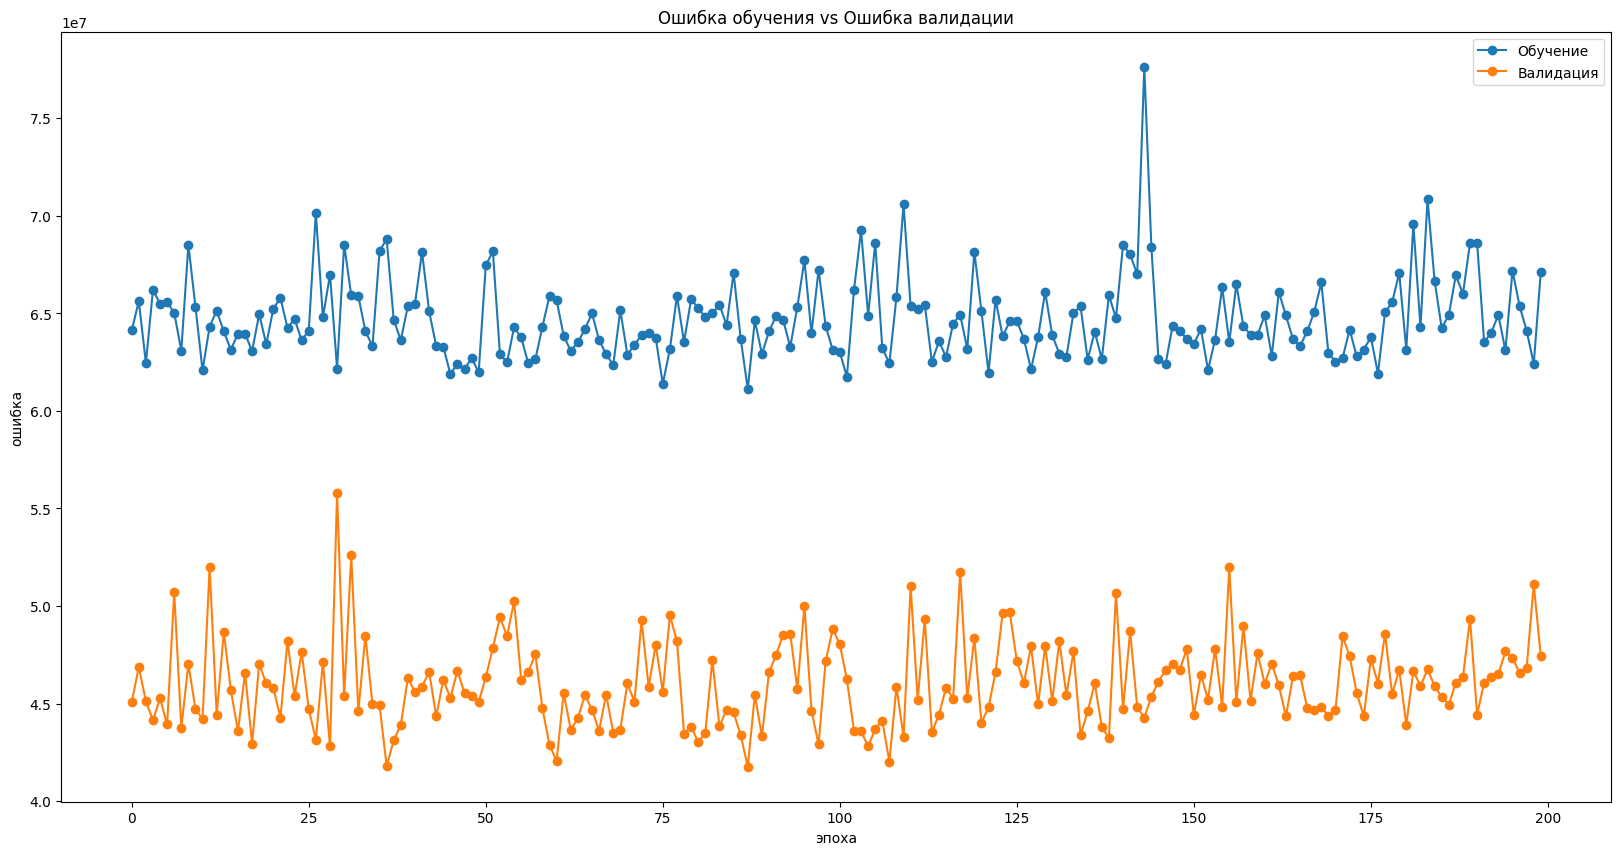

In [116]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(train_losses,'-o')
plt.plot(val_losses,'-o')
plt.xlabel('эпоха')
plt.ylabel('ошибка')
plt.legend(['Обучение','Валидация'])
plt.title('Ошибка обучения vs Ошибка валидации')
plt.show()

Вывод: не получается подобрать гиперпараметры, взрываются градиенты. возможные причины - маленький размер датасета, выбросы в таргете 